<a id='top'></a>
[Link to Section 2 - Ryan, click here](#section2)  
[Link to 3-step transformation](#3steps)

In [27]:
import os
import re
import pandas as pd
import numpy as np
import urllib.request
import shutil
import xml.etree.ElementTree as ET
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline
pd.options.mode.chained_assignment = None

To begin, I will read in the most recent, historical year of data available from Capital Bikeshare. This ranges from 2015 Q3 to 2016 Q3. Each file is stored as a separate dataframe so that I can explore each one individually before combining them into one dataframe.

In [28]:
df_2015Q3 = pd.read_csv('data/2015-Q3-cabi-trip-history-data.csv')
df_2015Q4 = pd.read_csv('data/2015-Q4-Trips-History-Data.csv')
df_2016Q1 = pd.read_csv('data/2016-Q1-Trips-History-Data.csv')
df_2016Q2 = pd.read_csv('data/2016-Q2-Trips-History-Data.csv')
df_2016Q3_1 = pd.read_csv('data/2016-Q3-Trips-History-Data-1.csv')
df_2016Q3_2 = pd.read_csv('data/2016-Q3-Trips-History-Data-2.csv')

Below I explore each dataframe so that I can determine whether or not they will combine easily.

In [29]:
df_2015Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056366 entries, 0 to 1056365
Data columns (total 9 columns):
Duration (ms)           1056366 non-null int64
Start date              1056366 non-null object
End date                1056366 non-null object
Start station number    1056366 non-null int64
Start station           1056366 non-null object
End station number      1056366 non-null int64
End station             1056366 non-null object
Bike #                  1056366 non-null object
Member type             1056366 non-null object
dtypes: int64(3), object(6)
memory usage: 72.5+ MB


In [30]:
df_2015Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706004 entries, 0 to 706003
Data columns (total 9 columns):
Duration (ms)           706004 non-null int64
Start date              706004 non-null object
End date                706004 non-null object
Start station number    706004 non-null int64
Start station           706004 non-null object
End station number      706004 non-null int64
End station             706004 non-null object
Bike #                  706004 non-null object
Member type             706004 non-null object
dtypes: int64(3), object(6)
memory usage: 48.5+ MB


In [31]:
df_2016Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552399 entries, 0 to 552398
Data columns (total 9 columns):
Duration (ms)           552399 non-null int64
Start date              552399 non-null object
End date                552399 non-null object
Start station number    552399 non-null int64
Start station           552399 non-null object
End station number      552399 non-null int64
End station             552399 non-null object
Bike number             552399 non-null object
Member Type             552399 non-null object
dtypes: int64(3), object(6)
memory usage: 37.9+ MB


In [32]:
df_2016Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942332 entries, 0 to 942331
Data columns (total 9 columns):
Duration (ms)           942332 non-null int64
Start date              942332 non-null object
End date                942332 non-null object
Start station number    942332 non-null int64
Start station           942332 non-null object
End station number      942332 non-null int64
End station             942332 non-null object
Bike number             942332 non-null object
Account type            942332 non-null object
dtypes: int64(3), object(6)
memory usage: 64.7+ MB


In [33]:
df_2016Q3_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723741 entries, 0 to 723740
Data columns (total 9 columns):
Duration (ms)           723741 non-null int64
Start date              723741 non-null object
End date                723741 non-null object
Start station number    723741 non-null int64
Start station           723741 non-null object
End station number      723741 non-null int64
End station             723741 non-null object
Bike number             723741 non-null object
Member Type             723741 non-null object
dtypes: int64(3), object(6)
memory usage: 49.7+ MB


In [34]:
df_2016Q3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344246 entries, 0 to 344245
Data columns (total 9 columns):
Duration (ms)           344246 non-null int64
Start date              344246 non-null object
End date                344246 non-null object
Start station number    344246 non-null int64
Start station           344246 non-null object
End station number      344246 non-null int64
End station             344246 non-null object
Bike number             344246 non-null object
Member Type             344246 non-null object
dtypes: int64(3), object(6)
memory usage: 23.6+ MB


Since all dataframes seem to have similar information and data types, and have been created under the same standards through Capital Bikeshare, I will go ahead and standardize each dataframe's feature names. I will then combine all dataframes into one.

In [35]:
new_feature_names = ['Duration', 'Start_Date', 'End_Date', 'Start_Station_Number', 
                     'Start_Station', 'End_Station_Number', 'End_Station', 'Bike_Number', 'Member_Type']

df_2015Q3.columns = new_feature_names
df_2015Q4.columns = new_feature_names
df_2016Q1.columns = new_feature_names
df_2016Q2.columns = new_feature_names
df_2016Q3_1.columns = new_feature_names
df_2016Q3_2.columns = new_feature_names

bike_data = df_2015Q3.append([df_2015Q4, df_2016Q1, df_2016Q2, df_2016Q3_1, df_2016Q3_2])
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4325088 entries, 0 to 344245
Data columns (total 9 columns):
Duration                int64
Start_Date              object
End_Date                object
Start_Station_Number    int64
Start_Station           object
End_Station_Number      int64
End_Station             object
Bike_Number             object
Member_Type             object
dtypes: int64(3), object(6)
memory usage: 330.0+ MB


In [36]:
# Explore the first several rows of the new dataframe
bike_data.head()

Duration     Start_Date       End_Date  Start_Station_Number  \
0    257866  7/1/2015 0:00  7/1/2015 0:04                 31116   
1   2683934  7/1/2015 0:00  7/1/2015 0:45                 31247   
2   2349547  7/1/2015 0:02  7/1/2015 0:41                 31247   
3    826571  7/1/2015 0:02  7/1/2015 0:16                 31229   
4    123046  7/1/2015 0:04  7/1/2015 0:06                 31610   

                                  Start_Station  End_Station_Number  \
0                California St & Florida Ave NW               31117   
1                     Jefferson Dr & 14th St SW               31247   
2                     Jefferson Dr & 14th St SW               31247   
3                   New Hampshire Ave & T St NW               31602   
4  Eastern Market / 7th & North Carolina Ave SE               31269   

                    End_Station Bike_Number Member_Type  
0          15th & Euclid St  NW      W21516  Registered  
1     Jefferson Dr & 14th St SW      W00476      Casual  
2     Jefferson Dr & 14th St SW      W20384      Casual  
3       Park Rd & Holmead Pl NW      W00972  Registered  
4  3rd St & Pennsylvania Ave SE      W21565  Registered

Next, I will add coordinate data that relates to each start and end station so that I can then calculate a distance feature. The coordinate data comes from Capital Bikeshare's XML live feed, which I access and then parse.

In [37]:
# The code in this cell is from the page [https://kwkelly.com/blog/analyzing-capital-bikeshare-data-with-python-and-pandas/]

# Access the XML feed and download to a file
def get_station_xml():
    url = "https://www.capitalbikeshare.com/data/stations/bikeStations.xml"
    download_dir = 'xml_data'
    if not os.path.exists(download_dir):
        os.mkdir(download_dir)
    file_name = os.path.join(download_dir, 'bike_stations.xml')
    with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
get_station_xml()

# Parse the XML file and return a dataframe object
def xml_to_pandas(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    l = []
    for station in root:
        d = {}
        for attrib in station:
            d[str(attrib.tag)] = str(attrib.text)
        l.append(d)

    df = pd.DataFrame.from_dict(l)
    return df 
bike_stations = xml_to_pandas('xml_data/bike_stations.xml')

 
# Wrangle the resulting dataframe object and display
bike_stations['terminalName'] = bike_stations['terminalName'].astype(int)
bike_stations['lat'] = bike_stations['lat'].astype(float)
bike_stations['long'] = bike_stations['long'].astype(float)
station_locations = bike_stations[['terminalName']]
station_locations['location'] = list(zip(bike_stations['lat'], bike_stations['long']))
station_locations['Station_Capacity'] = (bike_stations['nbBikes'].astype(int) 
                                         + bike_stations['nbEmptyDocks'].astype(int))
station_locations.head()

terminalName                 location  Station_Capacity
0         31000   (38.858971, -77.05323)                15
1         31001    (38.85725, -77.05332)                11
2         31002  (38.856425, -77.049232)                17
3         31003   (38.86017, -77.049593)                11
4         31004   (38.857866, -77.05949)                10

In [38]:
# Combine original dataframe with new station lat/long data using a left join on End Station and then Start Station
station_locations.columns = ['End_Station_Number', 'End_Location', 'End_Station_Capacity']
bike_data = pd.merge(bike_data, station_locations, how='left', on='End_Station_Number')

station_locations.columns = ['Start_Station_Number', 'Start_Location', 'Start_Station_Capacity']
bike_data = pd.merge(bike_data, station_locations, how='left', on='Start_Station_Number')

# Display the first several rows of the new dataframe
bike_data.head()

Duration     Start_Date       End_Date  Start_Station_Number  \
0    257866  7/1/2015 0:00  7/1/2015 0:04                 31116   
1   2683934  7/1/2015 0:00  7/1/2015 0:45                 31247   
2   2349547  7/1/2015 0:02  7/1/2015 0:41                 31247   
3    826571  7/1/2015 0:02  7/1/2015 0:16                 31229   
4    123046  7/1/2015 0:04  7/1/2015 0:06                 31610   

                                  Start_Station  End_Station_Number  \
0                California St & Florida Ave NW               31117   
1                     Jefferson Dr & 14th St SW               31247   
2                     Jefferson Dr & 14th St SW               31247   
3                   New Hampshire Ave & T St NW               31602   
4  Eastern Market / 7th & North Carolina Ave SE               31269   

                    End_Station Bike_Number Member_Type  \
0          15th & Euclid St  NW      W21516  Registered   
1     Jefferson Dr & 14th St SW      W00476      Casual   
2     Jefferson Dr & 14th St SW      W20384      Casual   
3       Park Rd & Holmead Pl NW      W00972  Registered   
4  3rd St & Pennsylvania Ave SE      W21565  Registered   

              End_Location  End_Station_Capacity           Start_Location  \
0     (38.92333, -77.0352)                  15.0   (38.917761, -77.04062)   
1  (38.888553, -77.032429)                  21.0  (38.888553, -77.032429)   
2  (38.888553, -77.032429)                  21.0  (38.888553, -77.032429)   
3      (38.9308, -77.0315)                  19.0    (38.91554, -77.03818)   
4  (38.887378, -77.001955)                  14.0  (38.886952, -76.996806)   

   Start_Station_Capacity  
0                    19.0  
1                    21.0  
2                    21.0  
3                    23.0  
4                    14.0

In [39]:
# Determine whether there are any missing values
print('Missing values:')
for feature in bike_data.columns:
    print(feature + ':', bike_data[feature].isnull().values.ravel().sum())

Missing values:
Duration: 0
Start_Date: 0
End_Date: 0
Start_Station_Number: 0
Start_Station: 0
End_Station_Number: 0
End_Station: 0
Bike_Number: 0
Member_Type: 0
End_Location: 76
End_Station_Capacity: 76
Start_Location: 87
Start_Station_Capacity: 87


Seeing as the newly formed features, Start_Location, End_Location, Start_Station_Capacity, and End_Station_Capacity contain missing values I need to determine which stations are missing coordinates, and why this might be the case.

In [40]:
# Print out unique station numbers to check which stations do not have associated locations or capacities  
start_subset_test = bike_data[bike_data['Start_Location'].isnull()]
print('Start Stations without locations:', start_subset_test['Start_Station_Number'].unique())
start_subset_test = bike_data[bike_data['Start_Station_Capacity'].isnull()]
print('Start Stations without capacities:', start_subset_test['Start_Station_Number'].unique())

end_subset_test = bike_data[bike_data['End_Location'].isnull()]
print('End Stations without locations:', end_subset_test['End_Station_Number'].unique())
end_subset_test = bike_data[bike_data['End_Station_Capacity'].isnull()]
print('End Stations without capacities:', end_subset_test['End_Station_Number'].unique())

Start Stations without locations: [31709]
Start Stations without capacities: [31709]
End Stations without locations: [31709]
End Stations without capacities: [31709]


It is now more clear that station 31709 is the only station that is missing coordinate and capacity data as found using the live XML feed. Doing some research has shown me that it is possible that this station is no longer in service because it is probably an old station that was phased out. I was able to find the coordinates of (38.884085, -76.957461) and capacity of 11 (https://gist.github.com/since1968/e51c0f3d95e67bf49f74). The live XML feed was not able to give me this data because it is a point in time feed whereas the data I am using is from 2015 Q3 - 2016 Q3. I will now add these values to the dataframe.

In [41]:
location_31709 = '(38.884085, -76.957461)'
capacity_31709 = 11
bike_data.loc[bike_data['Start_Station_Number'] == 31709, 'Start_Location'] = location_31709
bike_data.loc[bike_data['Start_Station_Number'] == 31709, 'Start_Station_Capacity'] = capacity_31709
bike_data.loc[bike_data['End_Station_Number'] == 31709, 'End_Location'] = location_31709
bike_data.loc[bike_data['End_Station_Number'] == 31709, 'End_Station_Capacity'] = capacity_31709

# Are the missing values gone?
print('Missing Start Station Location:', bike_data['Start_Location'].isnull().values.ravel().sum())
print('Missing Start Station Capacity:', bike_data['Start_Station_Capacity'].isnull().values.ravel().sum())
print('Missing End Station Location:', bike_data['End_Location'].isnull().values.ravel().sum())
print('Missing End Station Capacity:', bike_data['End_Station_Capacity'].isnull().values.ravel().sum())

Missing Start Station Location: 0
Missing Start Station Capacity: 0
Missing End Station Location: 0
Missing End Station Capacity: 0


In [42]:
# Determine how many different values each feature can take
print('Number of unique values:')
for feature in bike_data.columns:
    print(feature + ':', len(list(bike_data[feature].unique())))

Number of unique values:
Duration: 1828278
Start_Date: 521665
End_Date: 521874
Start_Station_Number: 407
Start_Station: 415
End_Station_Number: 407
End_Station: 415
Bike_Number: 4364
Member_Type: 2
End_Location: 407
End_Station_Capacity: 29
Start_Location: 407
Start_Station_Capacity: 29


As we can see above, some features have an appropriate number of values while others do not. Duration, Start_Date, End_Date, and Member_Type are as expected. Per Capital Bikeshare's website, there are over 3,700 bikes available at over 440 stations. Given this information, the number of unique Bike_Number's may be too high, but this could be a function of changing bike numbers over the course of the year. For this reason, and because it is a unique identifier that is not predictive, I may drop this variable later on. Lastly, it is odd that Start_Station_Number, Start_Location, End_Station_Number, and End_Location have 407 values while Start_Station and End_Station have 415 values. Since I would have expected these features to match, I will explore and clean further below.

In [43]:
# Split the original data into a dataframe that shows only the start station information
start_df = pd.DataFrame(bike_data['Start_Station'].value_counts())
start_df.reset_index(drop=False, inplace=True)
start_df.columns = ['Start_Station', 'Counts']
start_df = start_df.merge(bike_data[['Start_Location', 'Start_Station_Number', 'Start_Station']], how='left', on='Start_Station')
start_df.drop_duplicates(inplace=True)
start_df['Start_Location_Lat'] = start_df['Start_Location'].map(lambda x: str(x).split(', ')[0].lstrip('('))
start_df['Start_Location_Long'] = start_df['Start_Location'].map(lambda x: str(x).split(', ')[1].rstrip(')'))
start_df.drop('Start_Location', axis=1, inplace=True)
start_df = start_df.sort_values(by='Start_Station_Number')
start_df.reset_index(drop=True, inplace=True)

start_df.head()

Start_Station  Counts  Start_Station_Number  Start_Location_Lat  \
0       20th & Bell St    1371                 31000  38.858970999999997   
1  Eads St & 15th St S    1298                 31000  38.858970999999997   
2      18th & Eads St.    3370                 31001  38.857250000000001   
3    20th & Crystal Dr    7792                 31002  38.856425000000002   
4    15th & Crystal Dr    7359                 31003  38.860169999999997   

   Start_Location_Long  
0  -77.053229999999999  
1  -77.053229999999999  
2  -77.053319999999999  
3  -77.049232000000003  
4  -77.049593000000002

In [44]:
# Split the original data into a dataframe that shows only the end station information
end_df = pd.DataFrame(bike_data['End_Station'].value_counts())
end_df.reset_index(drop=False, inplace=True)
end_df.columns = ['End_Station', 'Counts']
end_df = end_df.merge(bike_data[['End_Location', 'End_Station_Number', 'End_Station']], how='left', on='End_Station')
end_df.drop_duplicates(inplace=True)
end_df['End_Location_Lat'] = end_df['End_Location'].map(lambda x: str(x).split(', ')[0].lstrip('('))
end_df['End_Location_Long'] = end_df['End_Location'].map(lambda x: str(x).split(', ')[1].rstrip(')'))
end_df.drop('End_Location', axis=1, inplace=True)
end_df = end_df.sort_values(by='End_Station_Number')
end_df.reset_index(drop=True, inplace=True)

end_df.head()

End_Station  Counts  End_Station_Number    End_Location_Lat  \
0  Eads St & 15th St S    1352               31000  38.858970999999997   
1       20th & Bell St     837               31000  38.858970999999997   
2      18th & Eads St.    3205               31001  38.857250000000001   
3    20th & Crystal Dr    8797               31002  38.856425000000002   
4    15th & Crystal Dr    7495               31003  38.860169999999997   

     End_Location_Long  
0  -77.053229999999999  
1  -77.053229999999999  
2  -77.053319999999999  
3  -77.049232000000003  
4  -77.049593000000002

In [45]:
# Print out descriptive stats to check if the same problems persist
print('Unique Start Station Lat/Long:', len(list(bike_data['Start_Location'].unique())))
print('Unique Start Station Numbers:', len(list(start_df['Start_Station_Number'].unique())))
print('Unique Start Stations:', len(list(start_df['Start_Station'].unique())))
print('Unique End Station Lat/Long:', len(list(bike_data['End_Location'].unique())))
print('Unique End Station Numbers:', len(list(end_df['End_Station_Number'].unique())))
print('Unique End Stations:', len(list(end_df['End_Station'].unique())))

Unique Start Station Lat/Long: 407
Unique Start Station Numbers: 407
Unique Start Stations: 415
Unique End Station Lat/Long: 407
Unique End Station Numbers: 407
Unique End Stations: 415


In [46]:
# Determine where exactly there are issues in the start dataframe
for row in start_df.itertuples():
    try:
        if start_df.get_value(row[0], 'Start_Station_Number') == start_df.get_value(row[0]-1, 'Start_Station_Number'):
            print('Start_Station_Number:', start_df.get_value(row[0]-1, 'Start_Station_Number'), 
                  '\nStart_Station Name:', start_df.get_value(row[0]-1, 'Start_Station'), 
                  '\nName Count:', start_df.get_value(row[0]-1, 'Counts'),
                  'Lat:', start_df.get_value(row[0]-1, 'Start_Location_Lat'),
                  'Long:', start_df.get_value(row[0]-1, 'Start_Location_Long'))
            print('Start_Station_Number:', start_df.get_value(row[0], 'Start_Station_Number'), 
                  '\nStart_Station Name:', start_df.get_value(row[0], 'Start_Station'), 
                  '\nName Count:', start_df.get_value(row[0], 'Counts'),
                  'Lat:', start_df.get_value(row[0], 'Start_Location_Lat'),
                  'Long:', start_df.get_value(row[0], 'Start_Location_Long'), end='\n\n')
    except:
        pass

Start_Station_Number: 31000 
Start_Station Name: 20th & Bell St 
Name Count: 1371 Lat: 38.858970999999997 Long: -77.053229999999999
Start_Station_Number: 31000 
Start_Station Name: Eads St & 15th St S 
Name Count: 1298 Lat: 38.858970999999997 Long: -77.053229999999999

Start_Station_Number: 31030 
Start_Station Name: Lee Hwy & N Adams St 
Name Count: 4621 Lat: 38.89593 Long: -77.089005999999998
Start_Station_Number: 31030 
Start_Station Name: N Adams St & Lee Hwy 
Name Count: 1648 Lat: 38.89593 Long: -77.089005999999998

Start_Station_Number: 31039 
Start_Station Name: N Quincy St & Wilson Blvd 
Name Count: 4791 Lat: 38.880012000000001 Long: -77.107854000000003
Start_Station_Number: 31039 
Start_Station Name: Wilson Blvd & N Quincy St 
Name Count: 1527 Lat: 38.880012000000001 Long: -77.107854000000003

Start_Station_Number: 31048 
Start_Station Name: King St Metro South 
Name Count: 4361 Lat: 38.805767000000003 Long: -77.060720000000003
Start_Station_Number: 31048 
Start_Station Name: 

In [47]:
# Determine where exactly there are issues in the end dataframe
for row in end_df.itertuples():
    try:
        if end_df.get_value(row[0], 'End_Station_Number') == end_df.get_value(row[0]-1, 'End_Station_Number'):
            print('End_Station_Number:', end_df.get_value(row[0]-1, 'End_Station_Number'), 
                  '\nEnd_Station Name:', end_df.get_value(row[0]-1, 'End_Station'), 
                  '\nName Count:', end_df.get_value(row[0]-1, 'Counts'),
                  'Lat:', end_df.get_value(row[0]-1, 'End_Location_Lat'),
                  'Long:', end_df.get_value(row[0]-1, 'End_Location_Long'))
            print('End_Station_Number:', end_df.get_value(row[0], 'End_Station_Number'), 
                  '\nEnd_Station Name:', end_df.get_value(row[0], 'End_Station'), 
                  '\nName Count:', end_df.get_value(row[0], 'Counts'),
                  'Lat:', end_df.get_value(row[0], 'End_Location_Lat'),
                  'Long:', end_df.get_value(row[0], 'End_Location_Long'), end='\n\n')
    except:
        pass

End_Station_Number: 31000 
End_Station Name: Eads St & 15th St S 
Name Count: 1352 Lat: 38.858970999999997 Long: -77.053229999999999
End_Station_Number: 31000 
End_Station Name: 20th & Bell St 
Name Count: 837 Lat: 38.858970999999997 Long: -77.053229999999999

End_Station_Number: 31030 
End_Station Name: Lee Hwy & N Adams St 
Name Count: 2741 Lat: 38.89593 Long: -77.089005999999998
End_Station_Number: 31030 
End_Station Name: N Adams St & Lee Hwy 
Name Count: 1215 Lat: 38.89593 Long: -77.089005999999998

End_Station_Number: 31039 
End_Station Name: N Quincy St & Wilson Blvd 
Name Count: 4315 Lat: 38.880012000000001 Long: -77.107854000000003
End_Station_Number: 31039 
End_Station Name: Wilson Blvd & N Quincy St 
Name Count: 1363 Lat: 38.880012000000001 Long: -77.107854000000003

End_Station_Number: 31048 
End_Station Name: King St Metro 
Name Count: 1746 Lat: 38.805767000000003 Long: -77.060720000000003
End_Station_Number: 31048 
End_Station Name: King St Metro South 
Name Count: 3186 L

It is clear that, when taking into account both start and end station numbers, the same station numbers and lat/long pairs appear to be repeated. Each station number and lat/long pair above is related to two (in one case three) different station names. Further, the station name counts are not repeated, which indicates that the station numbers are not duplicated, but the station names have been changing over time. For this reason, and because this is a unique identifier that is not predictive, I will drop the Start_Station and End_Station features from the data set.

In [48]:
bike_data.drop(['Start_Station', 'End_Station'], 
                axis=1, inplace=True)

bike_data.head()

Duration     Start_Date       End_Date  Start_Station_Number  \
0    257866  7/1/2015 0:00  7/1/2015 0:04                 31116   
1   2683934  7/1/2015 0:00  7/1/2015 0:45                 31247   
2   2349547  7/1/2015 0:02  7/1/2015 0:41                 31247   
3    826571  7/1/2015 0:02  7/1/2015 0:16                 31229   
4    123046  7/1/2015 0:04  7/1/2015 0:06                 31610   

   End_Station_Number Bike_Number Member_Type             End_Location  \
0               31117      W21516  Registered     (38.92333, -77.0352)   
1               31247      W00476      Casual  (38.888553, -77.032429)   
2               31247      W20384      Casual  (38.888553, -77.032429)   
3               31602      W00972  Registered      (38.9308, -77.0315)   
4               31269      W21565  Registered  (38.887378, -77.001955)   

   End_Station_Capacity           Start_Location  Start_Station_Capacity  
0                  15.0   (38.917761, -77.04062)                    19.0  
1                  21.0  (38.888553, -77.032429)                    21.0  
2                  21.0  (38.888553, -77.032429)                    21.0  
3                  19.0    (38.91554, -77.03818)                    23.0  
4                  14.0  (38.886952, -76.996806)                    14.0

To help visualize the popularity of certain stations and trips between all stations, I have further wrangled the data off to the side. The resulting visualizations can be found here:  
• Starting Station Popularity Bubble Map:   https://public.tableau.com/profile/dpalbrecht#!/vizhome/CapitalBikeshareStartingStationPopularityBubbleMap2015Q3-2016Q3/Sheet2  
• Total Trip Popularity Spider Map:  
https://public.tableau.com/profile/dpalbrecht#!/vizhome/CapitalBikeshareTotalTripPopularitySpiderMap2015Q3-2016Q3/Sheet1

Next I will create two target variables: The number of bikes at a station and the number of empty docks at a station at any given point in time. The data I have been wrangling above, in bike_data, is historical trip data, so it is only half of what is needed to back out bikes and spaces at each station. I will bring in the second half of the needed data from CaBi Tracker, which shows the points in time that any station starts an empty cycle, ends an empty cycle, starts a full cycle, and ends a full cycle. Merging these two data sets together should allow me to determine the flow of bikes between stations. I will start by reading in the CaBi Tracker data.

In [49]:
# Read in CaBi Tracker data
outage_07012015_08312015 = pd.read_csv('outage/status_07012015_08312015.csv')
outage_09012015_10312015 = pd.read_csv('outage/status_09012015_10312015.csv')
outage_11012015_12312015 = pd.read_csv('outage/status_11012015_12312015.csv')
outage_01012016_03312016 = pd.read_csv('outage/status_01012016_03312016.csv')
outage_04012016_05312016 = pd.read_csv('outage/status_04012016_05312016.csv')
outage_06012016_07312016 = pd.read_csv('outage/status_06012016_07312016.csv')
outage_08012016_09302016 = pd.read_csv('outage/status_08012016_09302016.csv')

# Merge the dataframes together
outage_data = outage_07012015_08312015.append([outage_09012015_10312015, outage_11012015_12312015, 
                                               outage_01012016_03312016, outage_04012016_05312016,
                                               outage_06012016_07312016, outage_08012016_09302016])

# Display outage data summary
outage_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426603 entries, 0 to 71491
Data columns (total 6 columns):
Terminal Number    426603 non-null int64
Station Name       426603 non-null object
Status             426603 non-null object
Start              426603 non-null object
End                426603 non-null object
Duration           426603 non-null int64
dtypes: int64(2), object(4)
memory usage: 22.8+ MB


In [50]:
# Rename column names
outage_data.columns = ['Station_Number', 'Station_Name',
                      'Status', 'Start', 'End', 'Duration']
outage_data['Start'] = pd.to_datetime(outage_data['Start'], infer_datetime_format=True)
outage_data['End'] = pd.to_datetime(outage_data['End'], infer_datetime_format=True)

# Display the first 5 rows of outage data
outage_data.head()

Station_Number                   Station_Name Status               Start  \
0           31631                  8th & F St NE   full 2015-08-31 21:02:13   
1           31252  21st St & Pennsylvania Ave NW  empty 2015-08-31 21:45:48   
2           31247      Jefferson Dr & 14th St SW  empty 2015-08-31 23:55:31   
3           31119           14th & Belmont St NW   full 2015-08-31 21:56:58   
4           31221                 18th & M St NW  empty 2015-08-31 22:19:15   

                  End  Duration  
0 2015-08-31 23:59:34       177  
1 2015-08-31 23:58:34       133  
2 2015-08-31 23:56:32         1  
3 2015-08-31 23:54:31       118  
4 2015-08-31 23:53:30        94

In [51]:
# Find total number of bikes (4364)
total_bikes = len(list(bike_data['Bike_Number'].unique()))

# Take out unecessary features from bike_data and prepare to split
bike_data.drop(['Duration', 'Bike_Number', 'Member_Type', 'Start_Location', 
                'End_Location'], axis=1, inplace=True)
bike_data['Status'] = np.nan
bike_data['Start_Date'] = pd.to_datetime(bike_data['Start_Date'], infer_datetime_format=True)
bike_data['End_Date'] = pd.to_datetime(bike_data['End_Date'], infer_datetime_format=True)

# Display
bike_data.head()

Start_Date            End_Date  Start_Station_Number  \
0 2015-07-01 00:00:00 2015-07-01 00:04:00                 31116   
1 2015-07-01 00:00:00 2015-07-01 00:45:00                 31247   
2 2015-07-01 00:02:00 2015-07-01 00:41:00                 31247   
3 2015-07-01 00:02:00 2015-07-01 00:16:00                 31229   
4 2015-07-01 00:04:00 2015-07-01 00:06:00                 31610   

   End_Station_Number  End_Station_Capacity  Start_Station_Capacity  Status  
0               31117                  15.0                    19.0     NaN  
1               31247                  21.0                    21.0     NaN  
2               31247                  21.0                    21.0     NaN  
3               31602                  19.0                    23.0     NaN  
4               31269                  14.0                    14.0     NaN

In [52]:
###########################################
### CAUTION: TAKES 20-30 MINUTES TO RUN ###
###########################################

# Start a full dataframe for appending later
discrete_bike_data = pd.DataFrame()

for station in list(bike_data['Start_Station_Number'].unique()): 
    
    # Select subsets of the bike_data and outage_data dataframes
    bike_data_subset = bike_data[(bike_data['Start_Station_Number'] == station) | (bike_data['End_Station_Number'] == station)]
    outage_data_subset = outage_data[outage_data['Station_Number'] == station]
    
    # Split bike_data_subset into a start station dataframe that matches 31116
    # The resulting dataframe only includes a 'start date' and an action to subtract a bike
    bike_data_subset_start = bike_data_subset[bike_data_subset['Start_Station_Number'] == station]
    bike_data_subset_start.drop(['End_Date', 'Start_Station_Number', 
                                 'End_Station_Number', 'End_Station_Capacity'], axis=1, inplace=True)
    bike_data_subset_start['Status'] = 'subtract bike'
    bike_data_subset_start.set_index('Start_Date', drop=False, inplace=True)

    # Split bike_data_subset into a end station dataframe that matches 31116
    # The resulting dataframe only includes a 'start date' and an action to add a bike
    bike_data_subset_end = bike_data_subset[bike_data_subset['End_Station_Number'] == station]
    bike_data_subset_end.drop(['Start_Date', 'Start_Station_Number', 
                               'End_Station_Number', 'Start_Station_Capacity'], axis=1, inplace=True)
    bike_data_subset_end.columns = ['Start_Date', 'Start_Station_Capacity', 'Status']
    bike_data_subset_end['Status'] = 'add bike'
    bike_data_subset_end.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_31116 for when an empty notification starts
    outage_data_subset_empty_start = outage_data_subset.drop(['End', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_empty_start = outage_data_subset_empty_start[outage_data_subset_empty_start['Status'] == 'empty']
    outage_data_subset_empty_start['Status'] = 'start empty'
    outage_data_subset_empty_start.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_empty_start.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_31116 for when an empty notification ends
    outage_data_subset_empty_end = outage_data_subset.drop(['Start', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_empty_end = outage_data_subset_empty_end[outage_data_subset_empty_end['Status'] == 'empty']
    outage_data_subset_empty_end['Status'] = 'end empty'
    outage_data_subset_empty_end.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_empty_end.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_31116 for when a full notification starts
    outage_data_subset_full_start = outage_data_subset.drop(['End', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_full_start = outage_data_subset_full_start[outage_data_subset_full_start['Status'] == 'full']
    outage_data_subset_full_start['Status'] = 'start full'
    outage_data_subset_full_start.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_full_start.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_31116 for when a full notification ends
    outage_data_subset_full_end = outage_data_subset.drop(['Start', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_full_end = outage_data_subset_full_end[outage_data_subset_full_end['Status'] == 'full']
    outage_data_subset_full_end['Status'] = 'end full'
    outage_data_subset_full_end.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_full_end.set_index('Start_Date', drop=False, inplace=True)

    # Combine the discretized dataframes
    combined_subset = bike_data_subset_start.append([bike_data_subset_end, 
                                                     outage_data_subset_empty_start, 
                                                     outage_data_subset_empty_end, 
                                                     outage_data_subset_full_start, 
                                                     outage_data_subset_full_end])

    # Prepare the combined dataframe for iteration
    combined_subset['Bike_Count'] = np.nan
    combined_subset.columns = ['Date', 'Start_Station_Capacity', 'Station_Number', 'Status', 'Bike_Count']
    combined_subset.sort_values(by='Date', ascending=True, inplace=True)
    combined_subset.reset_index(drop=True, inplace=True)

    # Iterate over the rows in combined_subset and fill in Bike_Count 
    cut_first_empty = 1
    for row in combined_subset.itertuples():

        if row[4] == 'end empty' or row[4] == 'start full' or row[4] == 'end full':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count'))
            except:
                combined_subset.set_value(row[0], 'Bike_Count', 0)

        elif row[4] == 'start empty':
            combined_subset.set_value(row[0], 'Bike_Count', 0) 

            # Cut off any of the first rows up until there is a 'start empty' Status
            if cut_first_empty == 1:
                combined_subset.drop(combined_subset.index[:row[0]], inplace=True)
                cut_first_empty -= 1

        elif row[4] == 'add bike':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count')+1)
            except:
                pass

        elif row[4] == 'subtract bike':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count')-1)
            except:
                pass

    # Add a new target feature, Count_Percent_Population
    combined_subset['Count_Percent_Population'] = combined_subset['Bike_Count'].map(lambda x: (x/total_bikes)*100)

    # Add new target feature, Count_Percent_Capacity
    combined_subset['Count_Percent_Capacity'] = (combined_subset['Bike_Count']/combined_subset['Start_Station_Capacity'])*100

    # Fill in the Station_Number feature and display
    combined_subset['Station_Number'] = str(station)

    discrete_bike_data = discrete_bike_data.append(combined_subset)

<a id='section2'></a>
# Section 2
[Back To Top](#top)  
[Down to 3-Step Tranformation](#3steps)

In [53]:
# How's the resulting dataframe look?
discrete_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9455789 entries, 23 to 32
Data columns (total 7 columns):
Date                        datetime64[ns]
Start_Station_Capacity      float64
Station_Number              object
Status                      object
Bike_Count                  float64
Count_Percent_Population    float64
Count_Percent_Capacity      float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 577.1+ MB


In [54]:
# Display
discrete_bike_data.head()

Date  Start_Station_Capacity Station_Number         Status  \
23 2015-07-01 08:20:33                     NaN          31116    start empty   
24 2015-07-01 08:25:00                    19.0          31116       add bike   
25 2015-07-01 08:25:38                     NaN          31116      end empty   
26 2015-07-01 08:26:00                    19.0          31116  subtract bike   
27 2015-07-01 08:27:39                     NaN          31116    start empty   

    Bike_Count  Count_Percent_Population  Count_Percent_Capacity  
23         0.0                  0.000000                     NaN  
24         1.0                  0.022915                5.263158  
25         1.0                  0.022915                     NaN  
26         0.0                  0.000000                0.000000  
27         0.0                  0.000000                     NaN

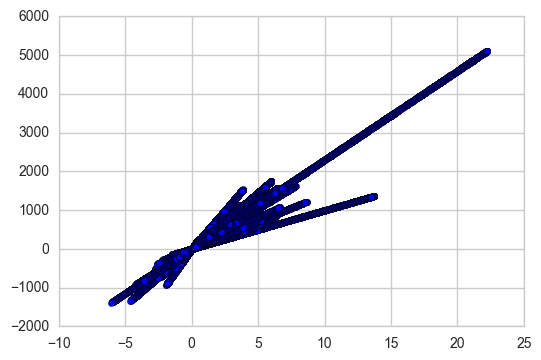

In [122]:
# Can I use count_percent_population AND count_percent_capacity?
plt.scatter(discrete_bike_data['Count_Percent_Population'], discrete_bike_data['Count_Percent_Capacity'])

While the above graph shows us that there is a relationship between these two, possible target features, the relationship is based on the same bike count value for each instance. These features are partly based on the same information and so it is not surprising that we see a relationship. It looks like we cannot use both features, and a combination does not make much sense either. Below, I continue while ignoring the Count_Percent_Population feature.

## Below I explore only the outage status subset of the newly formed dataframe

In [55]:
# Take out only the outage status data
discrete_bike_data_status_only = discrete_bike_data[discrete_bike_data['Count_Percent_Capacity'].isnull()]
discrete_bike_data_status_only.reset_index(drop=True,inplace=True)
discrete_bike_data_status_only['Start_Station_Capacity'] = 0
discrete_bike_data_status_only.head()

Date  Start_Station_Capacity Station_Number       Status  \
0 2015-07-01 08:20:33                       0          31116  start empty   
1 2015-07-01 08:25:38                       0          31116    end empty   
2 2015-07-01 08:27:39                       0          31116  start empty   
3 2015-07-01 09:42:41                       0          31116    end empty   
4 2015-07-01 09:55:51                       0          31116  start empty   

   Bike_Count  Count_Percent_Population  Count_Percent_Capacity  
0         0.0                  0.000000                     NaN  
1         1.0                  0.022915                     NaN  
2         0.0                  0.000000                     NaN  
3         1.0                  0.022915                     NaN  
4         0.0                  0.000000                     NaN

In [56]:
# Create a station capacity dictionary for mapping
station_cap_df = station_locations.drop('Start_Location', axis=1)
station_cap_dict = {}

for row in station_cap_df.itertuples():
    station_cap_dict[row[1]] = row[2]

station_cap_dict[31709] = 11    
station_cap_dict

{31000: 15,
 31001: 11,
 31002: 17,
 31003: 11,
 31004: 10,
 31005: 19,
 31006: 15,
 31007: 19,
 31008: 11,
 31009: 18,
 31010: 11,
 31011: 17,
 31012: 11,
 31013: 15,
 31014: 31,
 31015: 19,
 31016: 14,
 31017: 14,
 31018: 11,
 31019: 15,
 31020: 11,
 31021: 15,
 31022: 17,
 31023: 10,
 31024: 19,
 31025: 11,
 31026: 14,
 31027: 11,
 31028: 11,
 31029: 14,
 31030: 19,
 31031: 11,
 31032: 11,
 31033: 11,
 31034: 11,
 31035: 11,
 31036: 15,
 31037: 23,
 31038: 11,
 31039: 15,
 31040: 10,
 31041: 19,
 31042: 15,
 31043: 15,
 31044: 15,
 31045: 15,
 31046: 17,
 31047: 29,
 31048: 23,
 31049: 11,
 31050: 11,
 31051: 11,
 31052: 22,
 31053: 15,
 31054: 11,
 31055: 15,
 31056: 11,
 31057: 11,
 31058: 11,
 31059: 11,
 31060: 15,
 31061: 11,
 31062: 11,
 31063: 11,
 31064: 11,
 31065: 11,
 31066: 11,
 31067: 12,
 31068: 15,
 31069: 11,
 31070: 11,
 31071: 11,
 31072: 11,
 31073: 15,
 31074: 15,
 31075: 11,
 31076: 15,
 31077: 19,
 31078: 11,
 31079: 15,
 31080: 14,
 31081: 15,
 31082: 15,
 310

In [57]:
# Fill in percent capacity values to the subset data df, discrete_bike_data_status_only
for row in discrete_bike_data_status_only.itertuples():
    station_now = discrete_bike_data_status_only.get_value(row[0],'Station_Number')
    discrete_bike_data_status_only.set_value(row[0], 'Start_Station_Capacity', station_cap_dict[int(station_now)])

discrete_bike_data_status_only['Count_Percent_Capacity'] = (discrete_bike_data_status_only['Bike_Count']/discrete_bike_data_status_only['Start_Station_Capacity'])*100

# Now that capacities are filled in, display
discrete_bike_data_status_only.head()  

Date  Start_Station_Capacity Station_Number       Status  \
0 2015-07-01 08:20:33                      19          31116  start empty   
1 2015-07-01 08:25:38                      19          31116    end empty   
2 2015-07-01 08:27:39                      19          31116  start empty   
3 2015-07-01 09:42:41                      19          31116    end empty   
4 2015-07-01 09:55:51                      19          31116  start empty   

   Bike_Count  Count_Percent_Population  Count_Percent_Capacity  
0         0.0                  0.000000                0.000000  
1         1.0                  0.022915                5.263158  
2         0.0                  0.000000                0.000000  
3         1.0                  0.022915                5.263158  
4         0.0                  0.000000                0.000000

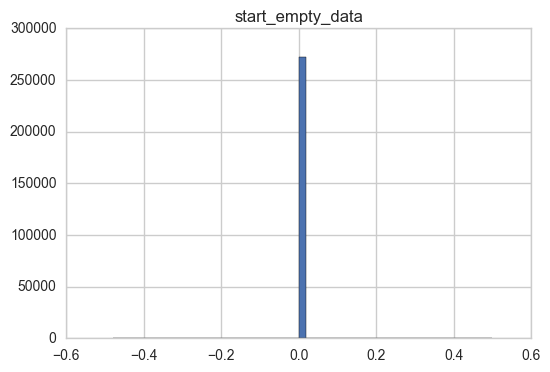

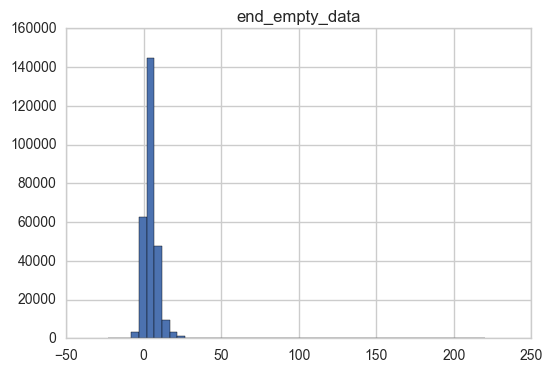

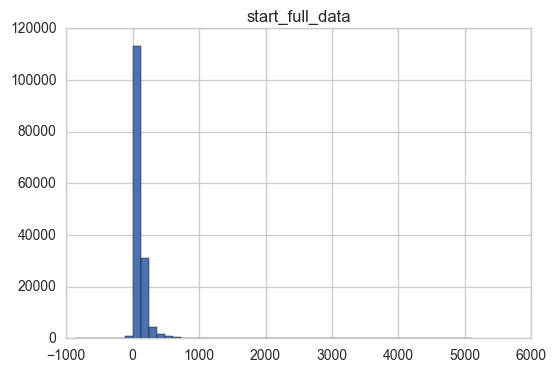

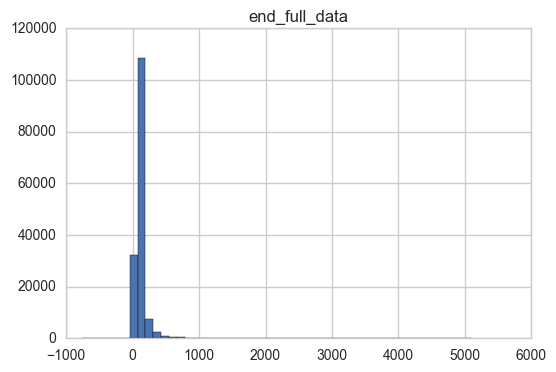

In [58]:
# Graphically explore what percent capacity values each outage flag take
start_empty_data = (discrete_bike_data_status_only[discrete_bike_data_status_only['Status'] == 'start empty'], 'start_empty_data')
end_empty_data = (discrete_bike_data_status_only[discrete_bike_data_status_only['Status'] == 'end empty'], 'end_empty_data')
start_full_data = (discrete_bike_data_status_only[discrete_bike_data_status_only['Status'] == 'start full'], 'start_full_data')
end_full_data = (discrete_bike_data_status_only[discrete_bike_data_status_only['Status'] == 'end full'], 'end_full_data')
status_list = [start_empty_data, end_empty_data, start_full_data, end_full_data]

for df, title in status_list:
    pd.DataFrame.hist(df, column='Count_Percent_Capacity', bins=50)
    pl.title(title)  

In [59]:
# Further explore what percent capacity values each outage flag take
for df, title in status_list:
    print(title)
    print(df['Count_Percent_Capacity'].describe())

start_empty_data
count    272688.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Count_Percent_Capacity, dtype: float64
end_empty_data
count    272688.000000
mean          5.091379
std           4.613797
min         -27.777778
25%           2.272727
50%           5.263158
75%           6.666667
max         220.000000
Name: Count_Percent_Capacity, dtype: float64
start_full_data
count    153209.000000
mean        118.648246
std         127.678755
min        -973.684211
25%          81.818182
50%         100.000000
75%         122.222222
max        5110.526316
Name: Count_Percent_Capacity, dtype: float64
end_full_data
count    153215.000000
mean        113.665212
std         127.733208
min        -884.210526
25%          77.419355
50%          93.333333
75%         118.181818
max        5100.000000
Name: Count_Percent_Capacity, dtype: float64


Above, we can see that start_empty statuses are zero across the board because I reset the counts at every instance of this status. The end_empty statuses tend to happen around 5% capacity, but are skewed to the right. The start_full statuses tend to happen around 100% capacity, but are skewed to the left. The end_full statuses tend to happen around 93% capacity, but are skewed to the left. These statuses are very much in line with what I would expect, which is great. However, there are some alarming outliers: start_full and end_full both have min and max of -900% ~ -1,000% and 5,100%, respectively. I explore these below using the bike data portion of the new dataframe.

## Now I transition to the bike data portion of the data set (does not include outage data since they are NaNs)

In [60]:
# Filter out outage status instances
discrete_bike_data_only = discrete_bike_data[(discrete_bike_data['Status'] == 'add bike') | (discrete_bike_data['Status'] == 'subtract bike')]

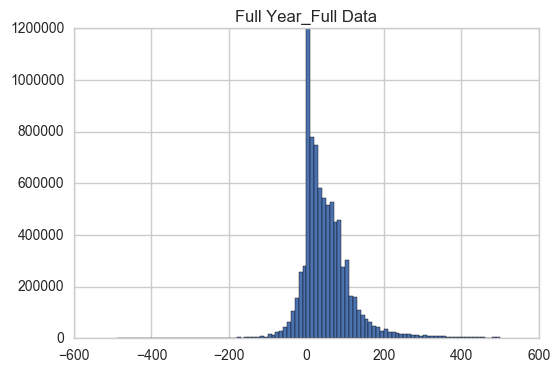

In [61]:
# Look at distribution of percent capacities for full year of full data for all stations
pd.DataFrame.hist(discrete_bike_data_only, column='Count_Percent_Capacity',
                  bins=100, range=(-500,500))
pl.title('Full Year_Full Data')

In [62]:
# What is the range of possible values of percent capacity?
print('min percent capacity:', min(discrete_bike_data_only['Count_Percent_Capacity']))
print('Max percent capacity:', max(discrete_bike_data_only['Count_Percent_Capacity']))

min percent capacity: -1389.47368421
Max percent capacity: 5110.52631579


Below I have used boxplots to explore whether there are certain stations in particular that are causing such a large, unexpected range of percent capacity values. Every 35 stations are plotted below. In the end, I need to reduce the dataset to exclude such values from the target feature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

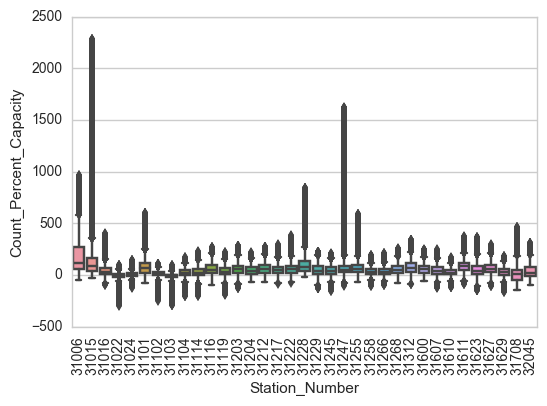

In [63]:
# Stations start - 35

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[0:35]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

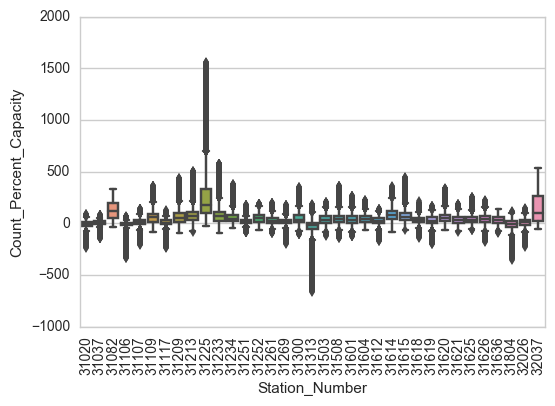

In [64]:
# Stations 35 - 70

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[35:70]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

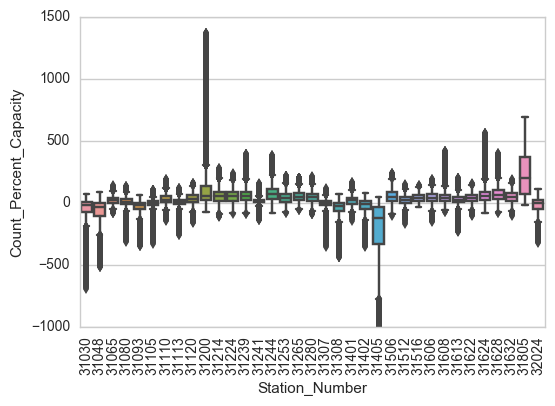

In [65]:
# Stations 70 - 105

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[70:105]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

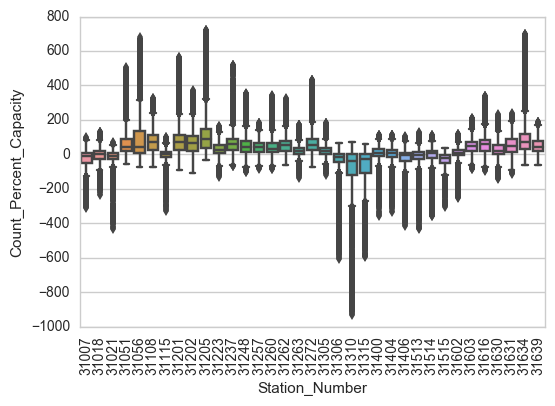

In [66]:
# Stations 105 - 140

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[105:140]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

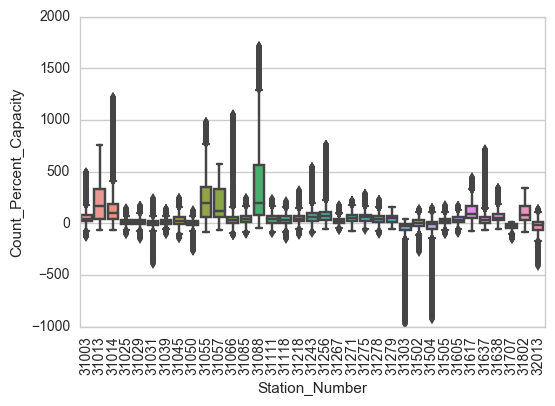

In [67]:
# Stations 140 - 175

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[140:175]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

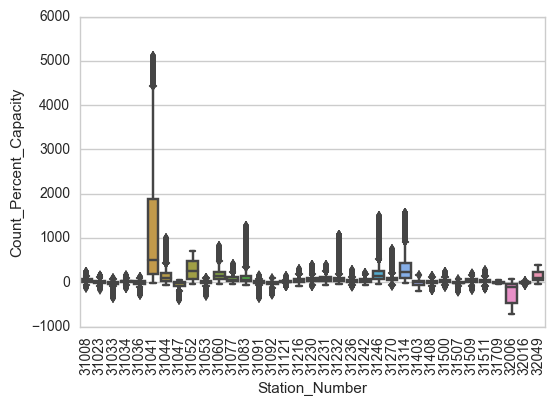

In [68]:
# Stations 175 - 210

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[175:210]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

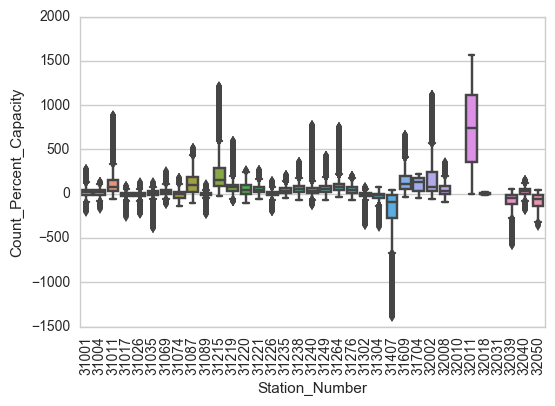

In [69]:
# Stations 210 - 245

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[210:245]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

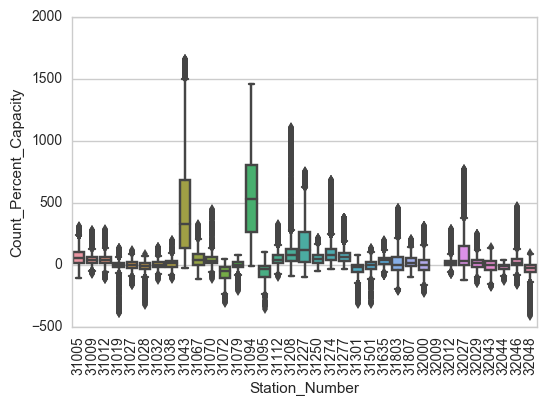

In [70]:
# Stations 245 - 280

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[245:280]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

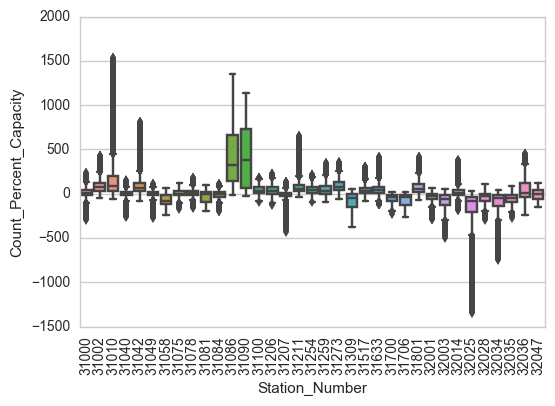

In [71]:
# Stations 280 - 315

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[280:315]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

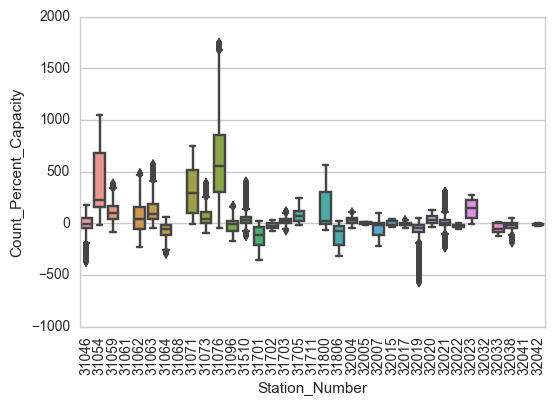

In [72]:
# Stations 315 - 350

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[315:350]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

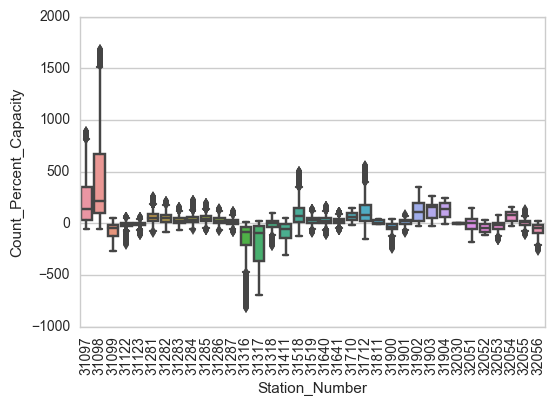

In [73]:
# Stations 350 - 385

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[350:385]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

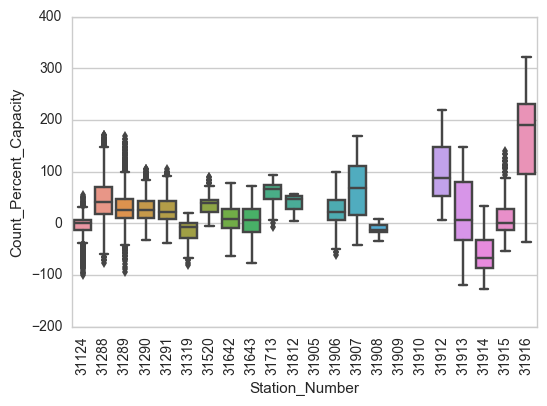

In [74]:
# Stations 385 - last

station_list = []
# Is there a certain station that's causing these outliers? Or is it widespread?
for station in list(bike_data['Start_Station_Number'].unique())[385:]:
    station_list.append(str(station))

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(station_list)]
ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
plt.xticks(rotation=90)

<a id='3steps'></a>
# Three-Step Transformation  
Looking at the above boxplots, we can see that most stations have an acceptable median and IQR. There are some stations, however, that account for much of the range we saw above while exploring the dataframe. From here, I believe the best course of action is to:  
1) Take out stations that are not very usable from the percent capacity perspective  
2) Reduce the number of instances by taking instances away that are outliers  
3) Take out stations that do not have a significant amount of activity left for analysis.  

These are the stations that should be taken out of the analysis because their medians and IQRs are outside of the expected range: 31006, 31225, 32037, 31045, 32037, 31045, 31085, 31013, 31055, 31057, 31088, 31041, 32006, 32011, 31043, 31094, 31227, 31086, 31090, 31054, 31071, 31076, 31800, 31097, 31098, 31317, 31916, 31912.

Inspect these stations because they seem to have no boxplot: 32009, 32032, 31068, 31711, 32032, 31041, 31909, 31910.  
  
[Back To Top](#top)  
[Back to Section 2](#section2)

# 1) Take out stations that are not very usable from the percent capacity perspective  

In [75]:
# Inspect whether the stations that seemed to have no boxplot are actually empty
blank_stations = [32009, 32032, 31068, 31711, 32032, 31041, 31909, 31910]

discrete_bike_data_filtered = discrete_bike_data_only[discrete_bike_data_only['Station_Number'].isin(blank_stations)]
try:
    ax = sns.boxplot(x="Station_Number", y="Count_Percent_Capacity", data=discrete_bike_data_filtered)
except:
    print('Nothing to plot.')
    
discrete_bike_data_filtered

# These stations do not seem to have any data. 
# Going back and analyzing the original bike data and outage data, it is apparent 
# that these stations have virtually no outage data so there was no way to back out station 
# counts and so that is why there is no relevant data to show.

Nothing to plot.


Empty DataFrame
Columns: [Date, Start_Station_Capacity, Station_Number, Status, Bike_Count, Count_Percent_Population, Count_Percent_Capacity]
Index: []

In [76]:
# Remove the stations listed above
remove_stations = [31006, 31225, 32037, 31045, 32037, 31045, 31085, 31013, 
                   31055, 31057, 31088, 31041, 32006, 32011, 31043, 31094, 
                   31227, 31086, 31090, 31054, 31071, 31076, 31800, 31097, 
                   31098, 31317, 31916, 31912]
remove_stations = map(str, remove_stations)


remove_station_discrete_bike_data_only = discrete_bike_data_only[np.logical_not(discrete_bike_data_only['Station_Number'].isin(remove_stations))]
remove_station_discrete_bike_data_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8412507 entries, 24 to 32
Data columns (total 7 columns):
Date                        datetime64[ns]
Start_Station_Capacity      float64
Station_Number              object
Status                      object
Bike_Count                  float64
Count_Percent_Population    float64
Count_Percent_Capacity      float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 513.5+ MB


# 2) Reduce the number of instances by taking instances away that are outliers

In [117]:
# Mask the data set to exclude any percents above 150% and below -50%
cut_remove_station_discrete_bike_data_only_2 = remove_station_discrete_bike_data_only[(remove_station_discrete_bike_data_only['Count_Percent_Capacity'] <= 150) &
                                                                                      (remove_station_discrete_bike_data_only['Count_Percent_Capacity'] >= -50)]
# Did I take out too much data?
cut_remove_station_discrete_bike_data_only_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7693221 entries, 24 to 32
Data columns (total 7 columns):
Date                        datetime64[ns]
Start_Station_Capacity      float64
Station_Number              object
Status                      object
Bike_Count                  float64
Count_Percent_Population    float64
Count_Percent_Capacity      float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 469.6+ MB


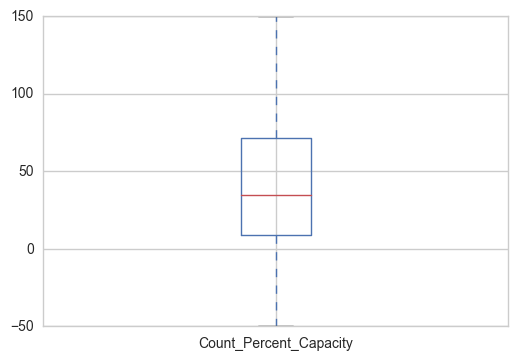

In [109]:
# Show boxplot again with new percents
pd.DataFrame.boxplot(cut_remove_station_discrete_bike_data_only_2, column='Count_Percent_Capacity')

# 3) Take out stations that do not have a significant amount of activity left for analysis.

In [110]:
# See whether there are stations with counts that are too low for analysis
cut_remove_station_discrete_bike_data_only_2_station_counts = pd.DataFrame(pd.value_counts(cut_remove_station_discrete_bike_data_only_2['Station_Number']))
cut_remove_station_discrete_bike_data_only_2_station_counts.reset_index(drop=False, inplace=True)
cut_remove_station_discrete_bike_data_only_2_station_counts.columns=['Station_Number', 'Count']
cut_remove_station_discrete_bike_data_only_2_station_counts['Count'] = cut_remove_station_discrete_bike_data_only_2_station_counts['Count'].astype(int)

for row in cut_remove_station_discrete_bike_data_only_2_station_counts.itertuples():
    print('Station', row[1], ':', row[2])

Station 31258 : 177411
Station 31623 : 173446
Station 31247 : 145188
Station 31200 : 117817
Station 31201 : 100980
Station 31241 : 98061
Station 31249 : 89783
Station 31101 : 86315
Station 31229 : 86172
Station 31613 : 79773
Station 31600 : 79472
Station 31248 : 76569
Station 31214 : 74182
Station 31222 : 73599
Station 31603 : 72464
Station 31203 : 70260
Station 31624 : 69135
Station 31243 : 68264
Station 31271 : 67131
Station 31265 : 64164
Station 31212 : 63852
Station 31202 : 63780
Station 31110 : 63575
Station 31228 : 61323
Station 31266 : 60884
Station 31267 : 58813
Station 31277 : 58693
Station 31104 : 57323
Station 31109 : 57098
Station 31257 : 57017
Station 31213 : 56938
Station 31232 : 56573
Station 31281 : 55685
Station 31278 : 54902
Station 31121 : 54581
Station 31239 : 53498
Station 31237 : 53221
Station 31230 : 52855
Station 31218 : 52469
Station 31108 : 51845
Station 31616 : 51580
Station 31234 : 51033
Station 31602 : 50660
Station 31231 : 50511
Station 31268 : 50016
Stati

In [111]:
# Which stations have the least counts (below 500)? How many are there?
least_counts_df = cut_remove_station_discrete_bike_data_only_2_station_counts[cut_remove_station_discrete_bike_data_only_2_station_counts['Count'] <= 500]
print(len(least_counts_df))
least_counts_df

43


Station_Number  Count
327          32050    491
328          32056    488
329          31805    482
330          32044    469
331          31316    461
332          32007    458
333          31705    456
334          31707    415
335          31913    409
336          32054    406
337          31072    392
338          31064    346
339          31704    316
340          32023    307
341          31904    293
342          31062    289
343          31520    271
344          31700    269
345          32016    266
346          31710    266
347          31058    243
348          32017    241
349          31806    233
350          31903    221
351          31702    171
352          31914    153
353          31706    150
354          32049    137
355          32052    135
356          31709    124
357          32033    117
358          32042    112
359          31701    111
360          32015    109
361          31908    102
362          31319     97
363          32005     96
364          31713     45
365          32018     38
366          31812     31
367          31811     22
368          32022     16
369          32030     13

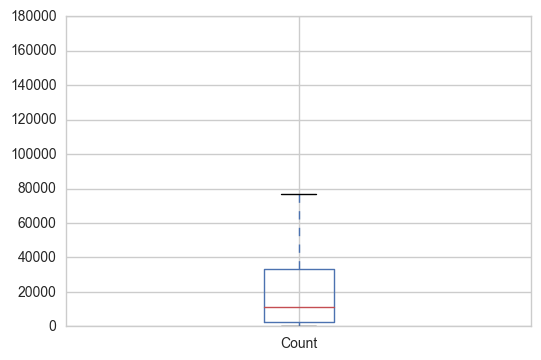

In [112]:
# Are there outliers when looking at how many instances of each station I have?
pd.DataFrame.boxplot(cut_remove_station_discrete_bike_data_only_2_station_counts, column='Count')

In [113]:
# Take discrete_bike_data_cut_outliers_2 and filter out any stations that have counts below 500
reduced_discrete_bike_data = cut_remove_station_discrete_bike_data_only_2[np.logical_not(cut_remove_station_discrete_bike_data_only_2['Station_Number'].isin(list(least_counts_df['Station_Number'])))]

# Did I take out too much data?
reduced_discrete_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7682954 entries, 24 to 962
Data columns (total 7 columns):
Date                        datetime64[ns]
Start_Station_Capacity      float64
Station_Number              object
Status                      object
Bike_Count                  float64
Count_Percent_Population    float64
Count_Percent_Capacity      float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 468.9+ MB


In [114]:
# How many stations are left for analysis?
len(list(reduced_discrete_bike_data['Station_Number'].unique()))

327

# Determine whether the three transformations above had the desired effect

In [115]:
# Finally, after all transformations, explore what percent capacity values each outage flag take
for df, title in status_list:
    print(title)
    df = df[np.logical_not(df['Station_Number'].isin(remove_stations))] # Remove stations that are too variable
    df = df[(df['Count_Percent_Capacity'] <= 150) &(df['Count_Percent_Capacity'] >= -50)] # Remove instances of too low or too high count_percent_capacity
    df = df[np.logical_not(df['Station_Number'].isin(list(least_counts_df['Station_Number'])))] # Remove stations with < 500 instances
    print(df['Count_Percent_Capacity'].describe())

start_empty_data
count    272363.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Count_Percent_Capacity, dtype: float64
end_empty_data
count    272360.000000
mean          5.093808
std           4.575027
min         -27.777778
25%           2.272727
50%           5.263158
75%           6.666667
max         144.444444
Name: Count_Percent_Capacity, dtype: float64
start_full_data
count    130411.000000
mean         91.104257
std          28.309621
min         -50.000000
25%          78.260870
50%          94.444444
75%         105.555556
max         150.000000
Name: Count_Percent_Capacity, dtype: float64
end_full_data
count    132111.000000
mean         86.881847
std          29.318496
min         -50.000000
25%          73.333333
50%          89.473684
75%         100.000000
max         150.000000
Name: Count_Percent_Capacity, dtype: float64


Compared to the original flag data overall, we can see that:  
• start_empty is still 0 across the board - as expected.  
• end_empty is virtually the same with excepting of a lowered max. This is as expected since I did not target any instances of count_percent_capacity near 0.  
• start_full min and max have been significantly reduced, and the median and the mean have become significantly closer.  
• end_full min and max have been significantly reduced, and the median and the mean have become significantly closer.  

# Below I isolate a single station and inspect its distribution over time as a sanity check

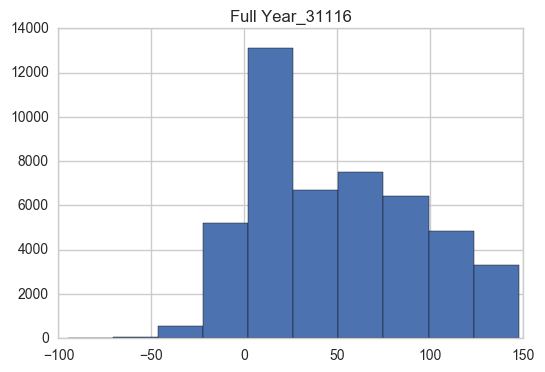

In [85]:
# Isolate station 31116
discrete_bike_data_31116 = reduced_discrete_bike_data[reduced_discrete_bike_data['Station_Number'] == '31116']

# Look at its distribution
pd.DataFrame.hist(discrete_bike_data_31116, column='Count_Percent_Capacity')
pl.title('Full Year_31116')

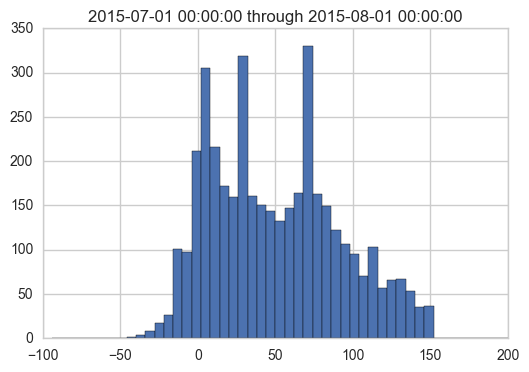

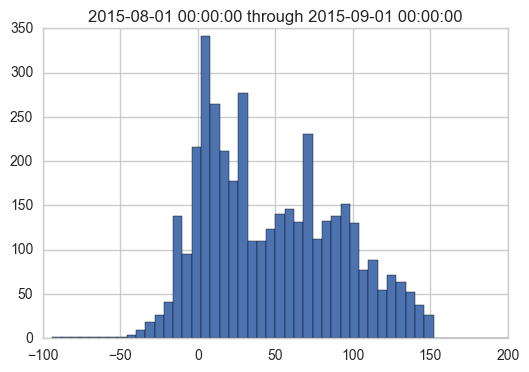

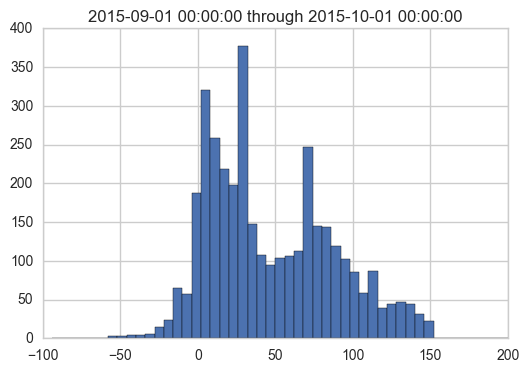

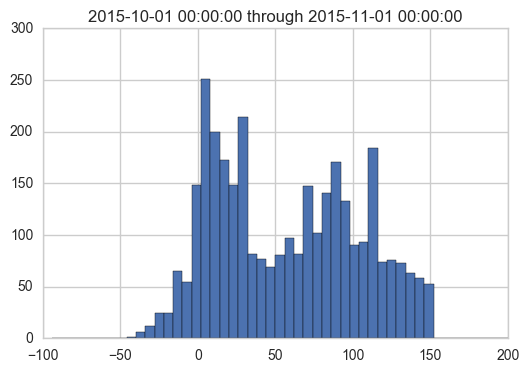

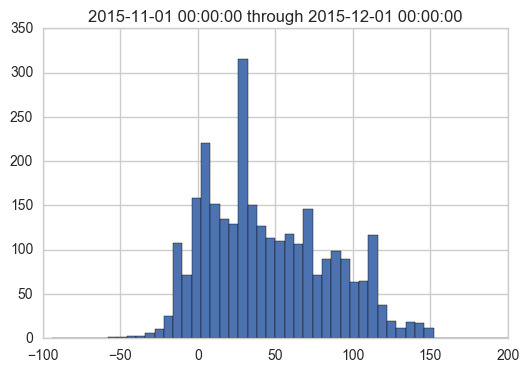

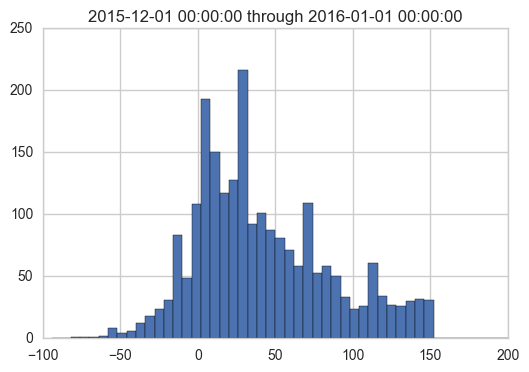

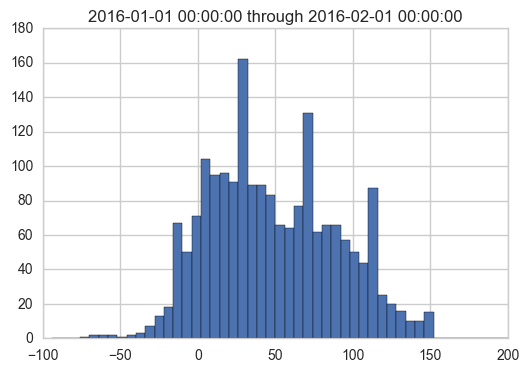

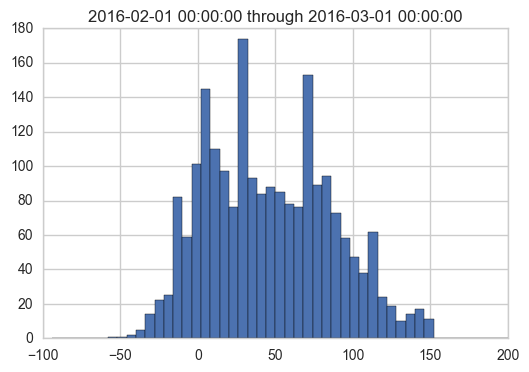

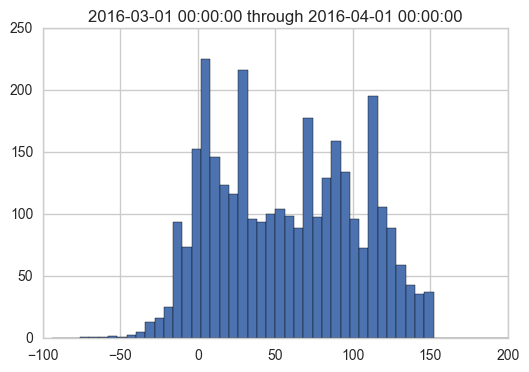

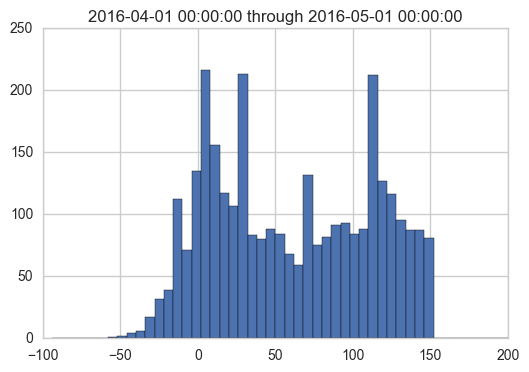

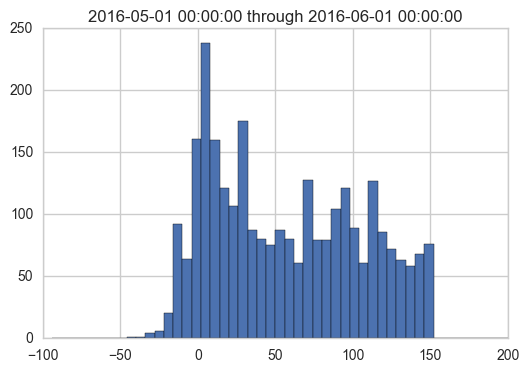

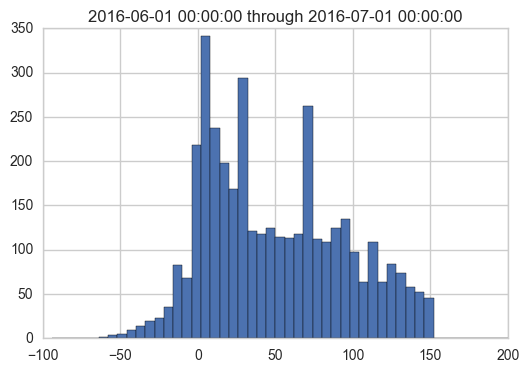

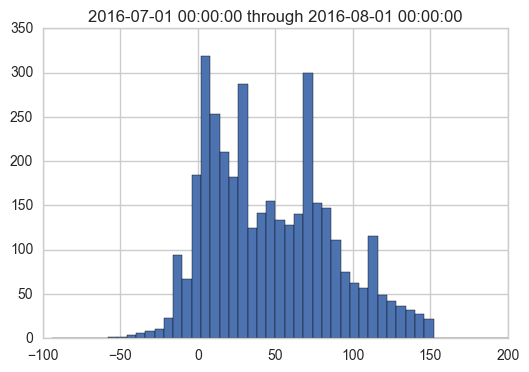

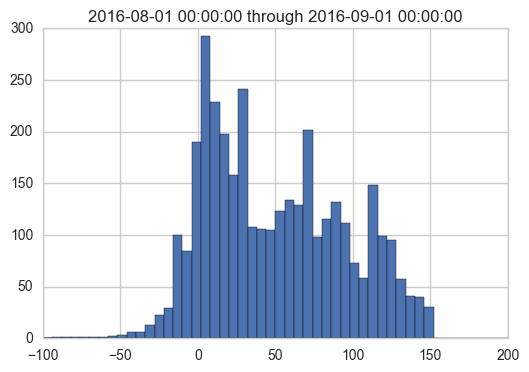

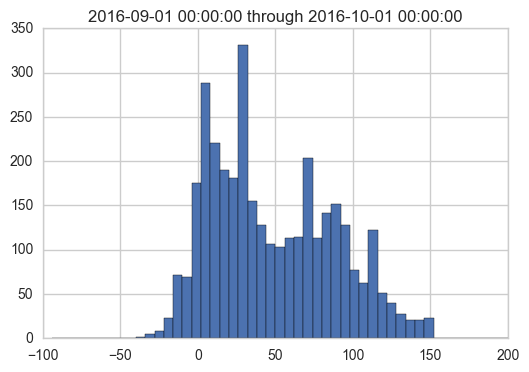

In [86]:
# Look at distributions each month
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-08-01 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_month = relativedelta(months=1)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_month
    end += add_month

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


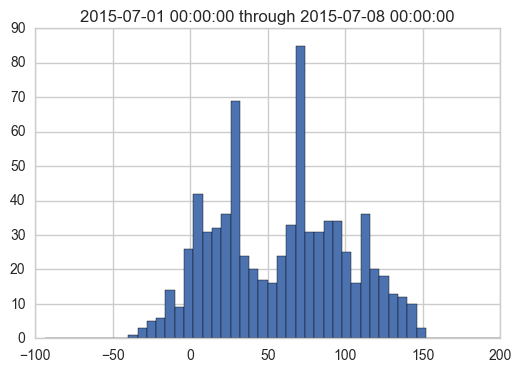

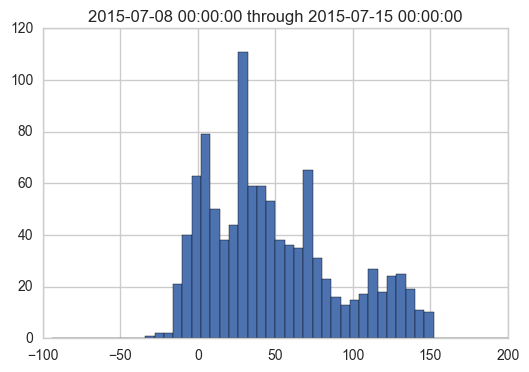

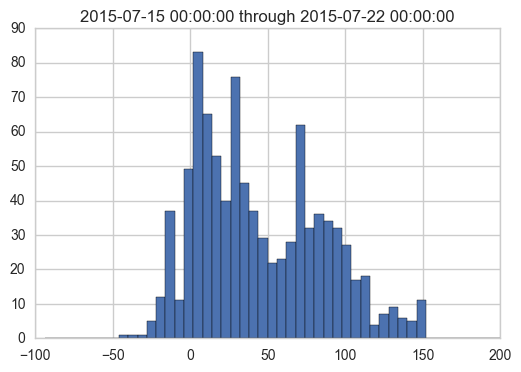

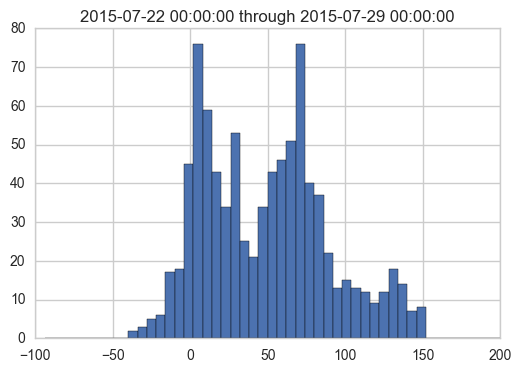

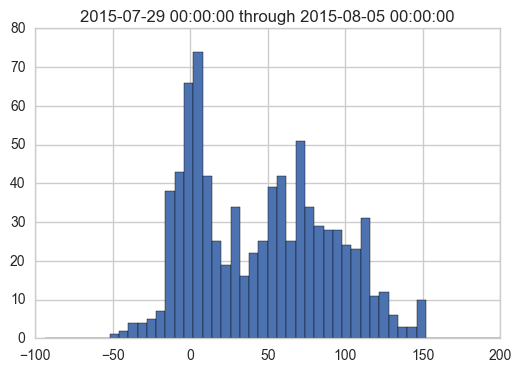

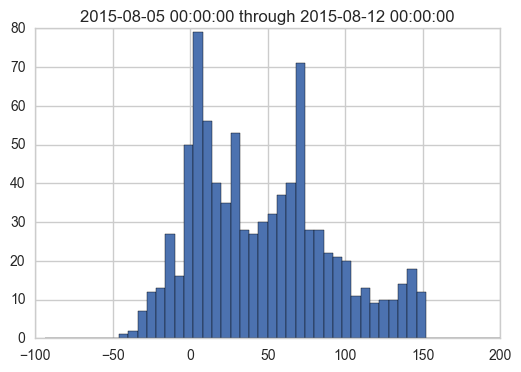

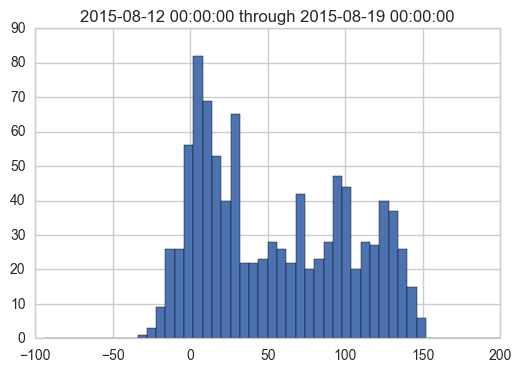

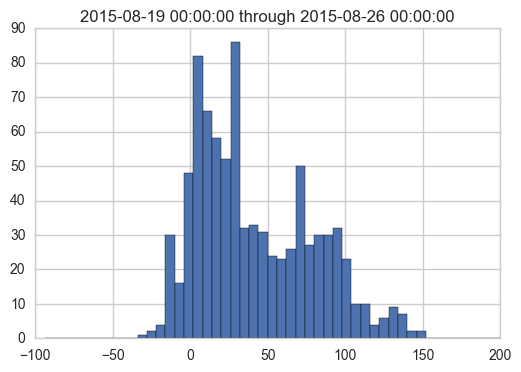

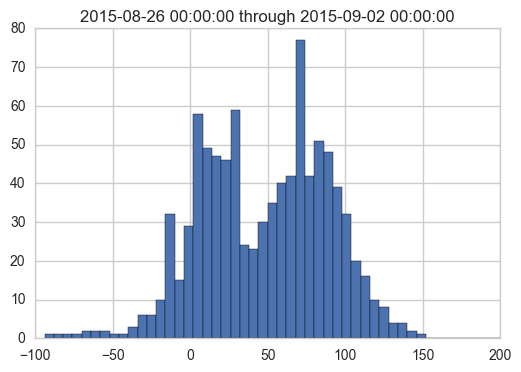

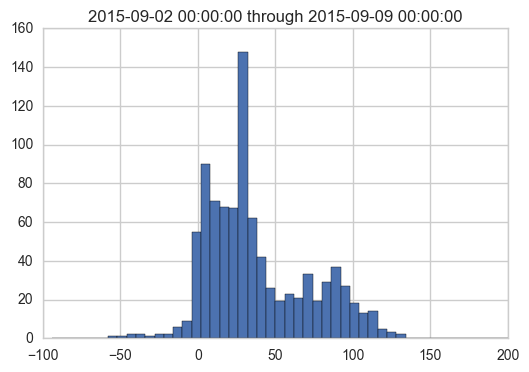

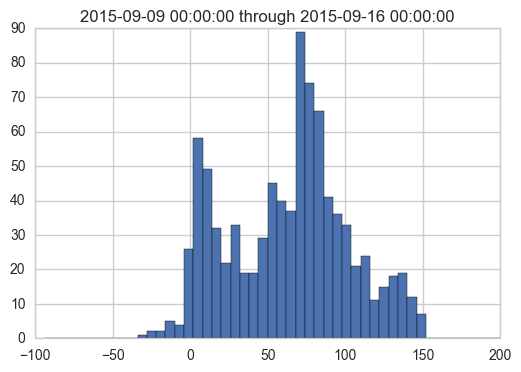

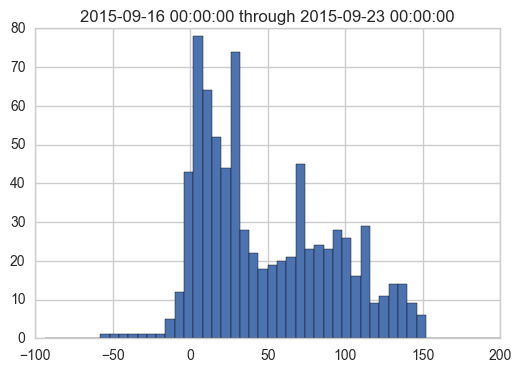

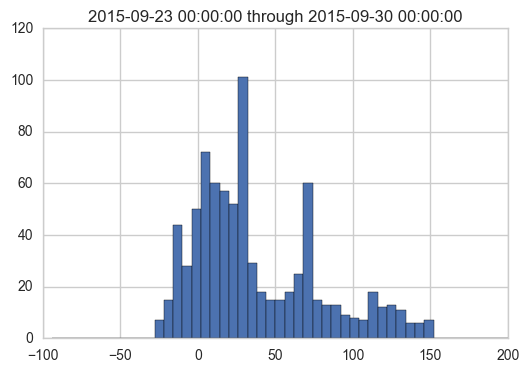

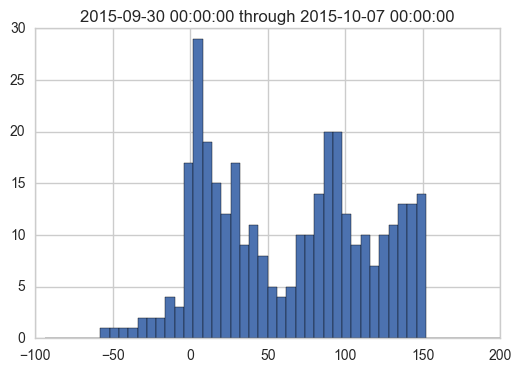

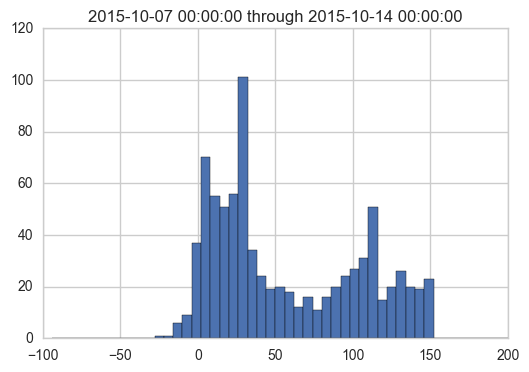

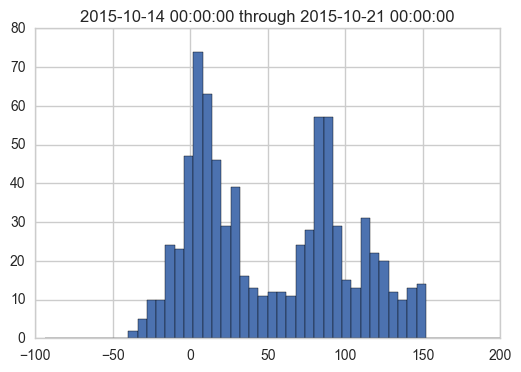

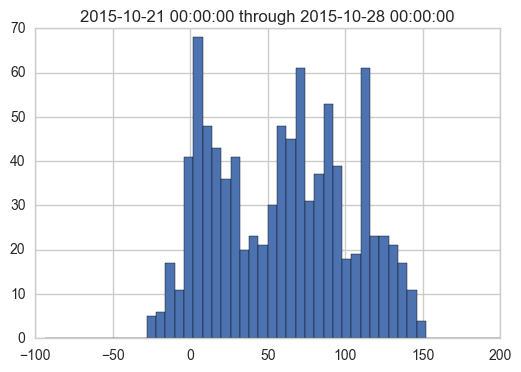

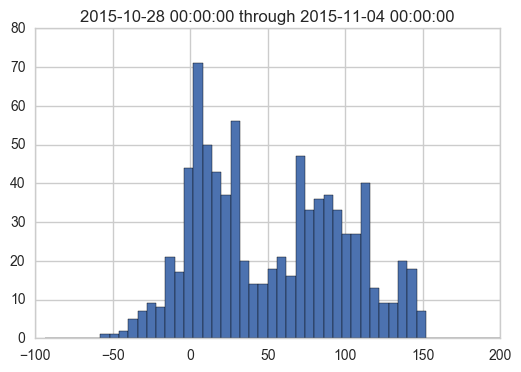

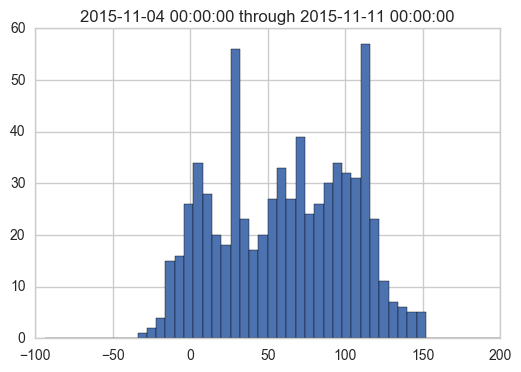

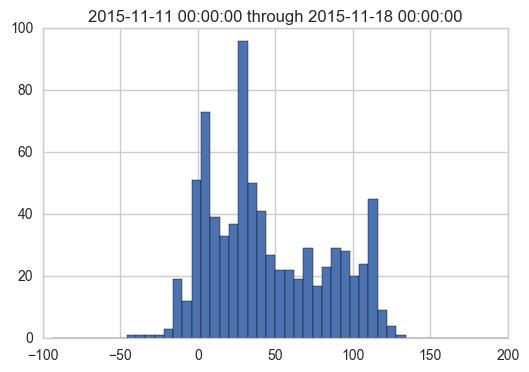

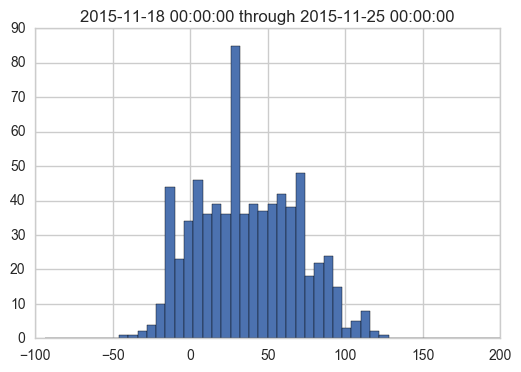

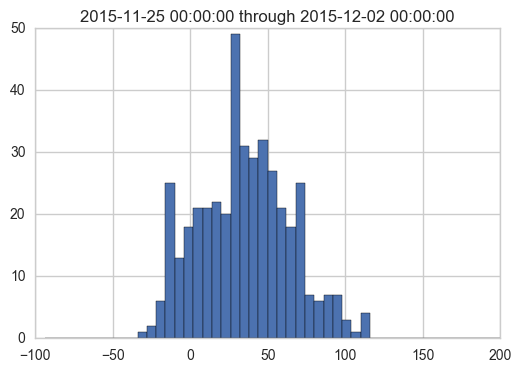

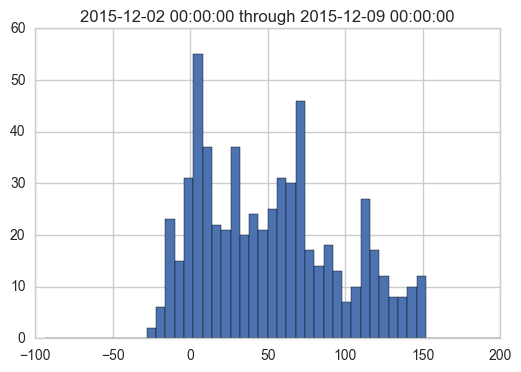

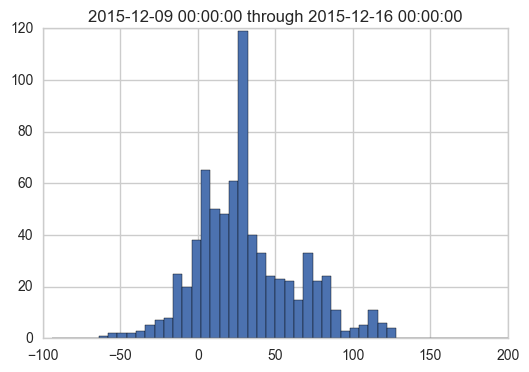

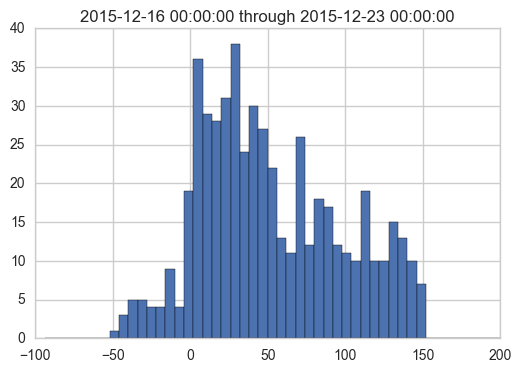

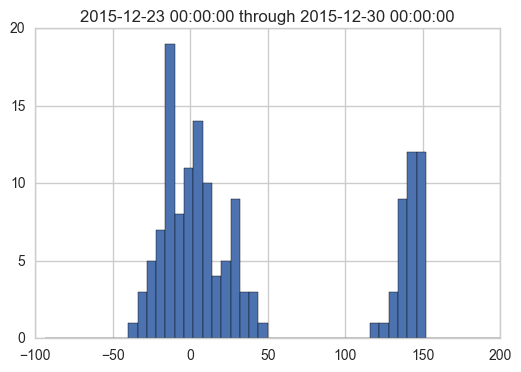

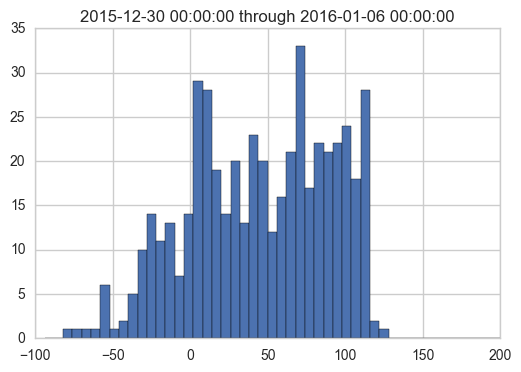

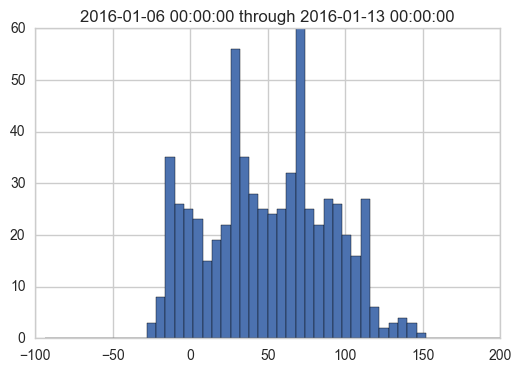

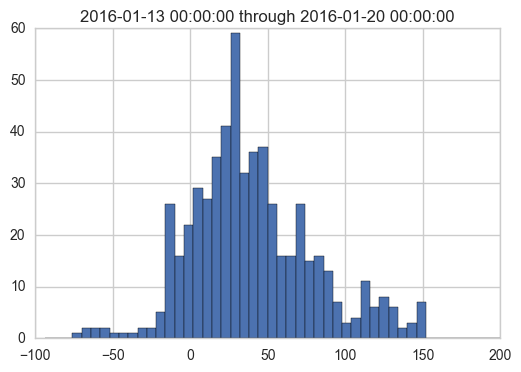

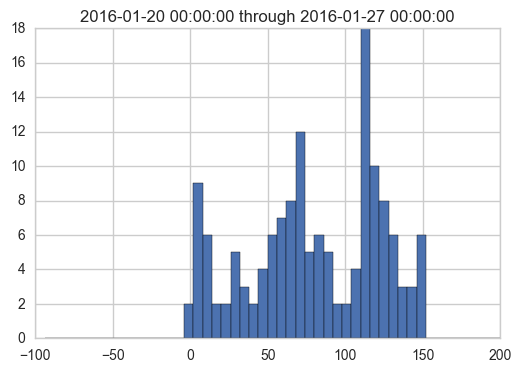

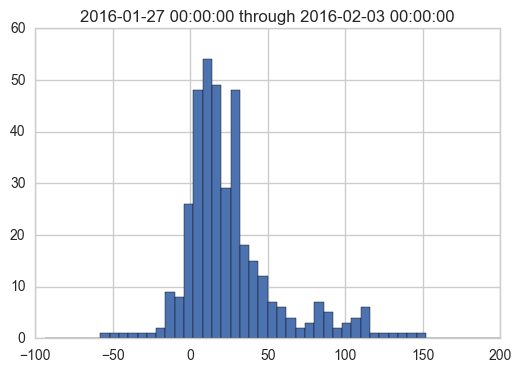

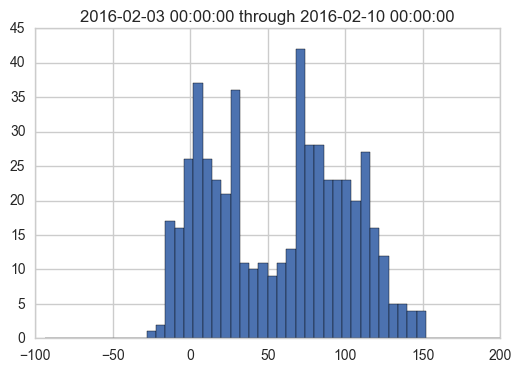

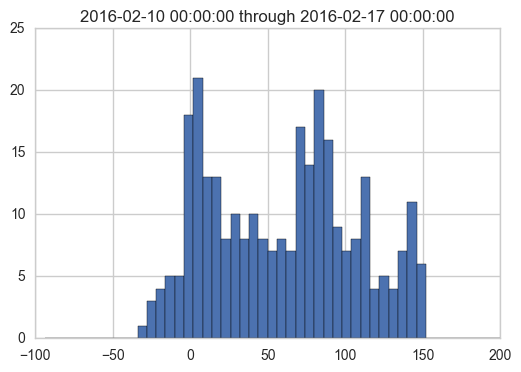

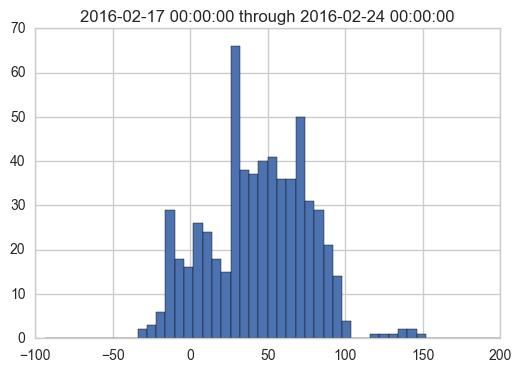

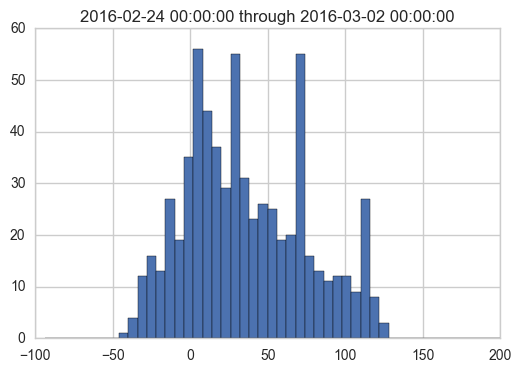

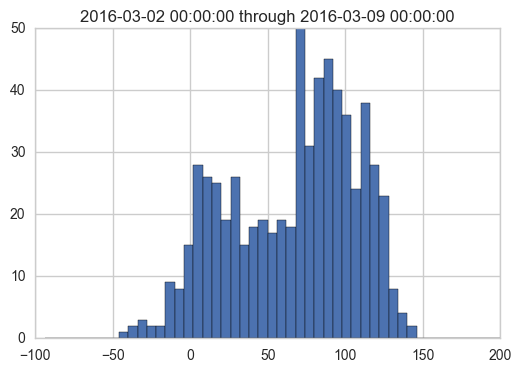

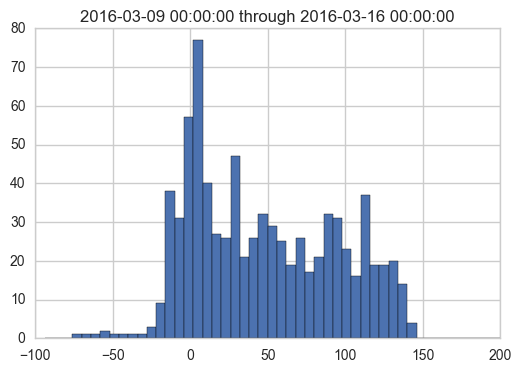

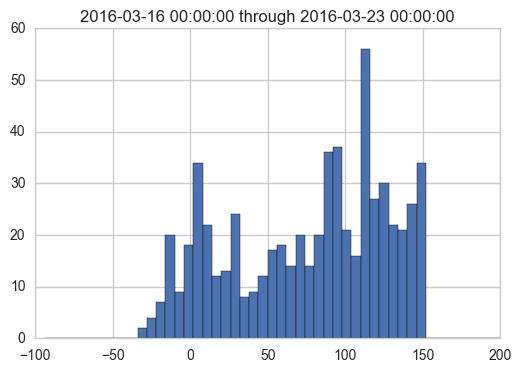

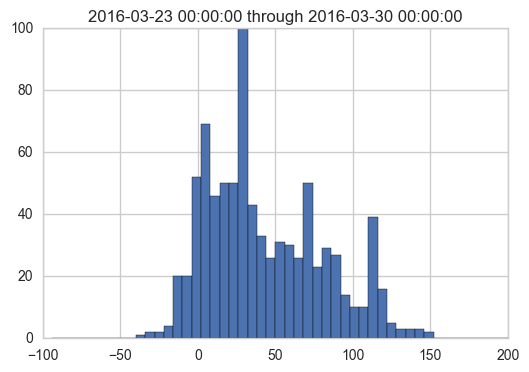

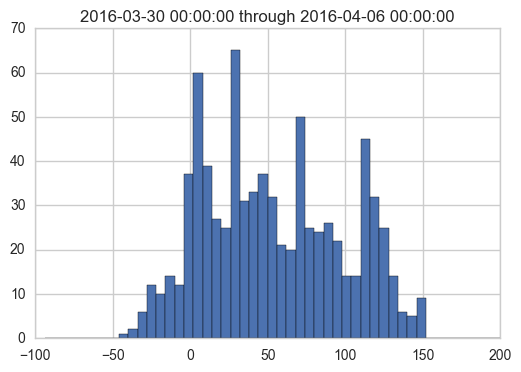

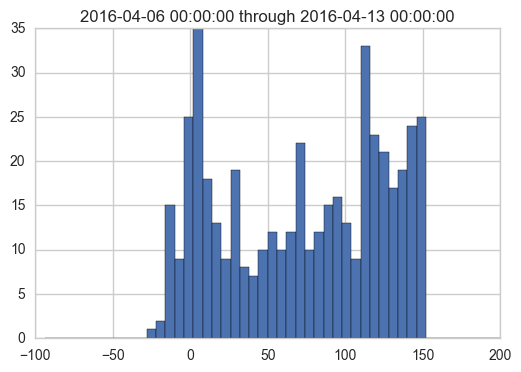

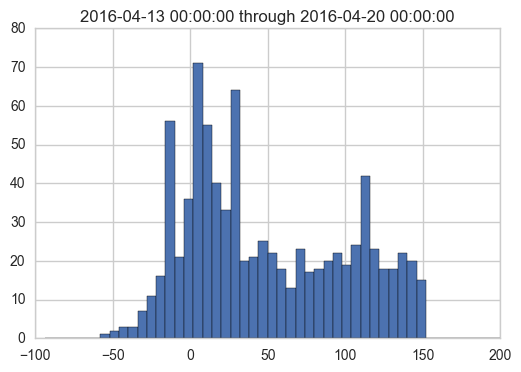

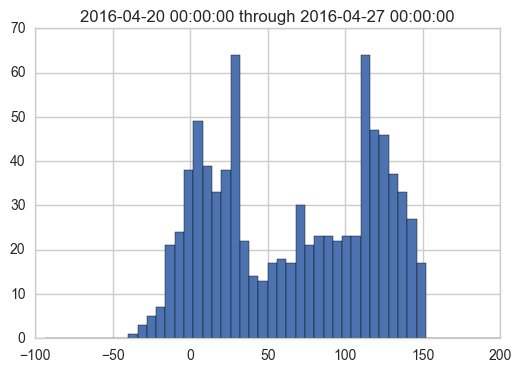

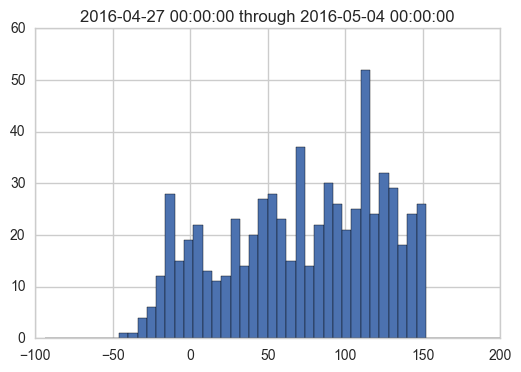

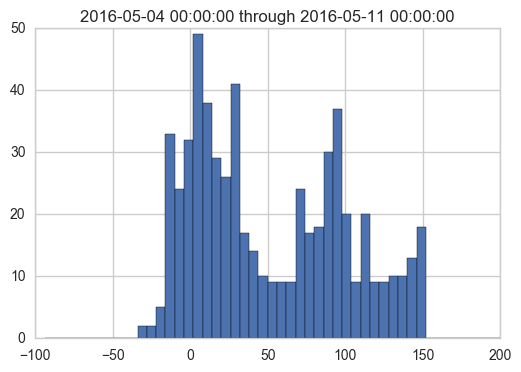

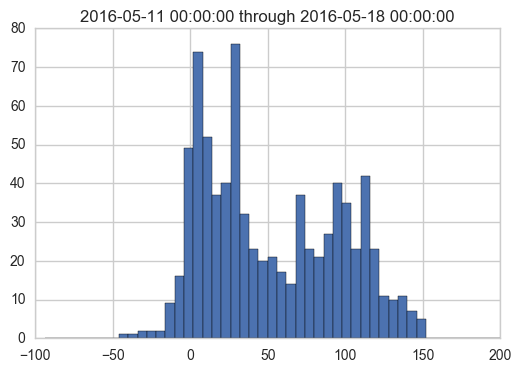

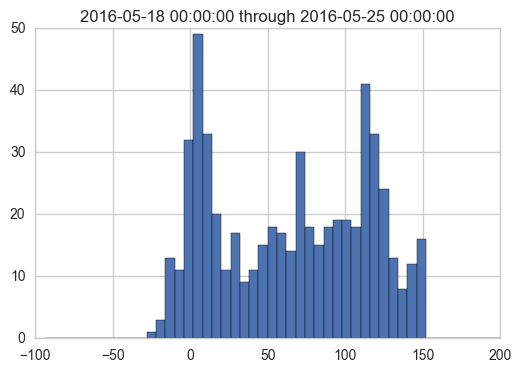

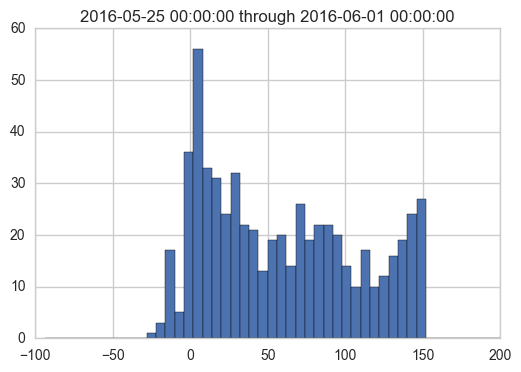

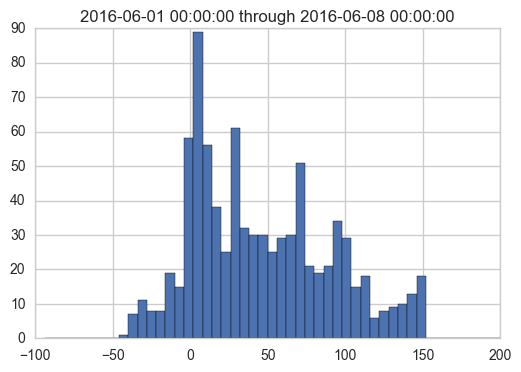

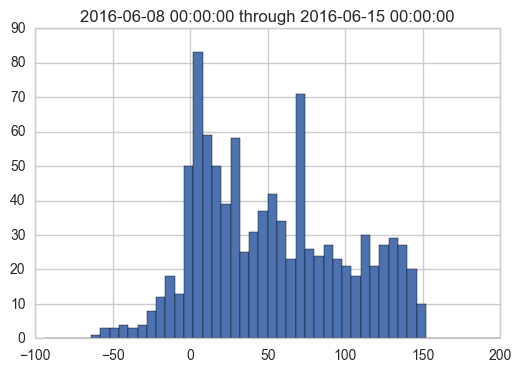

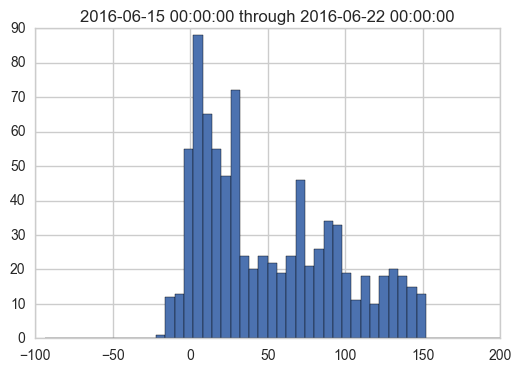

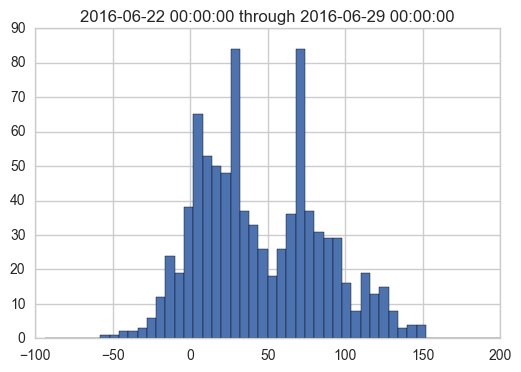

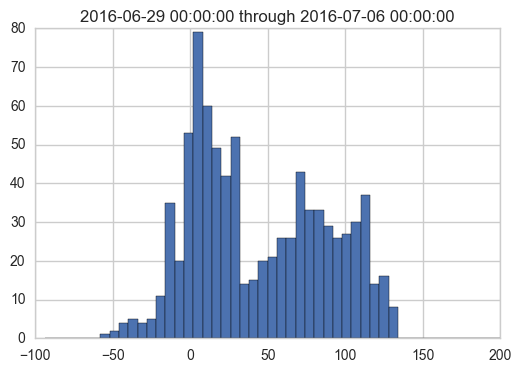

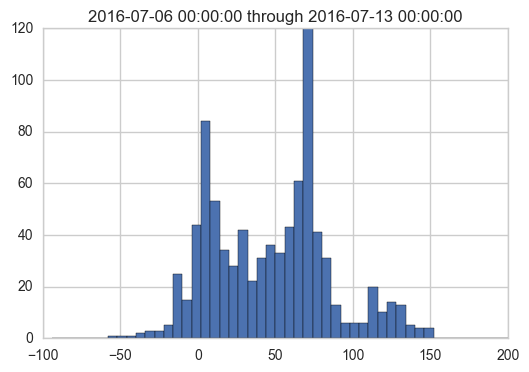

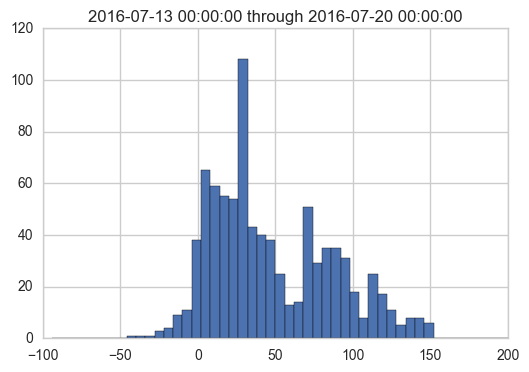

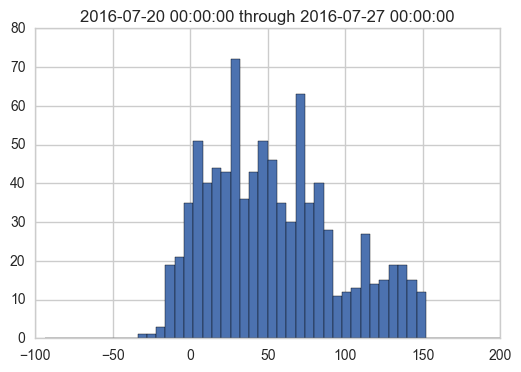

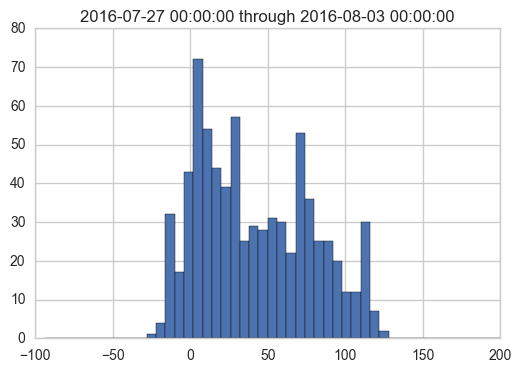

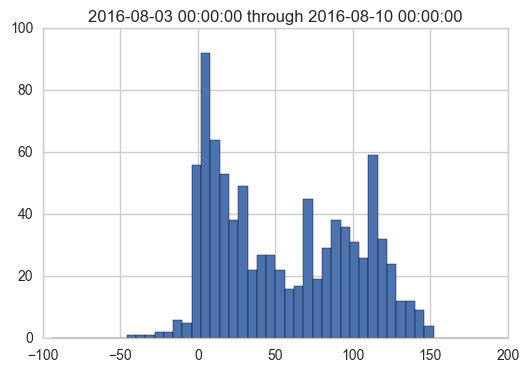

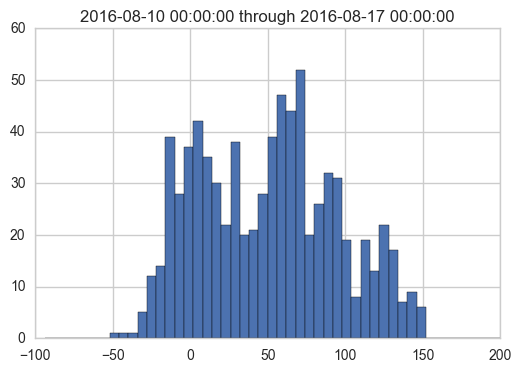

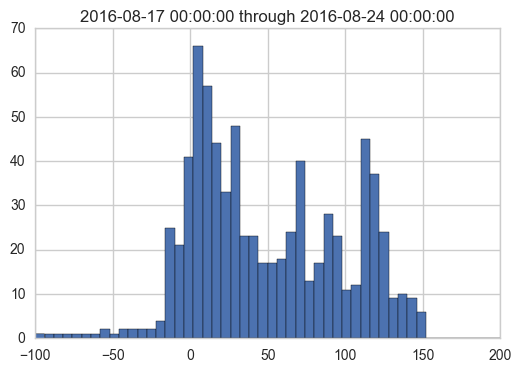

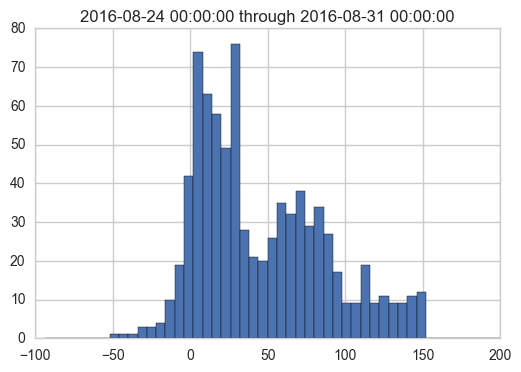

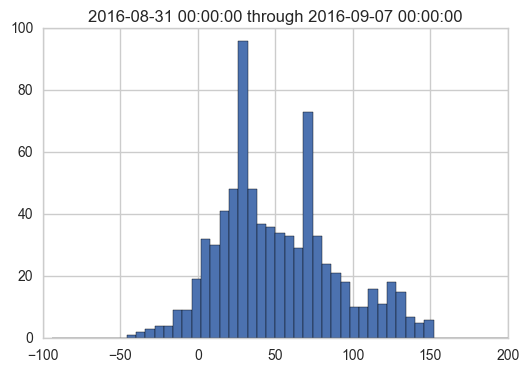

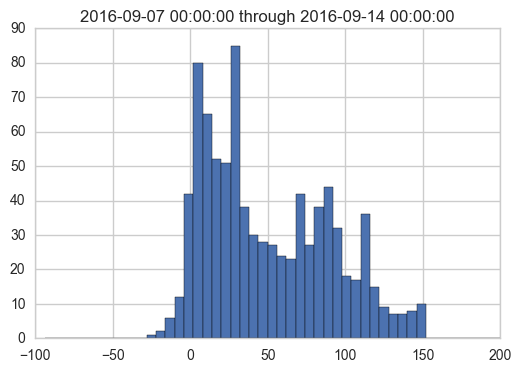

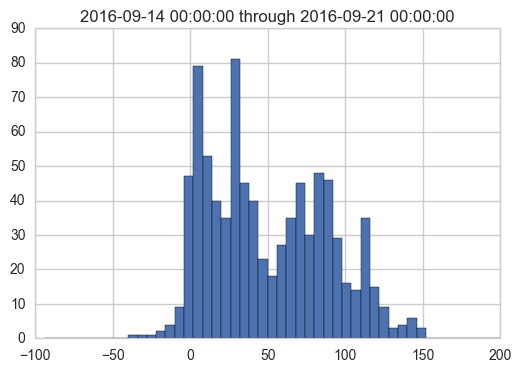

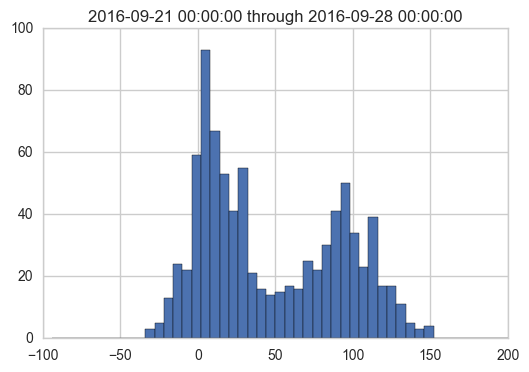

In [87]:
# Look at distributions each week
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-07-08 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_week = datetime.timedelta(days=7)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_week
    end += add_week

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


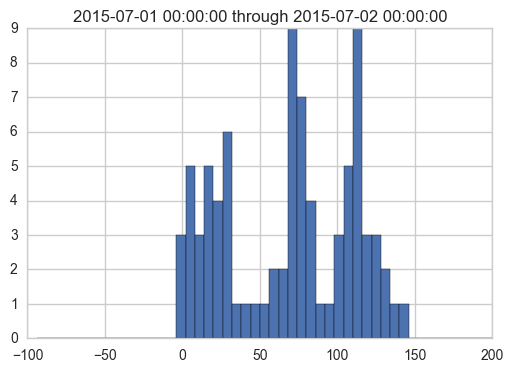

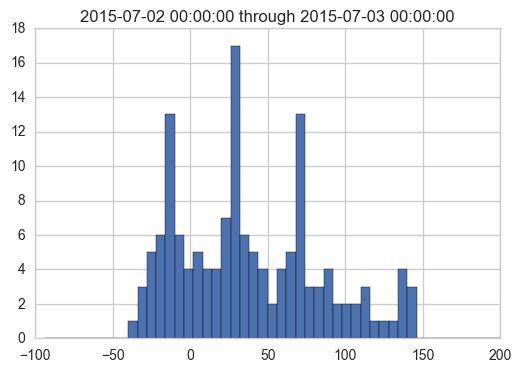

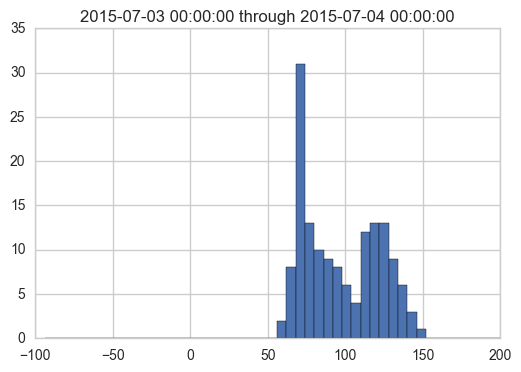

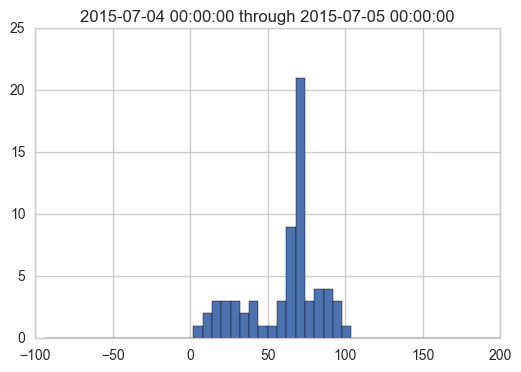

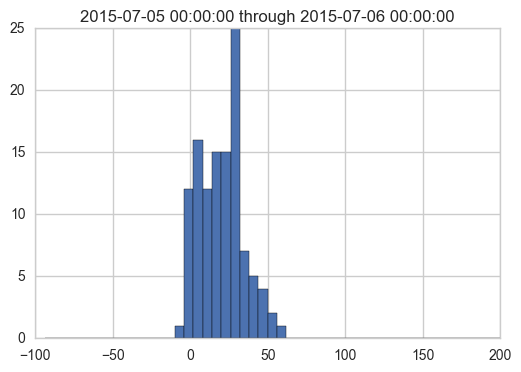

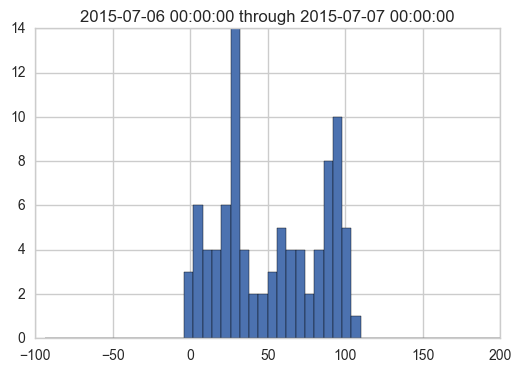

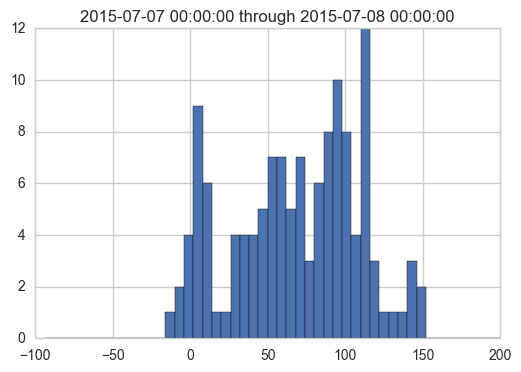

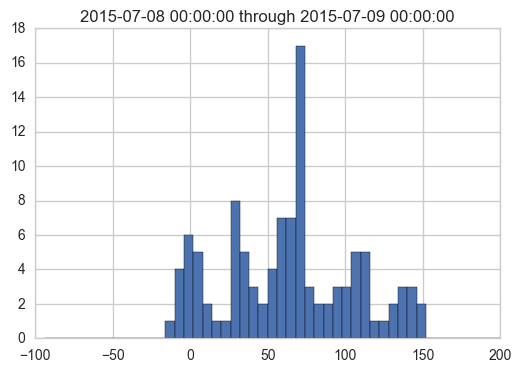

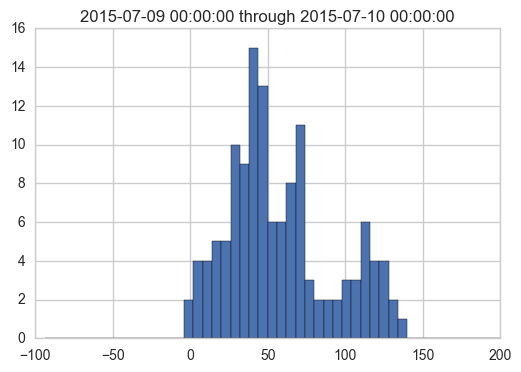

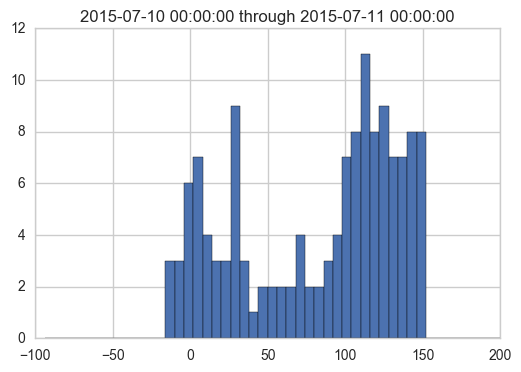

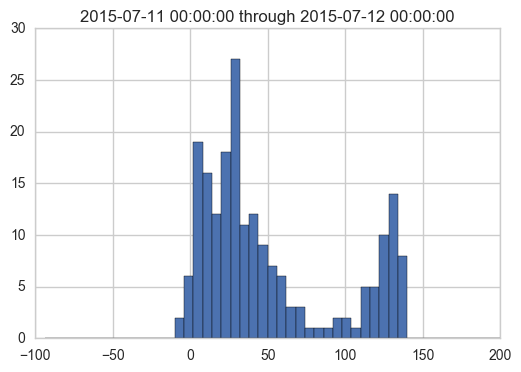

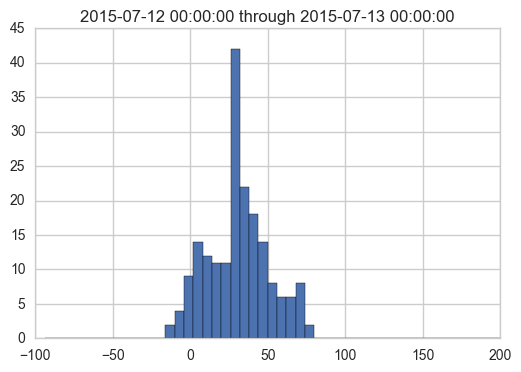

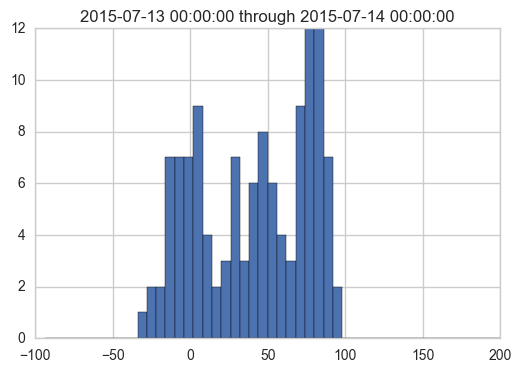

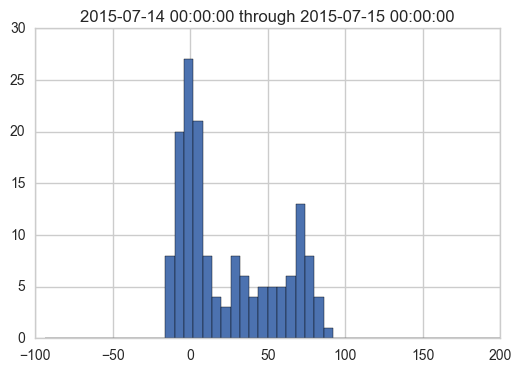

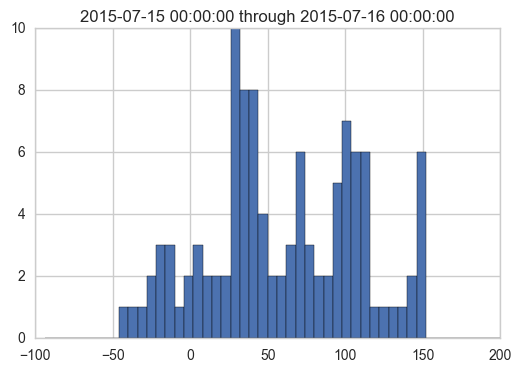

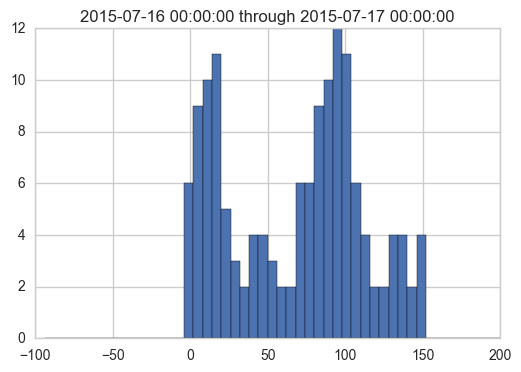

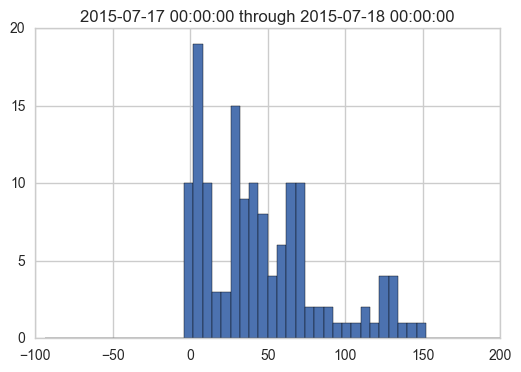

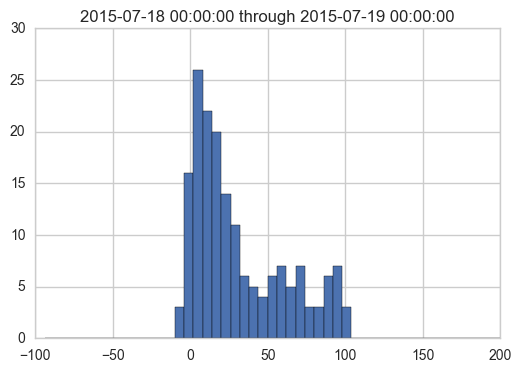

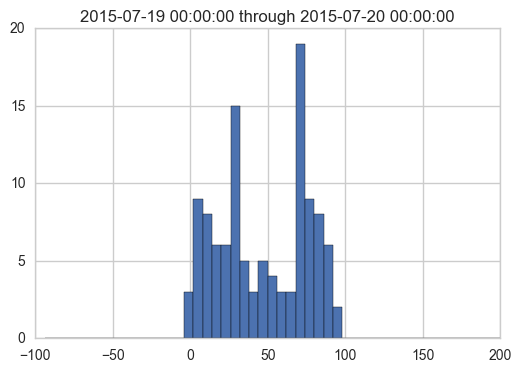

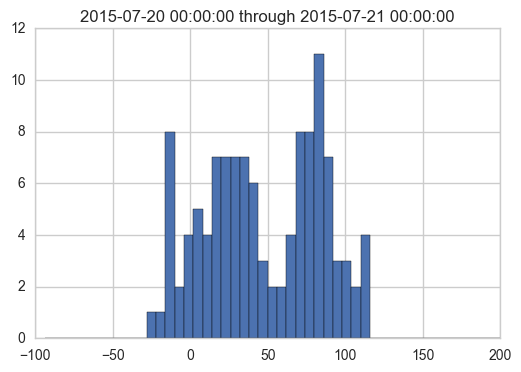

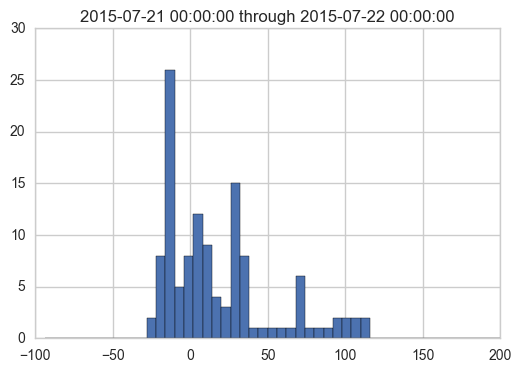

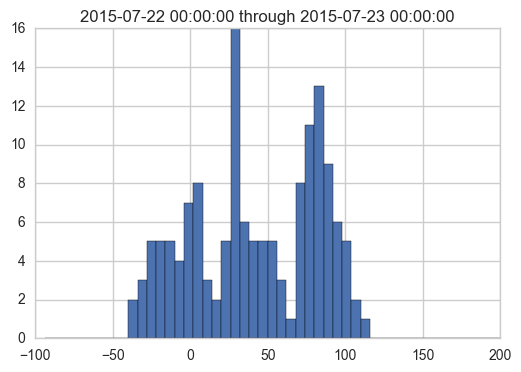

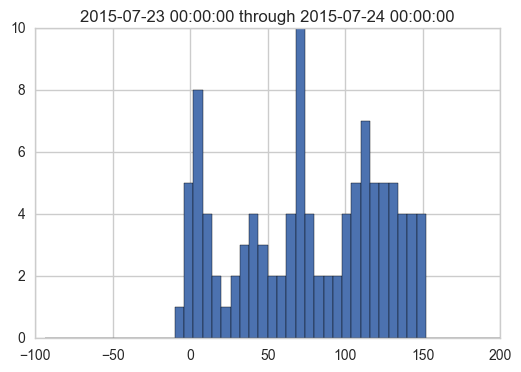

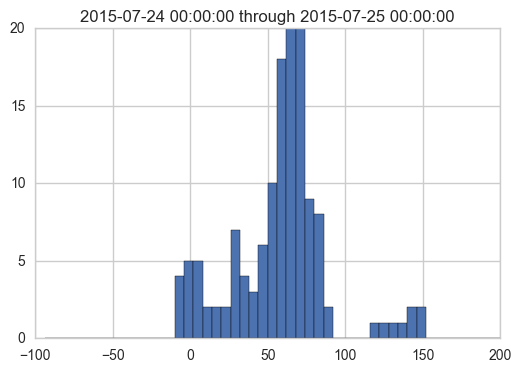

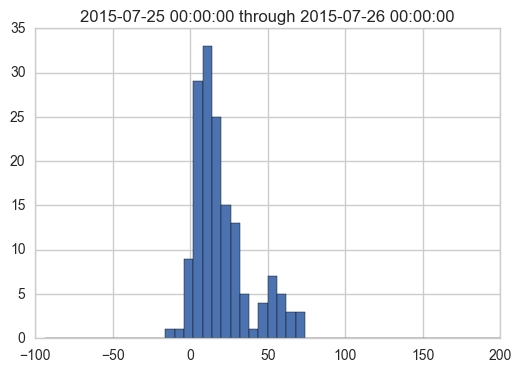

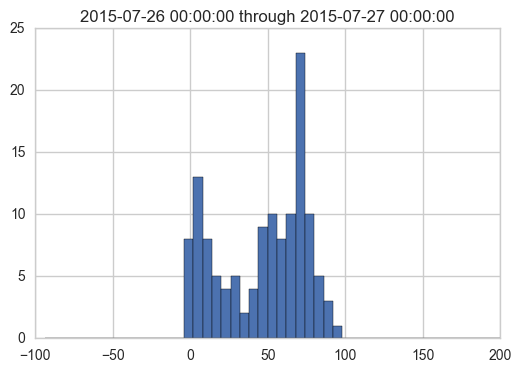

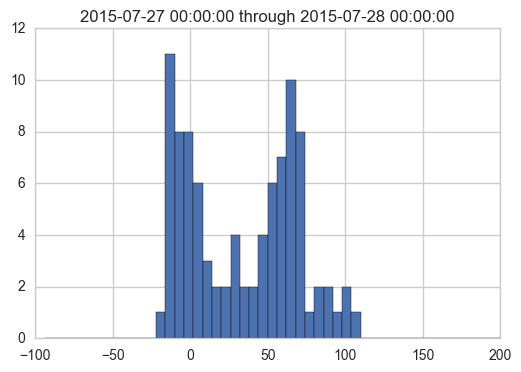

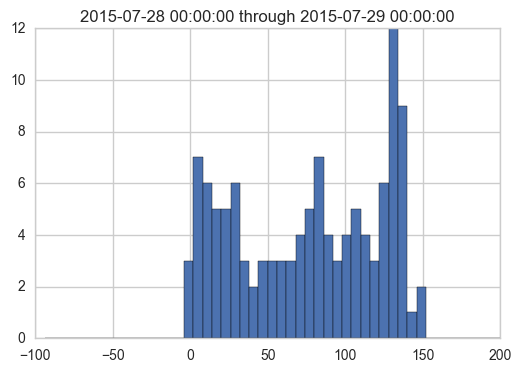

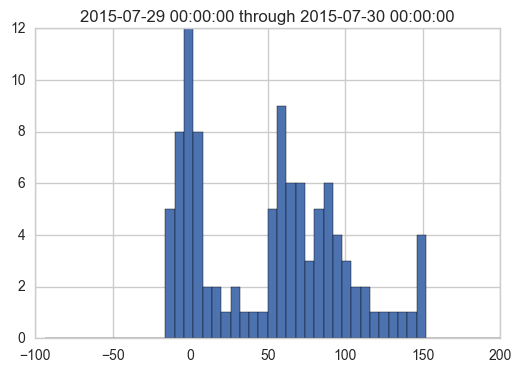

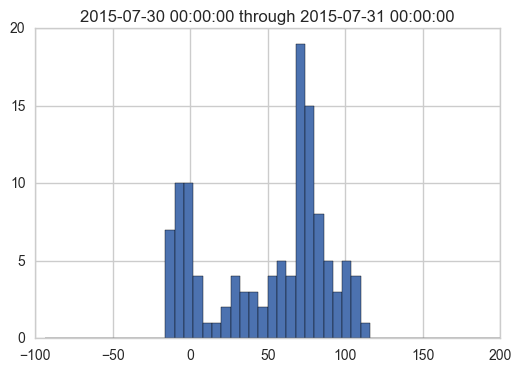

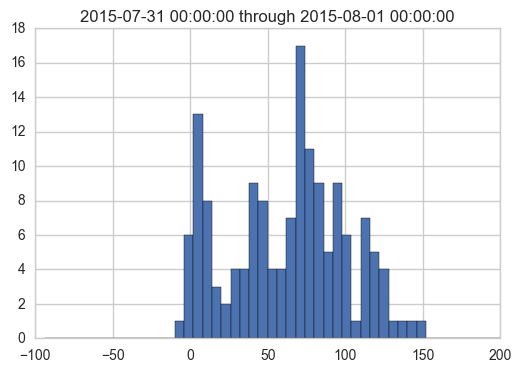

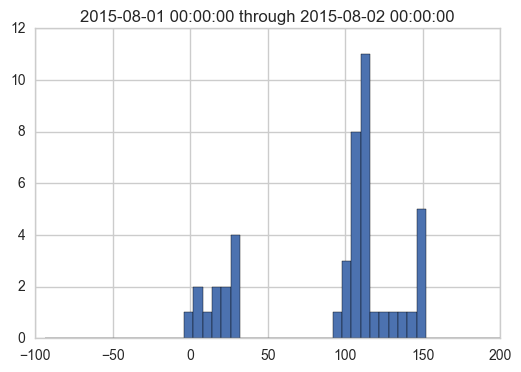

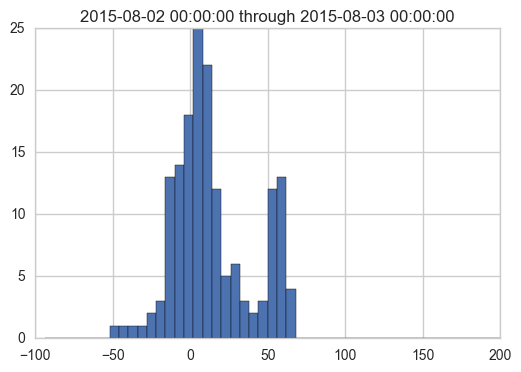

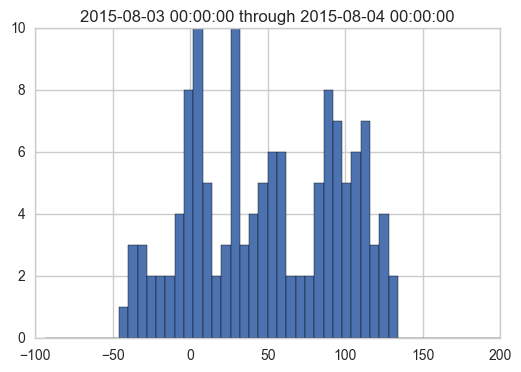

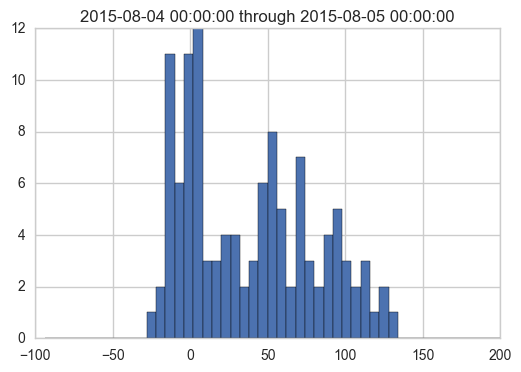

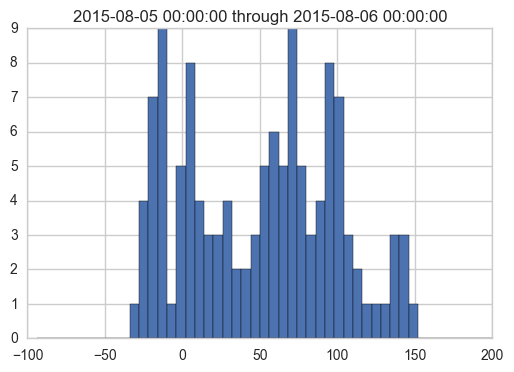

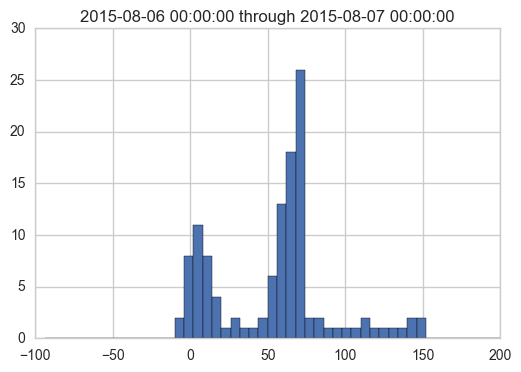

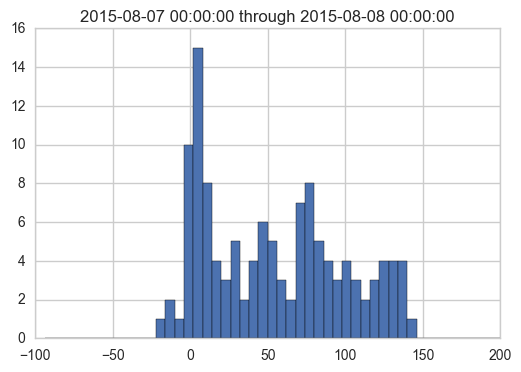

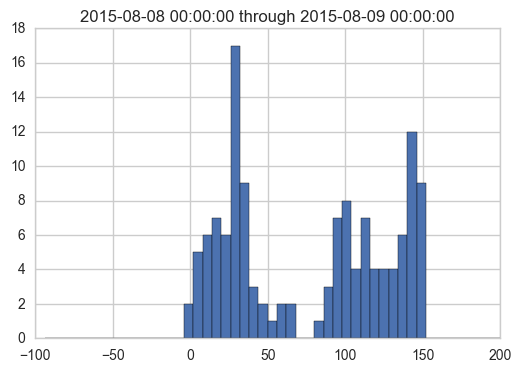

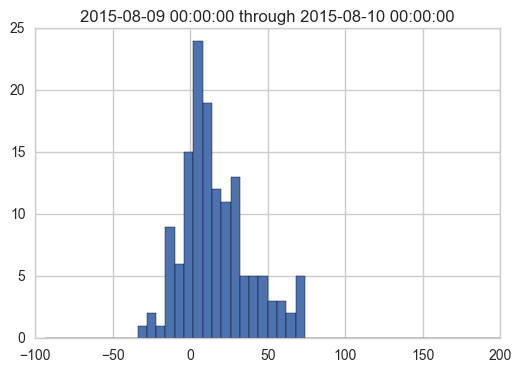

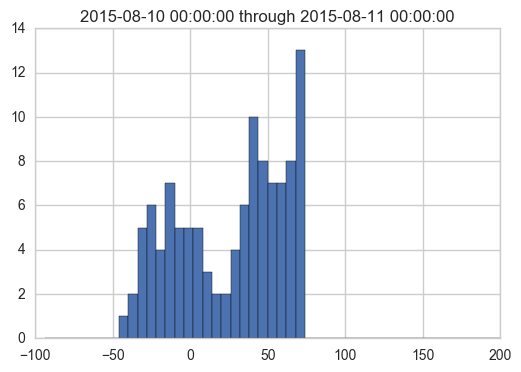

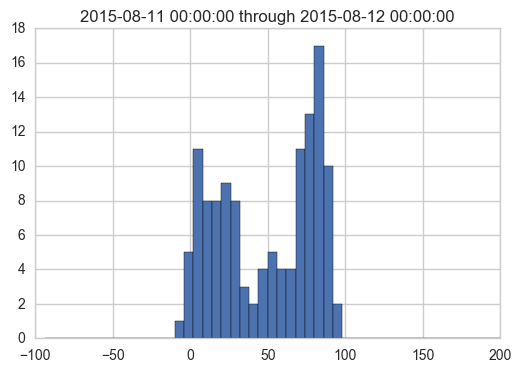

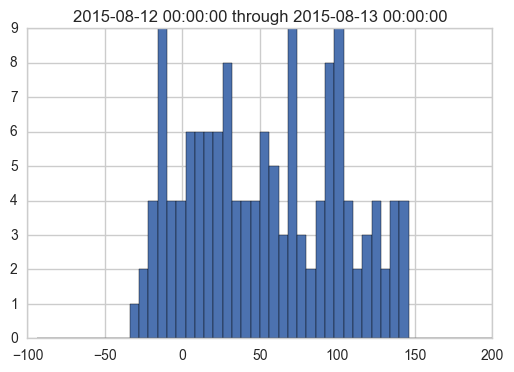

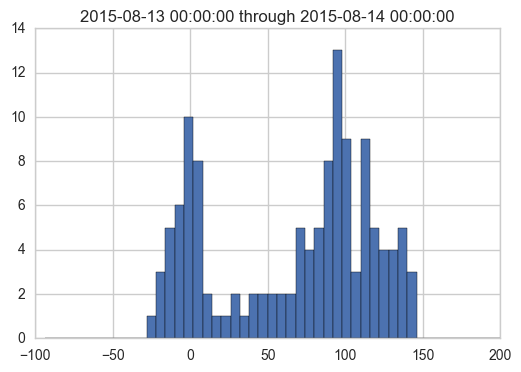

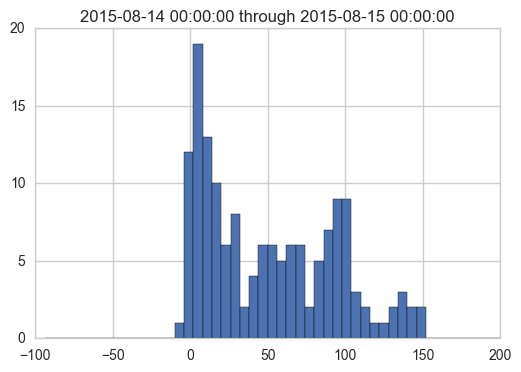

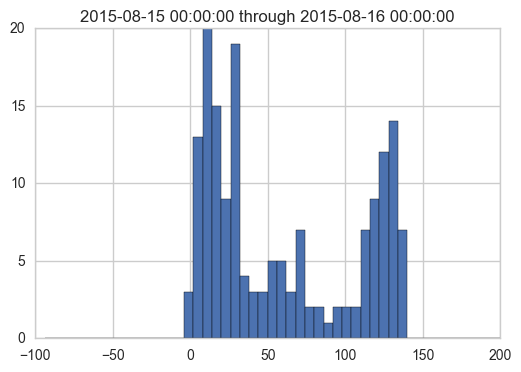

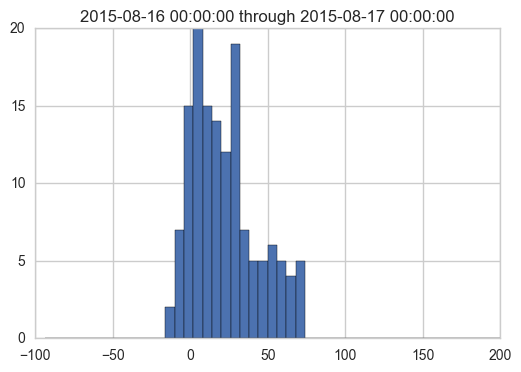

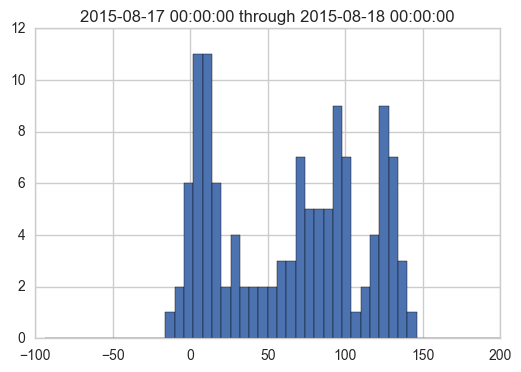

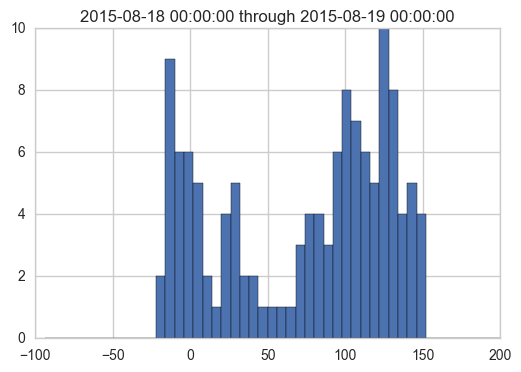

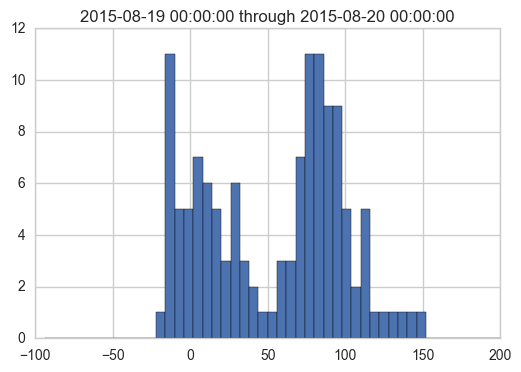

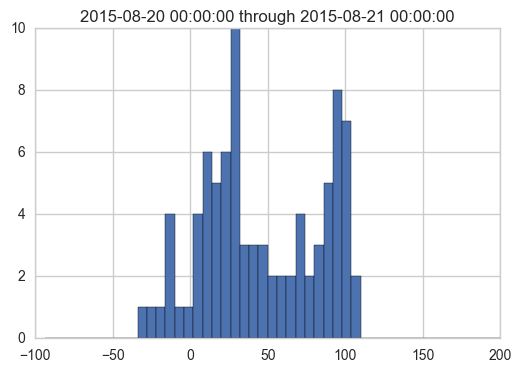

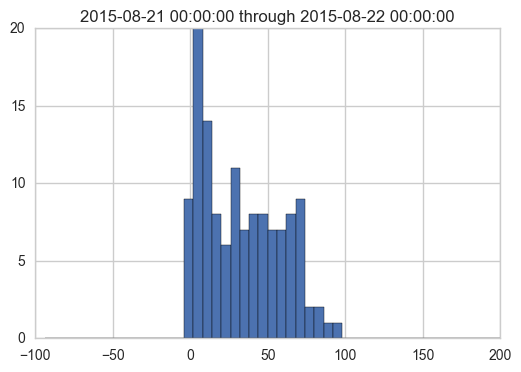

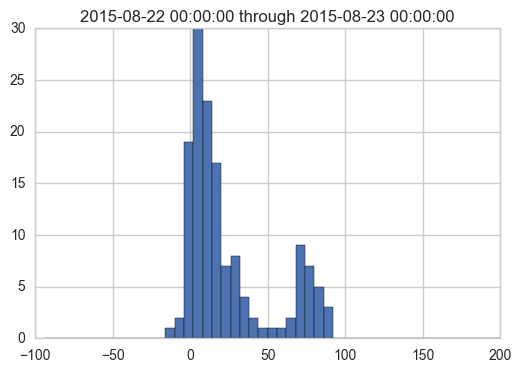

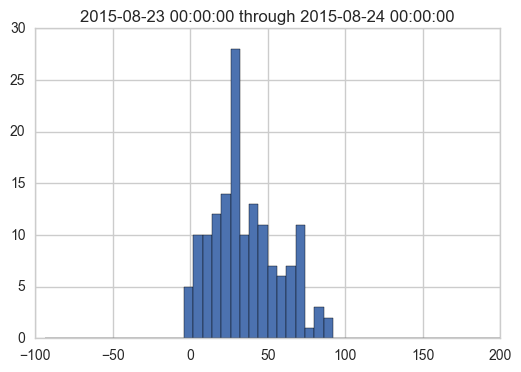

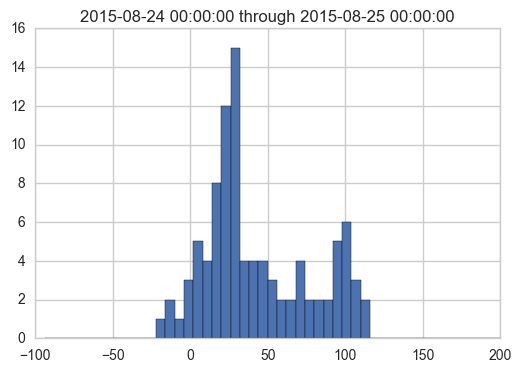

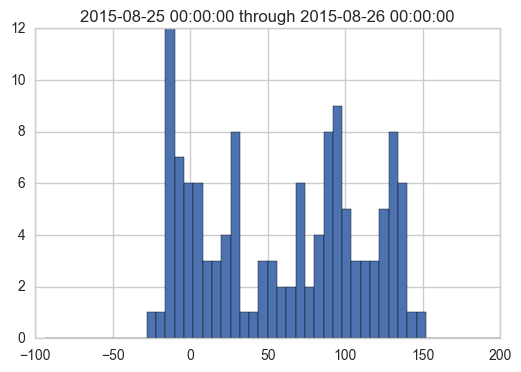

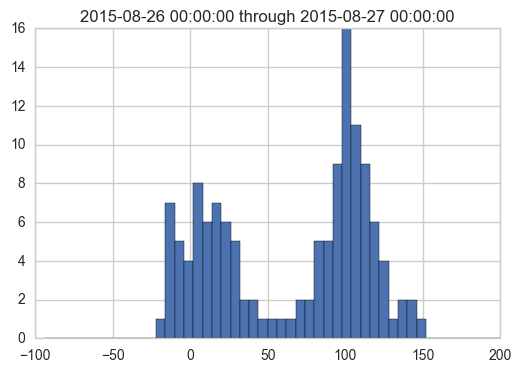

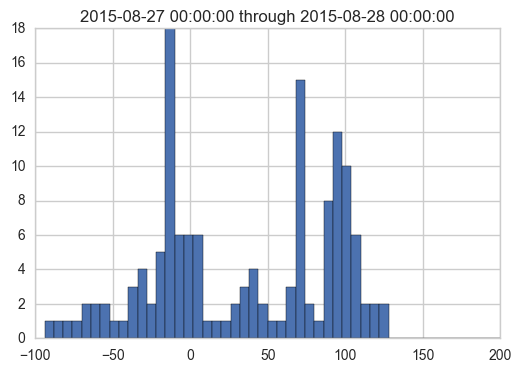

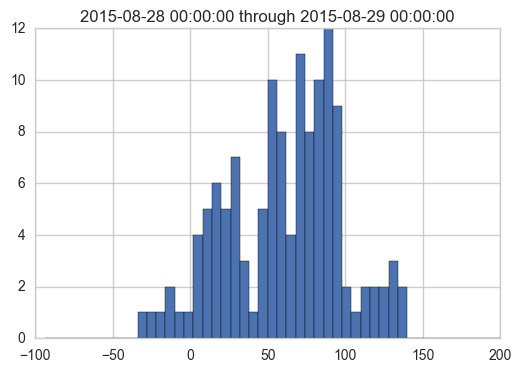

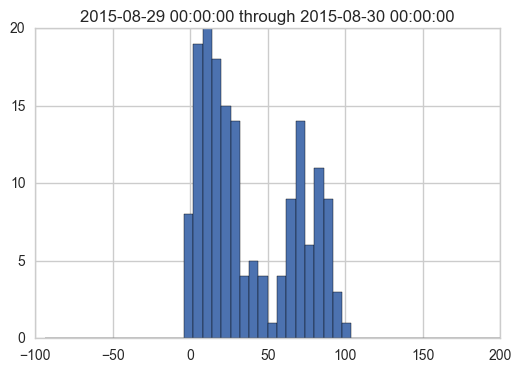

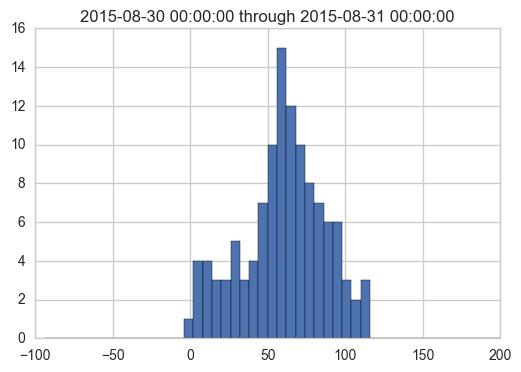

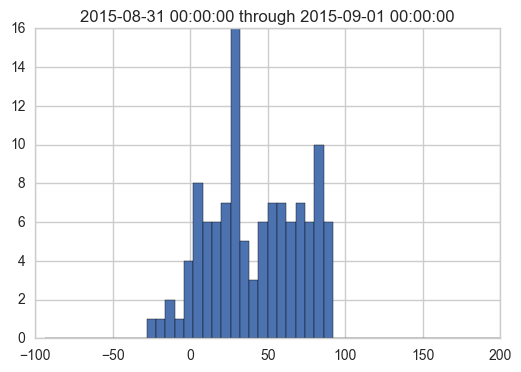

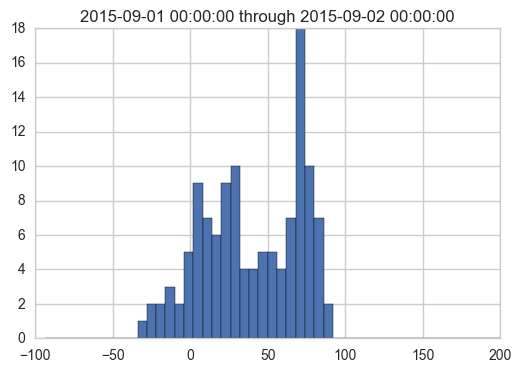

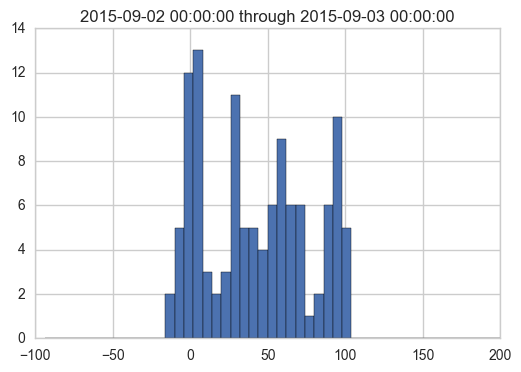

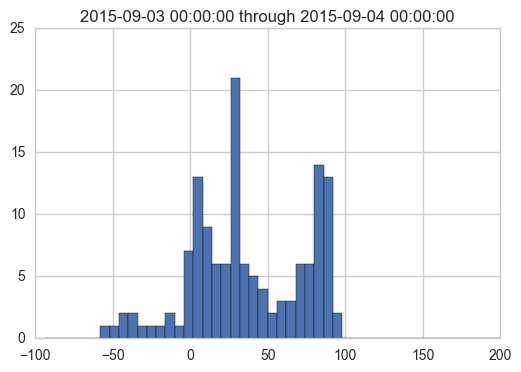

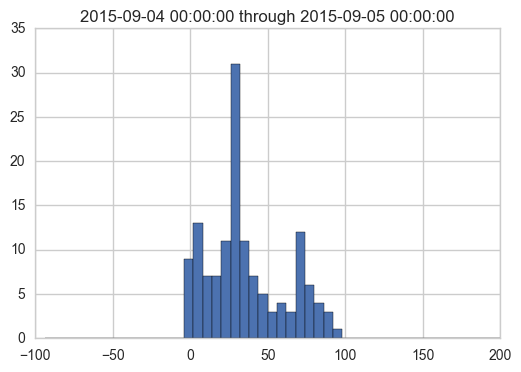

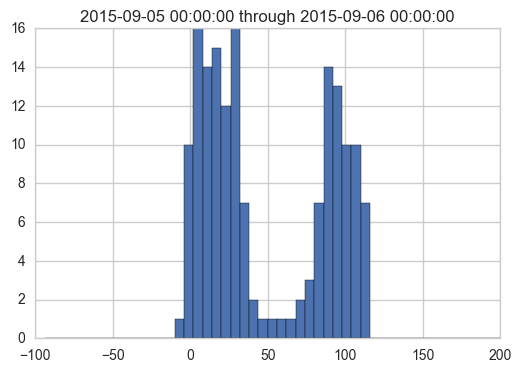

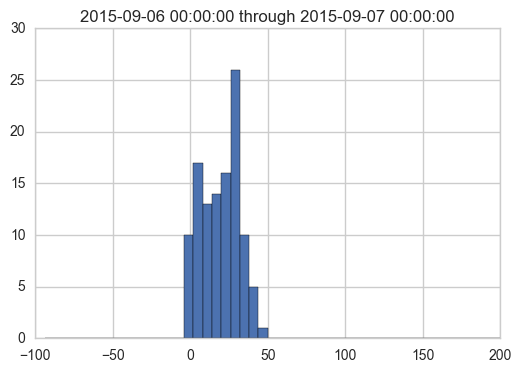

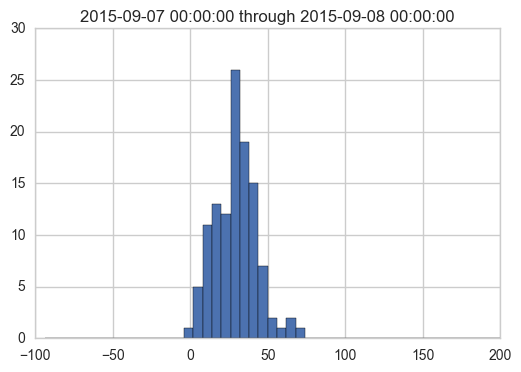

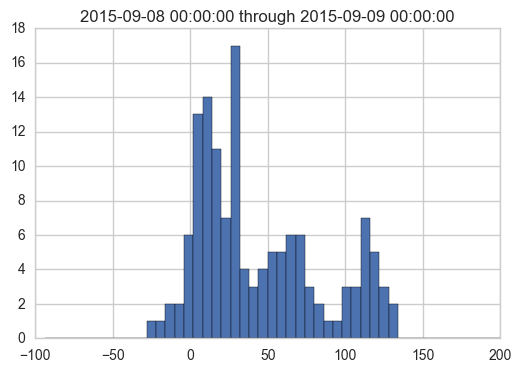

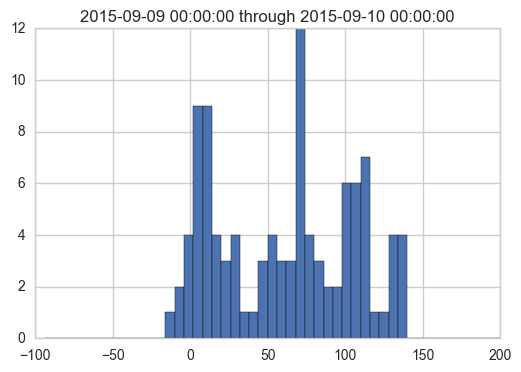

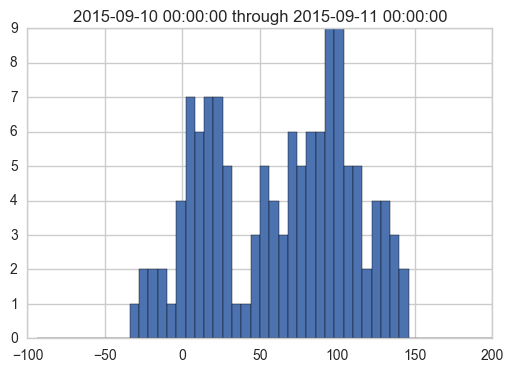

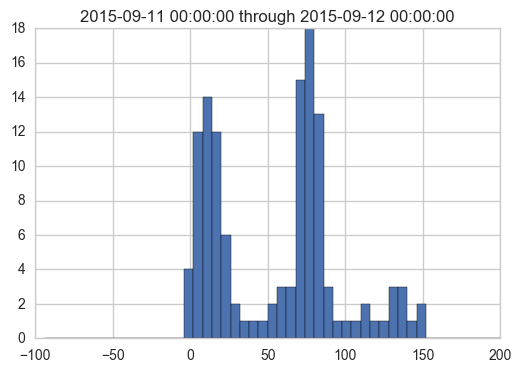

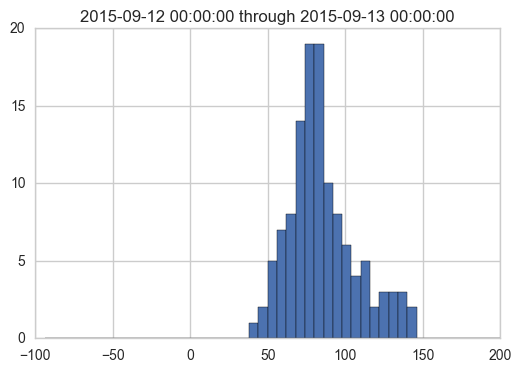

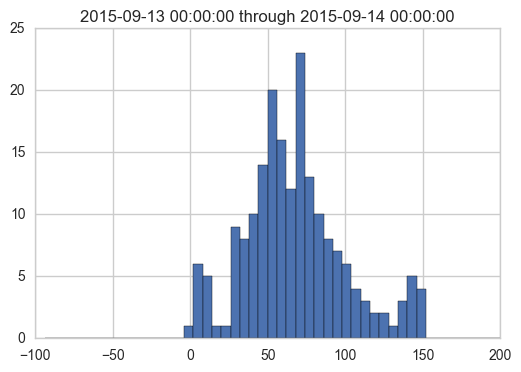

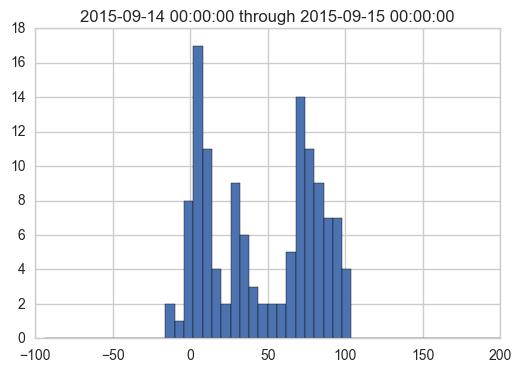

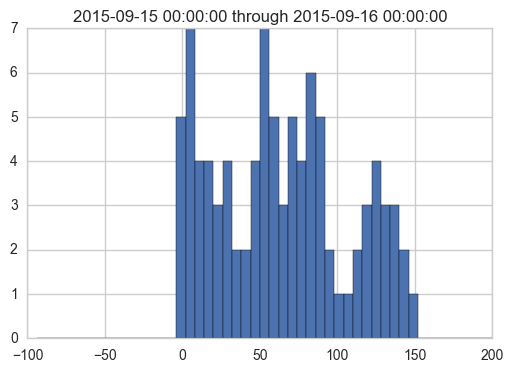

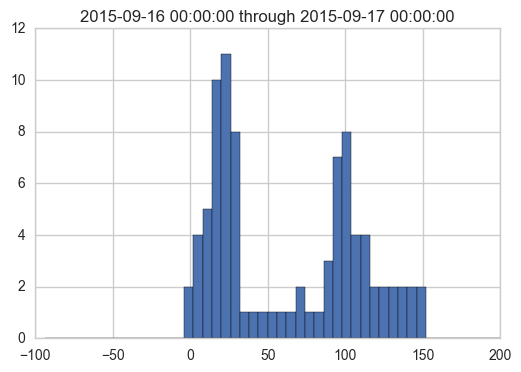

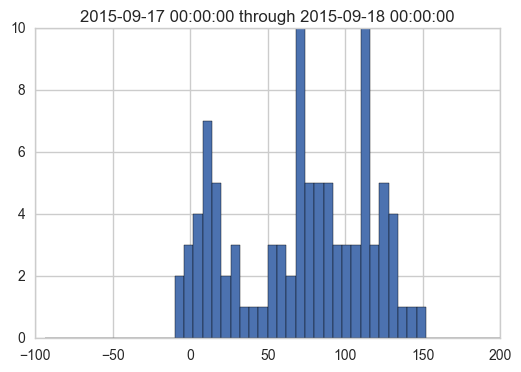

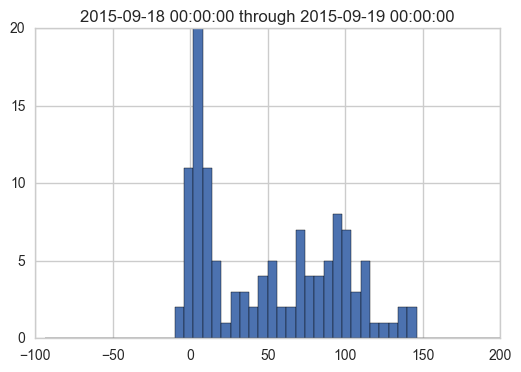

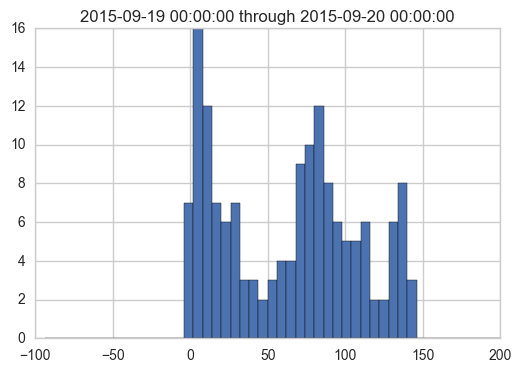

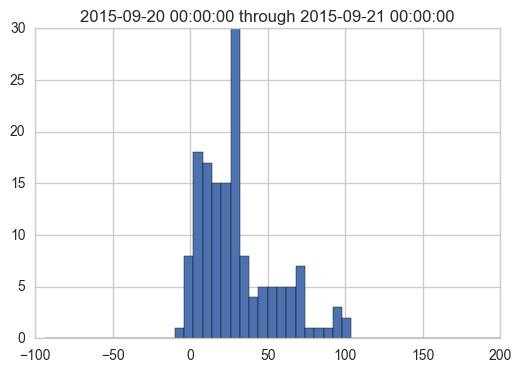

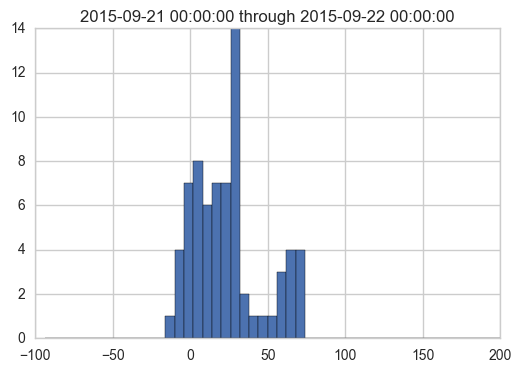

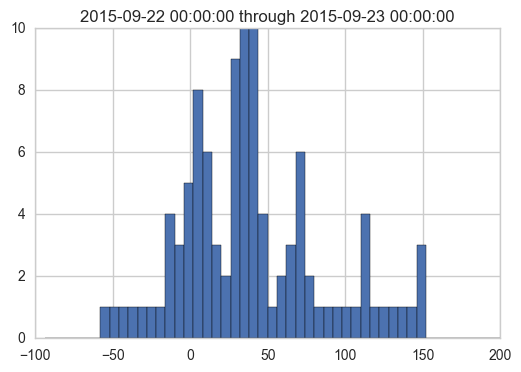

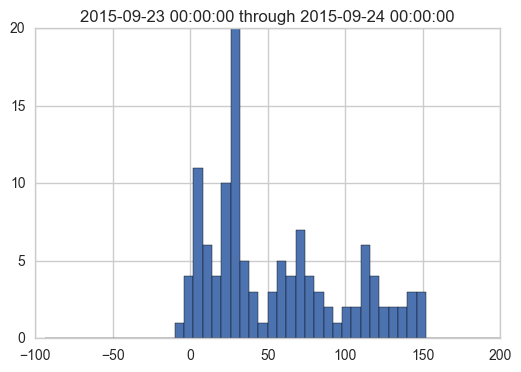

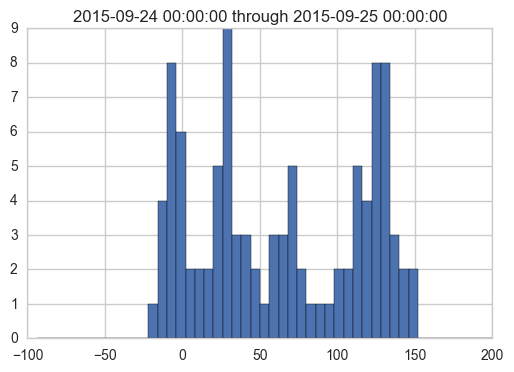

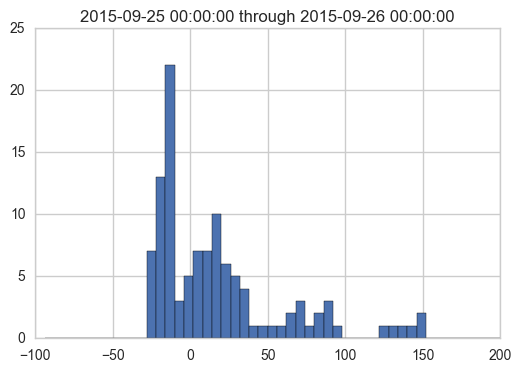

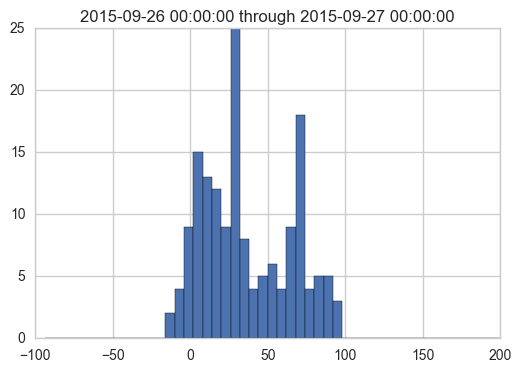

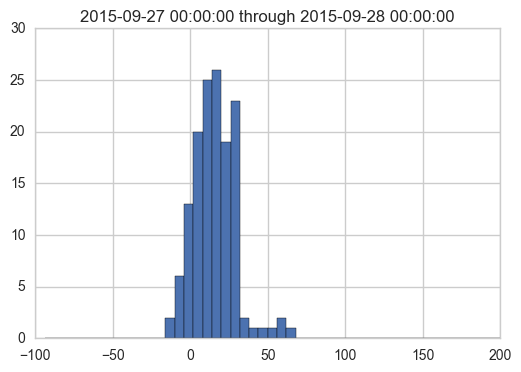

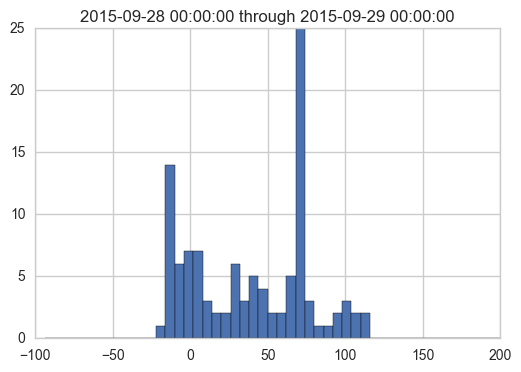

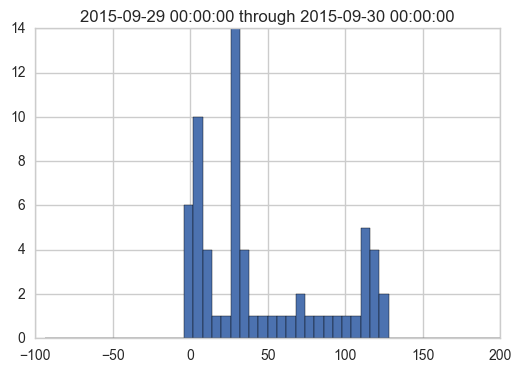

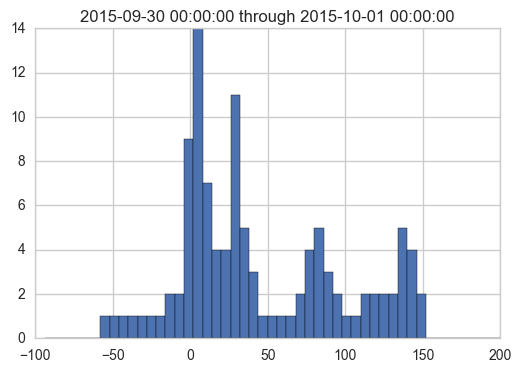

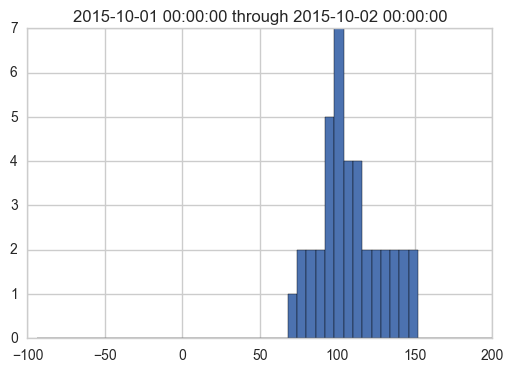

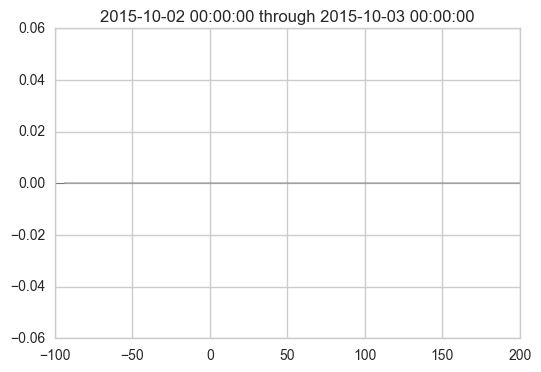

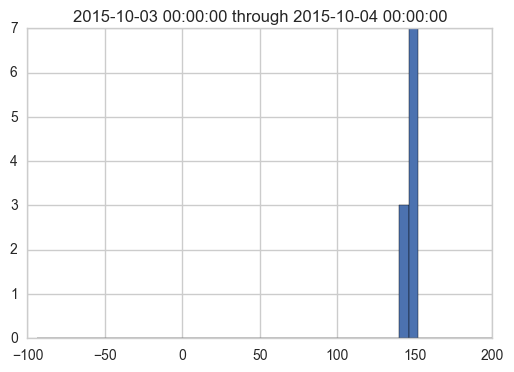

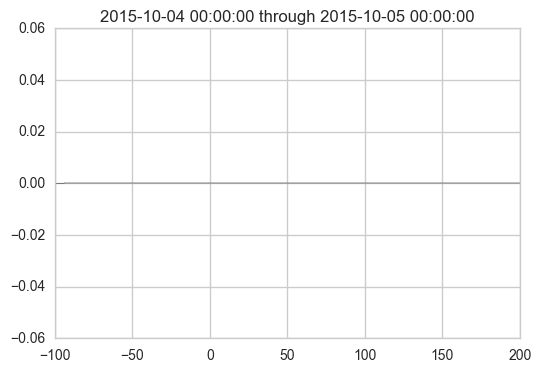

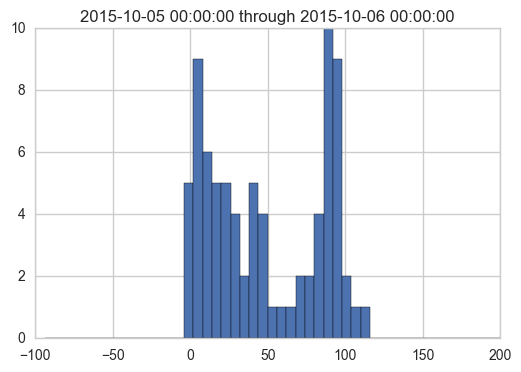

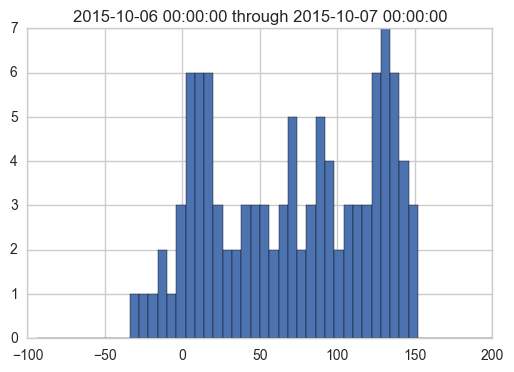

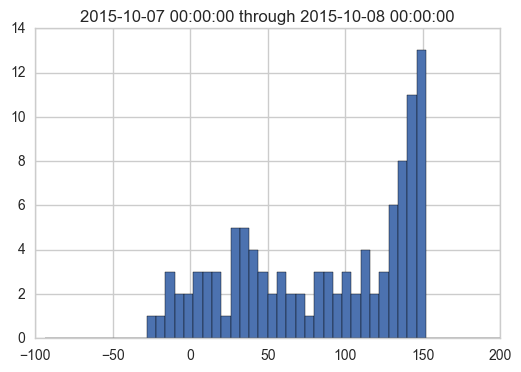

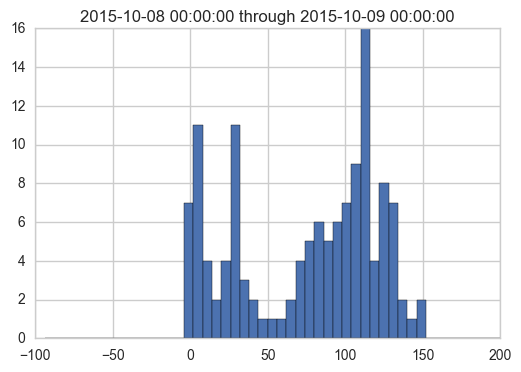

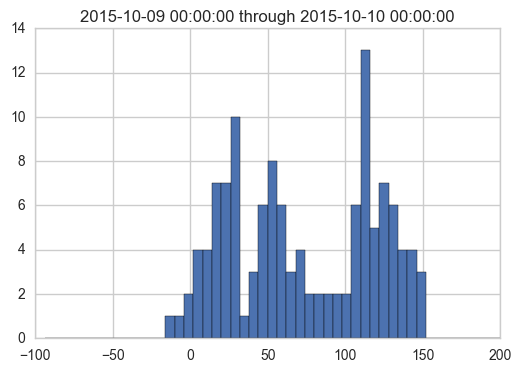

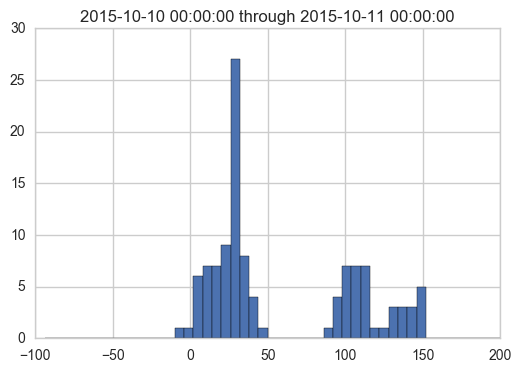

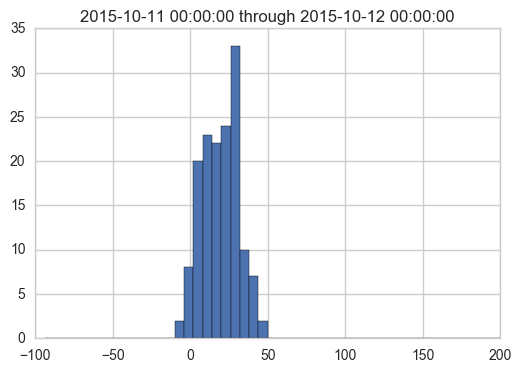

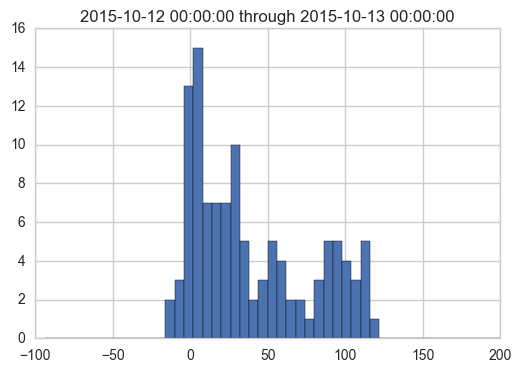

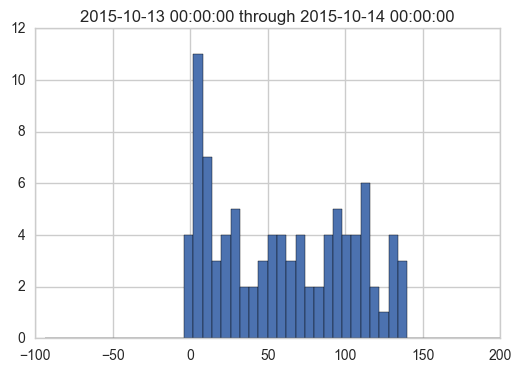

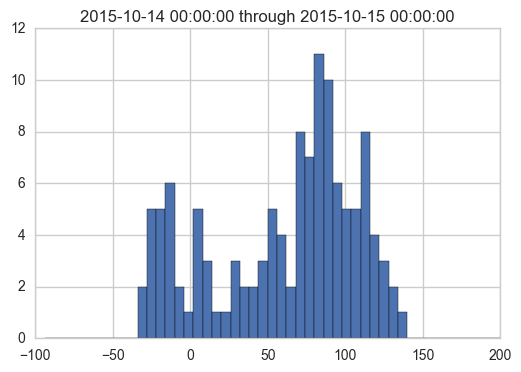

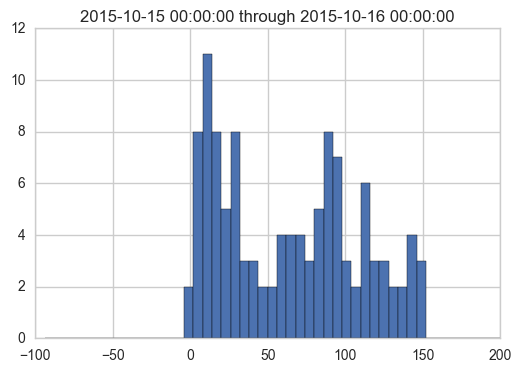

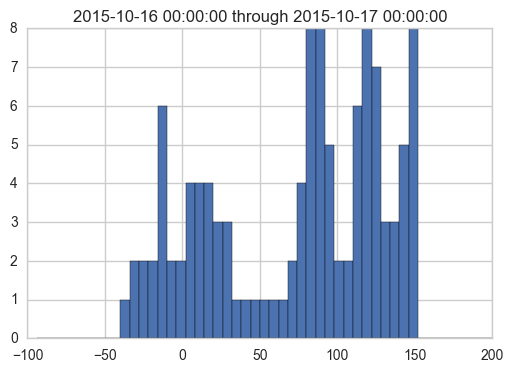

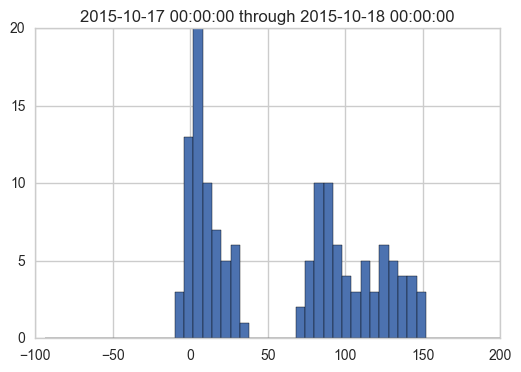

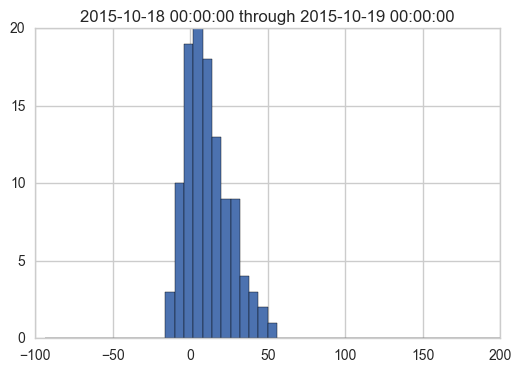

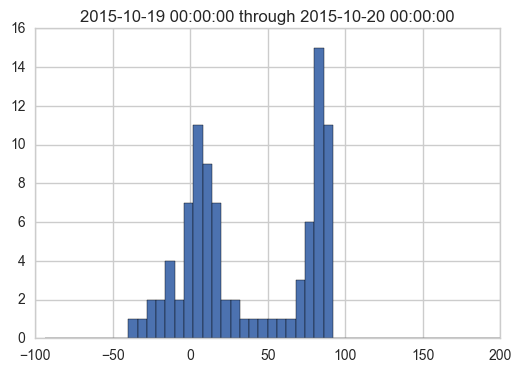

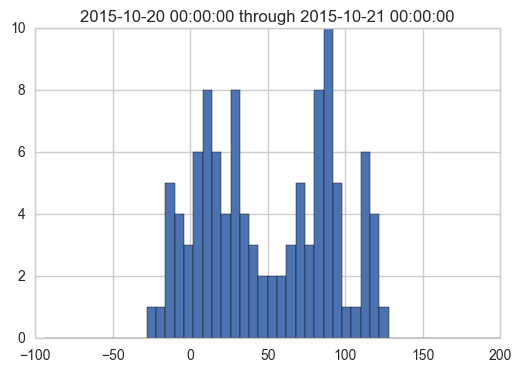

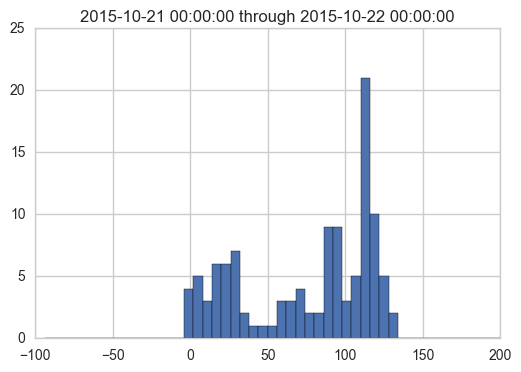

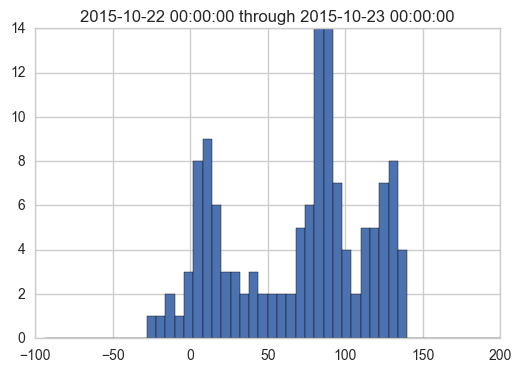

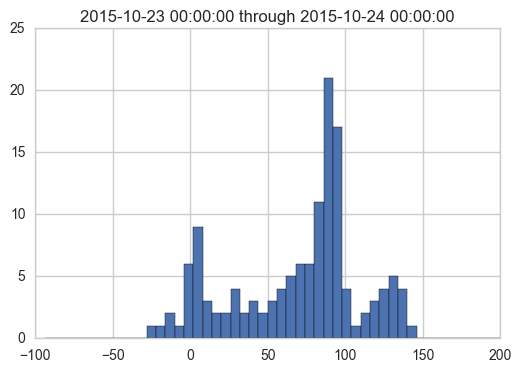

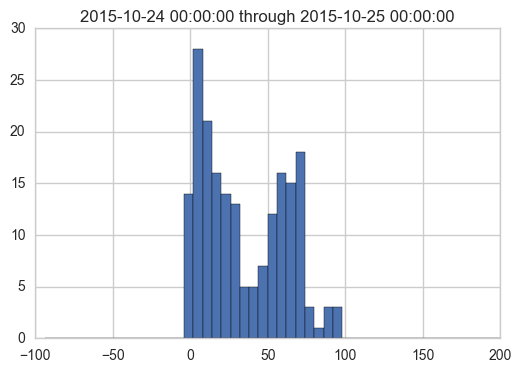

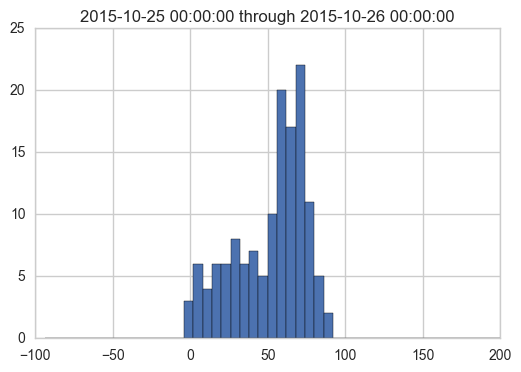

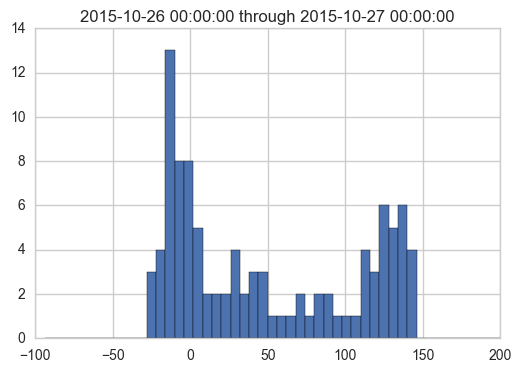

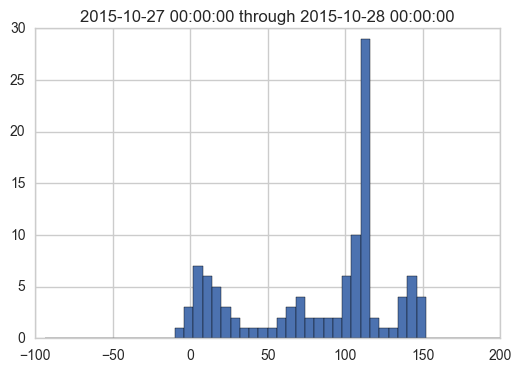

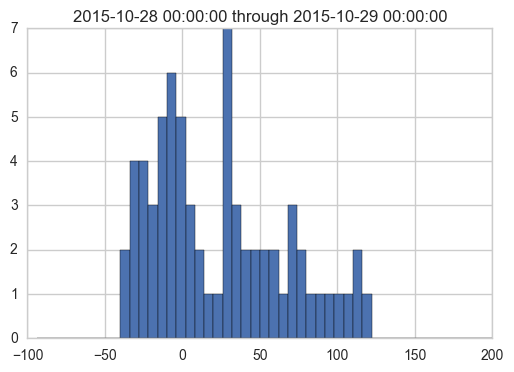

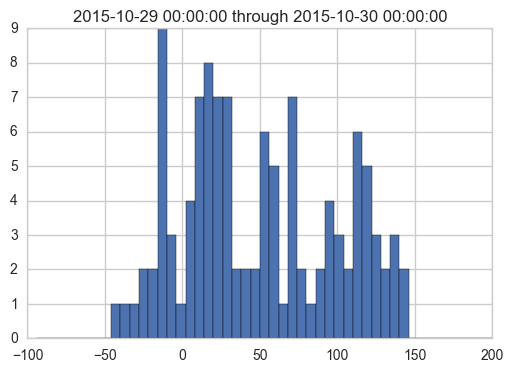

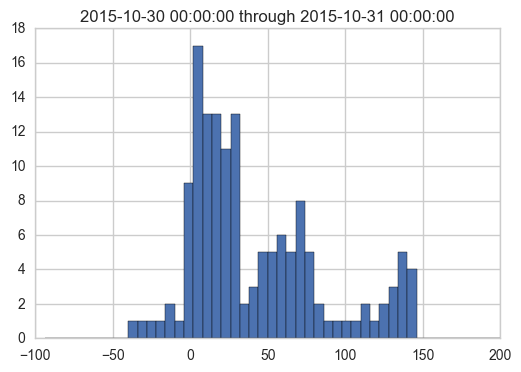

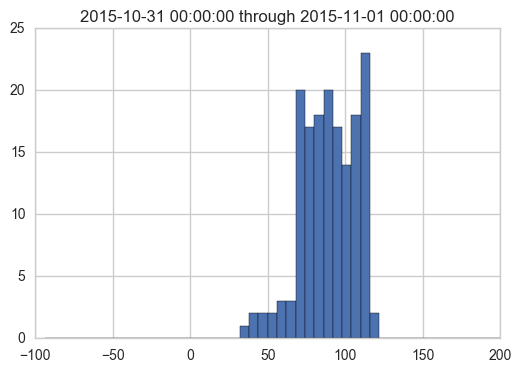

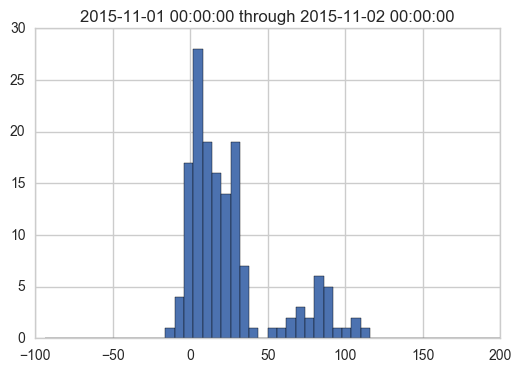

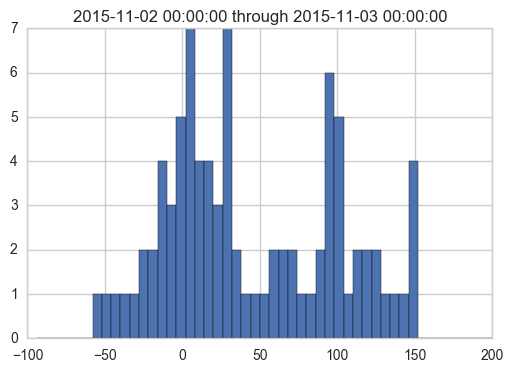

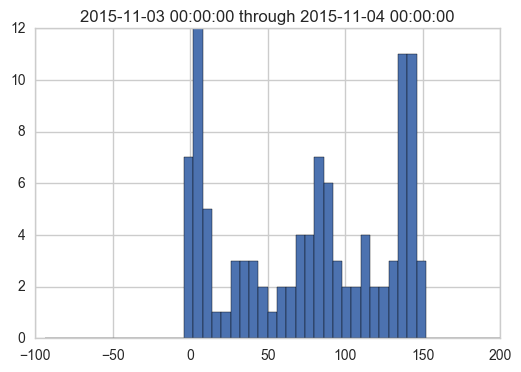

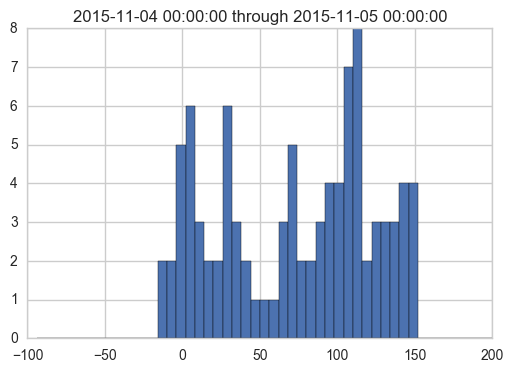

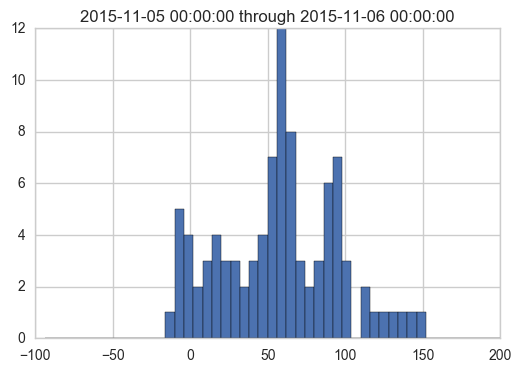

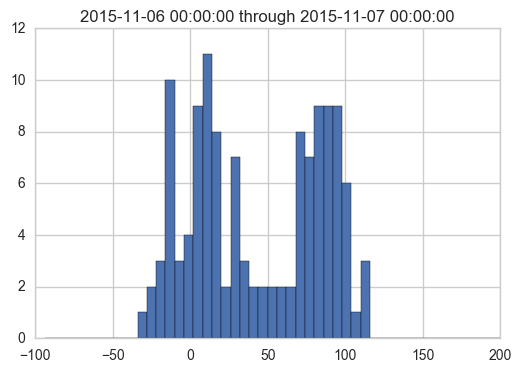

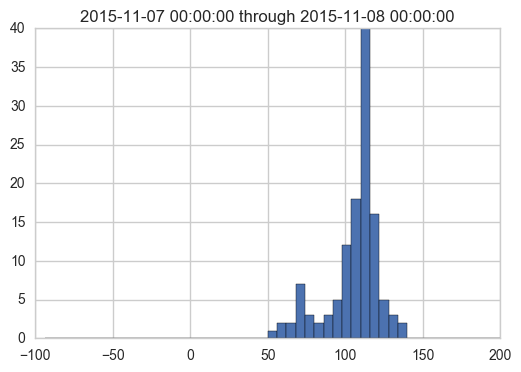

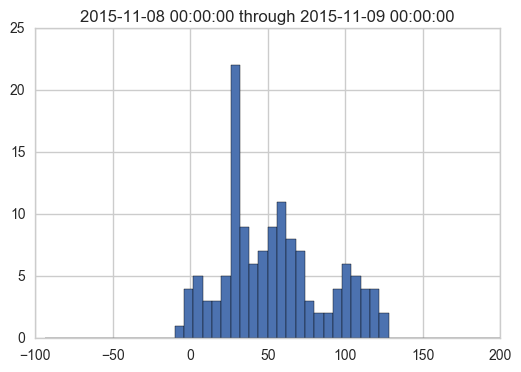

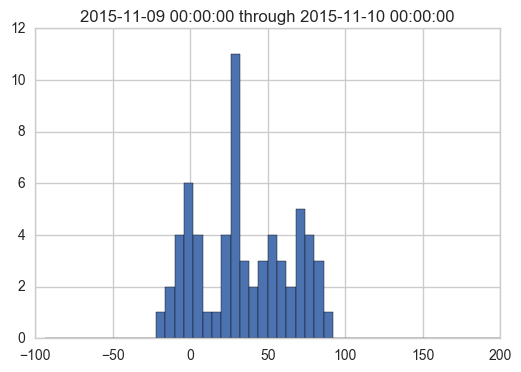

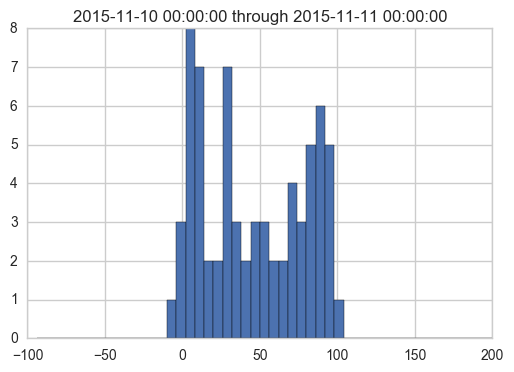

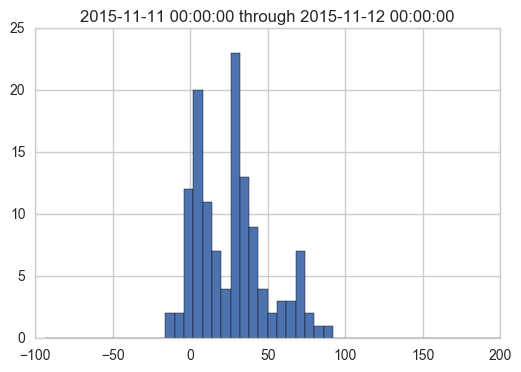

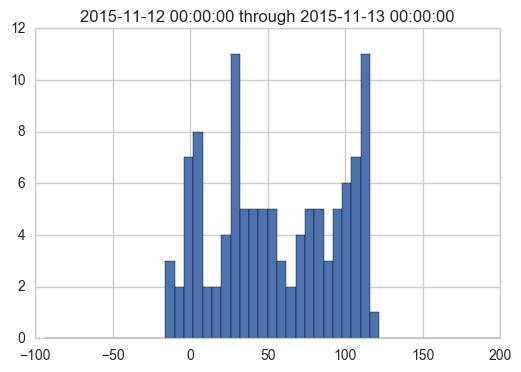

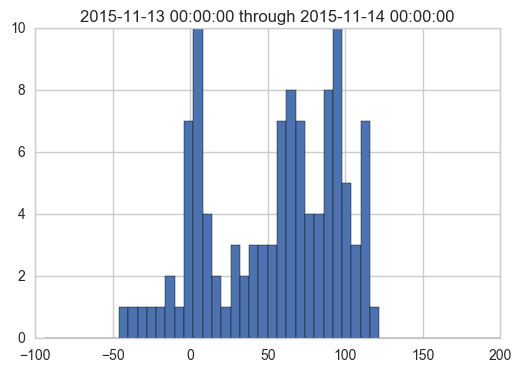

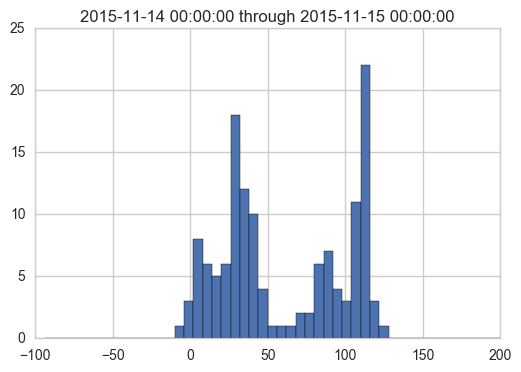

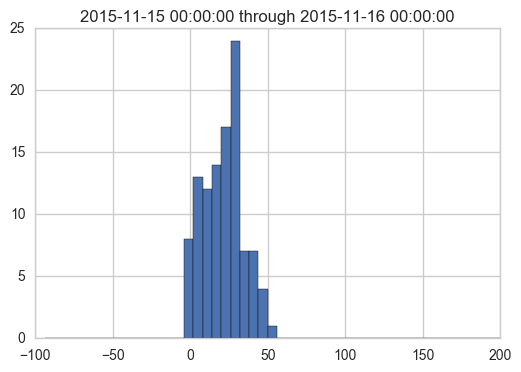

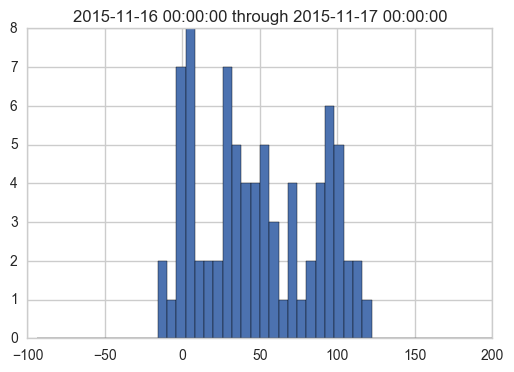

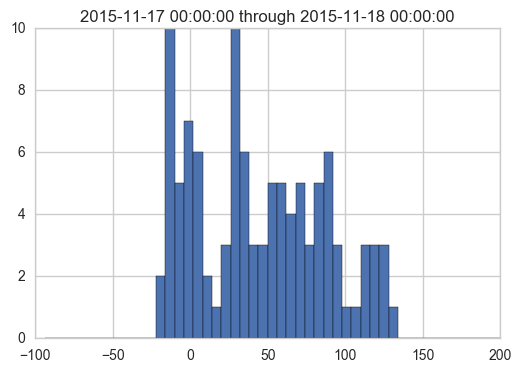

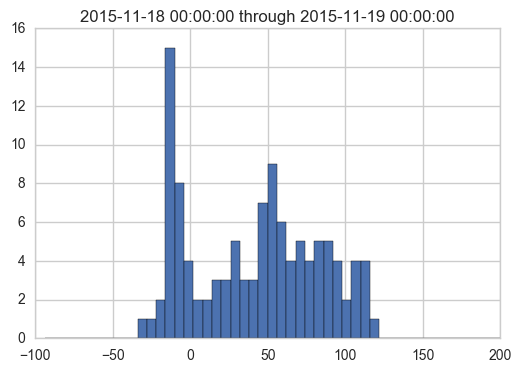

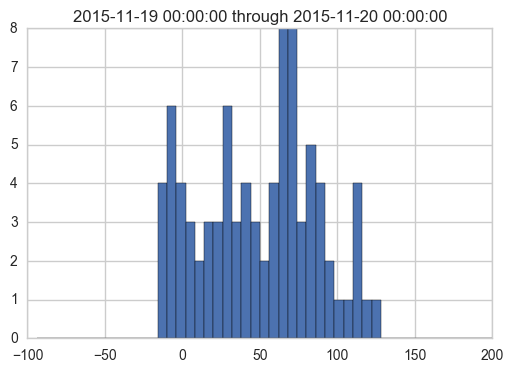

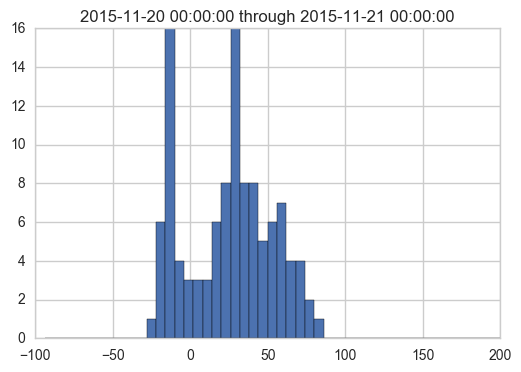

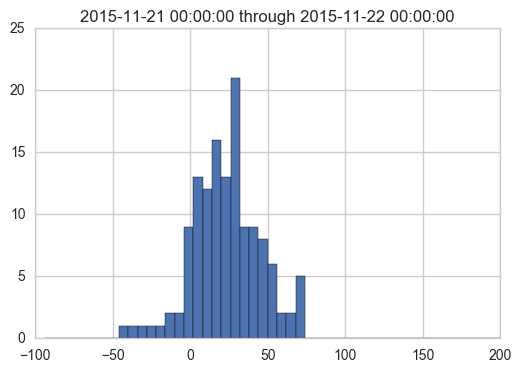

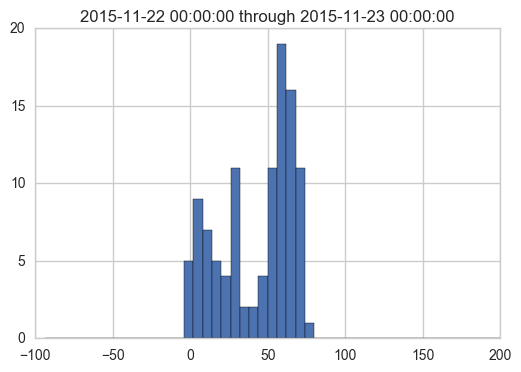

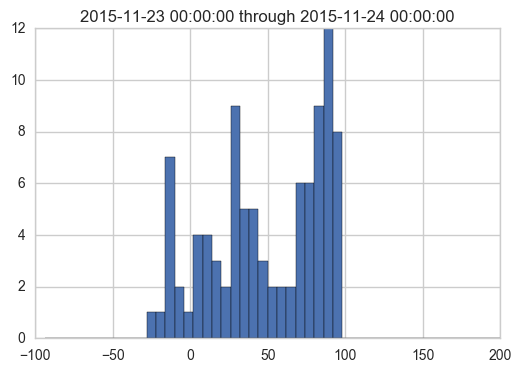

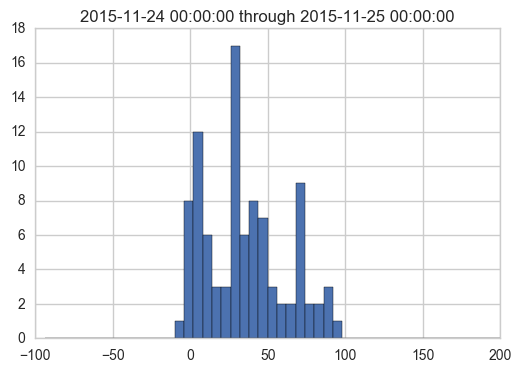

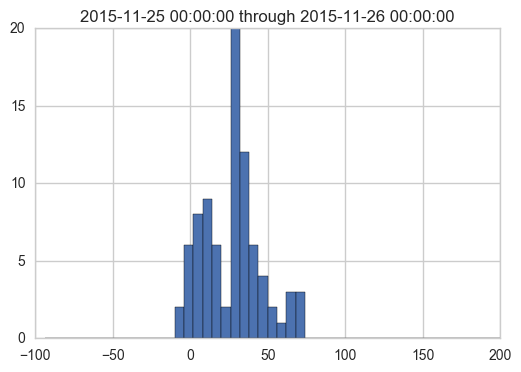

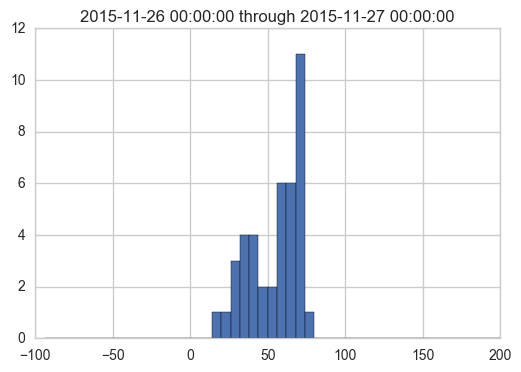

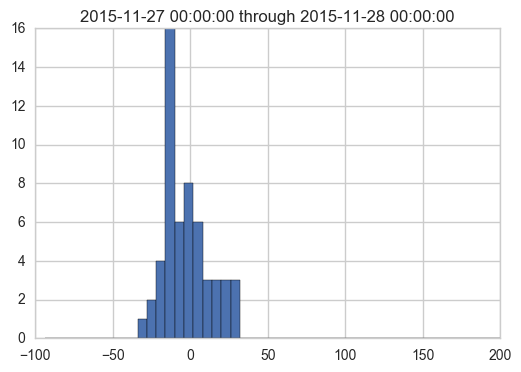

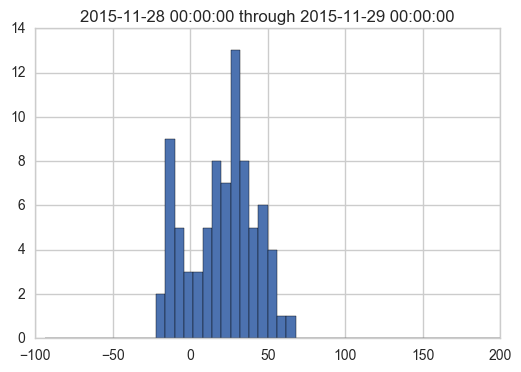

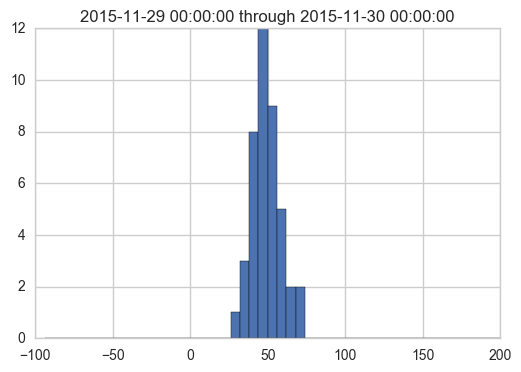

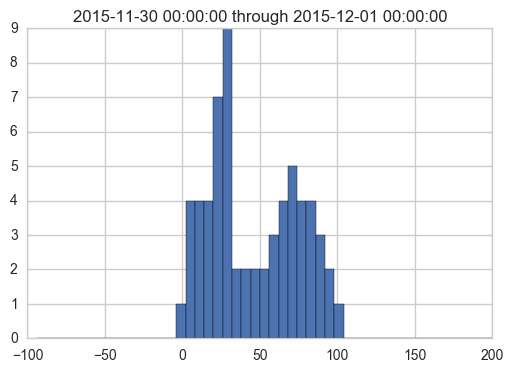

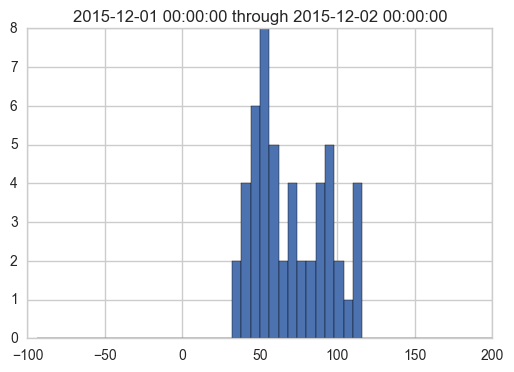

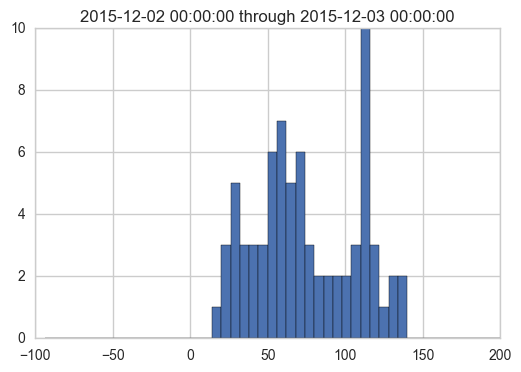

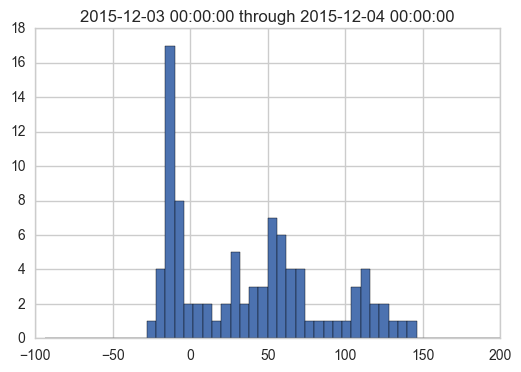

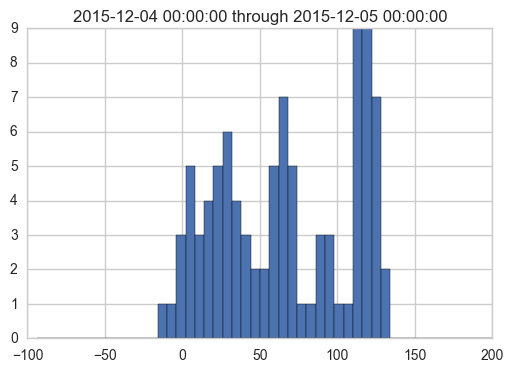

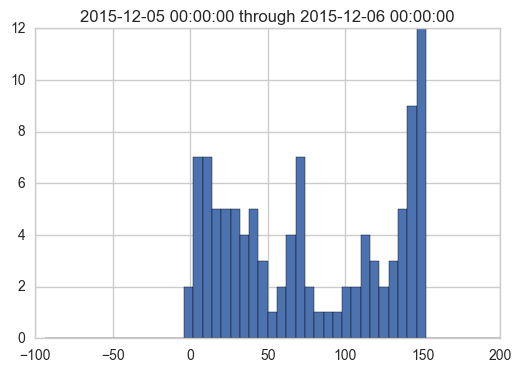

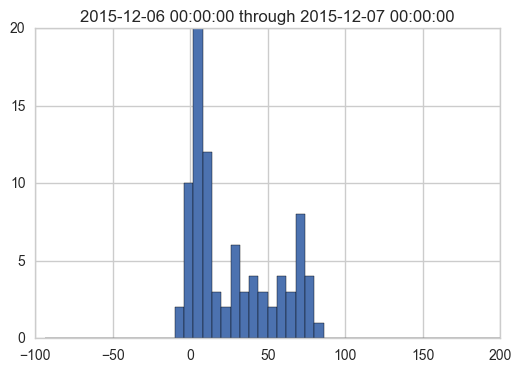

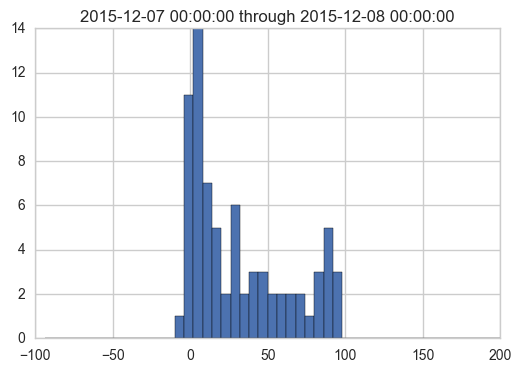

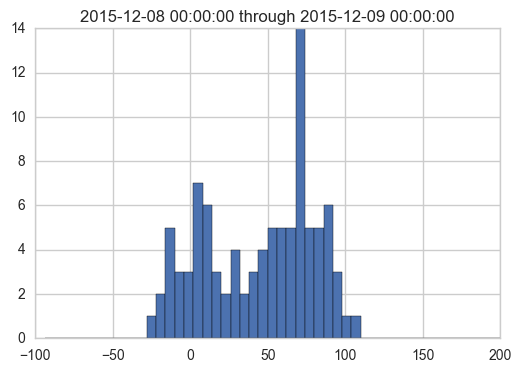

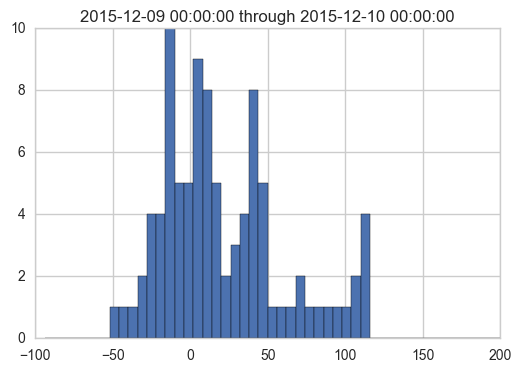

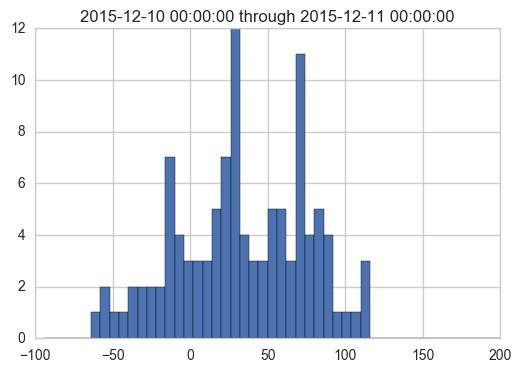

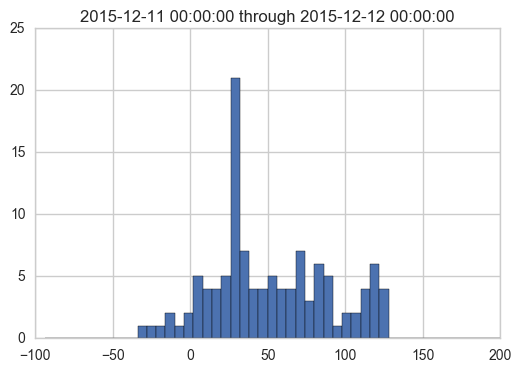

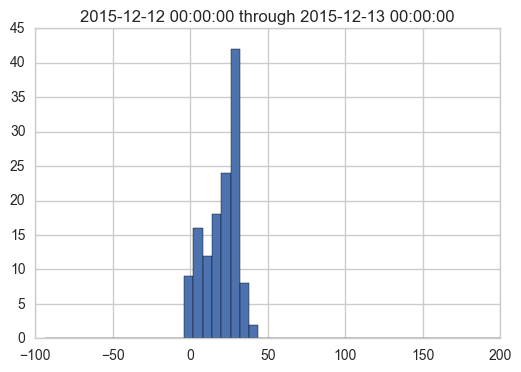

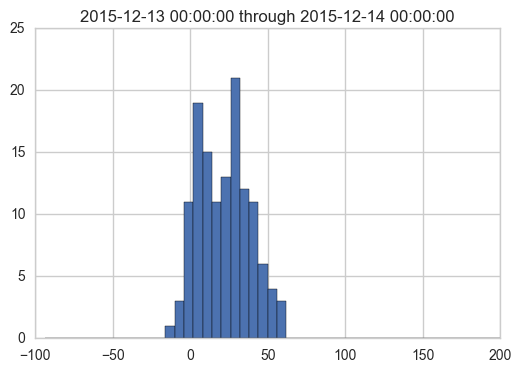

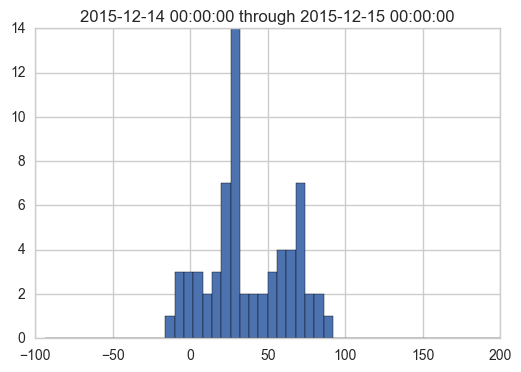

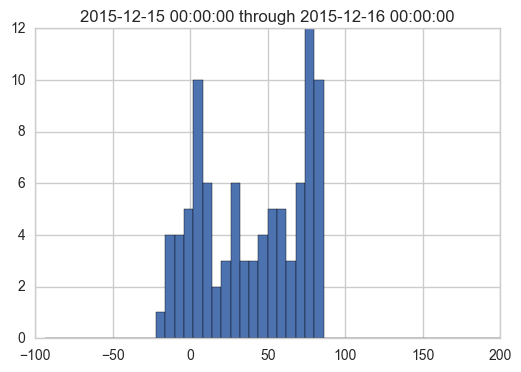

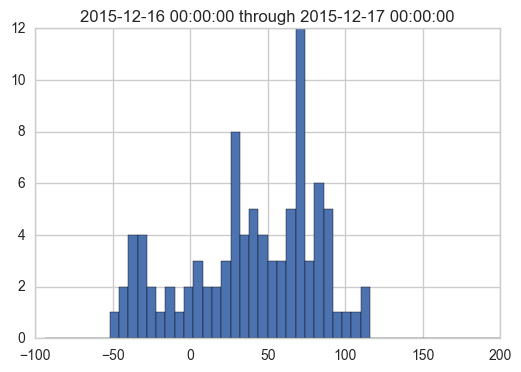

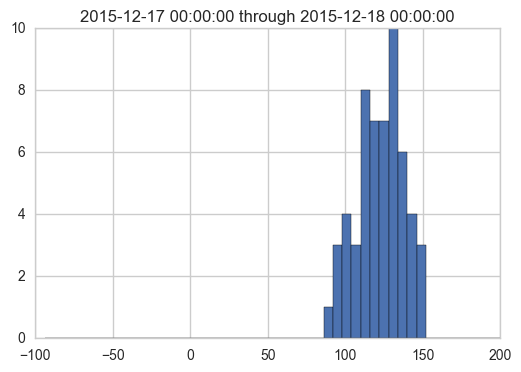

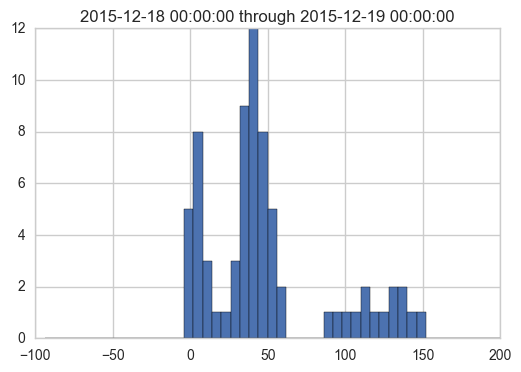

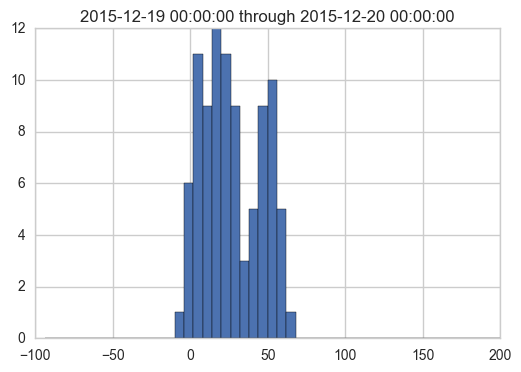

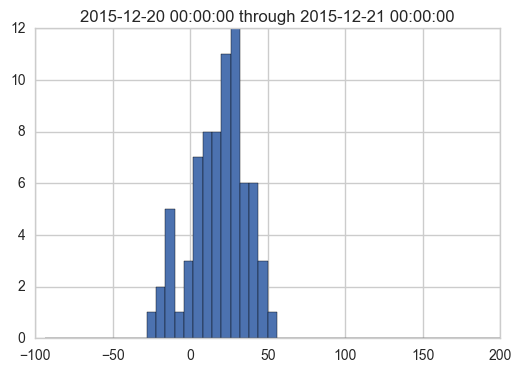

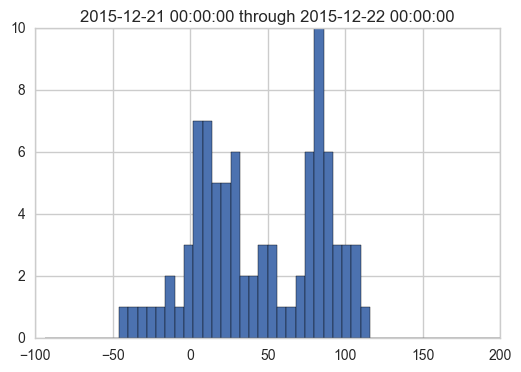

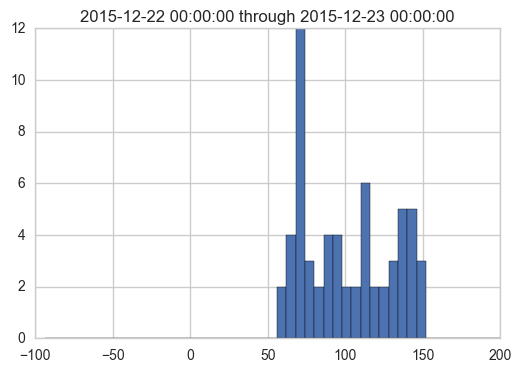

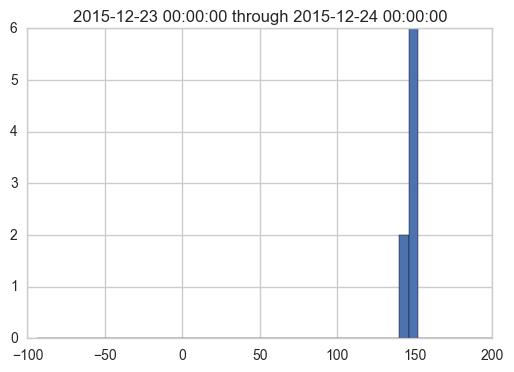

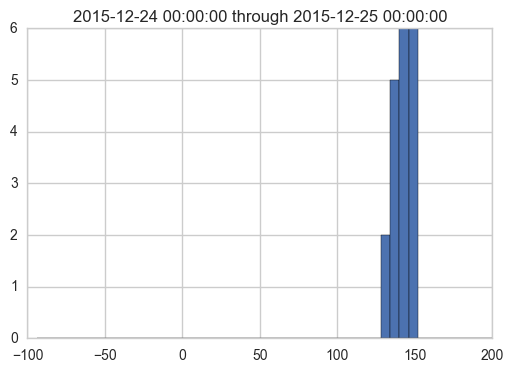

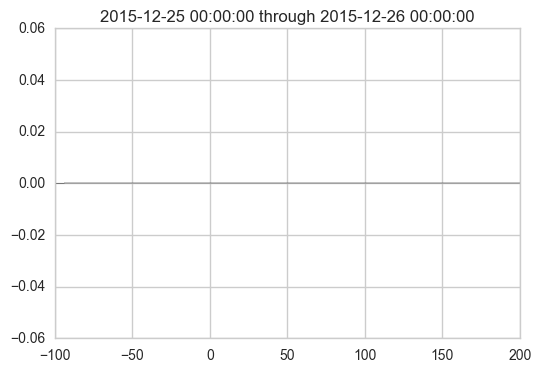

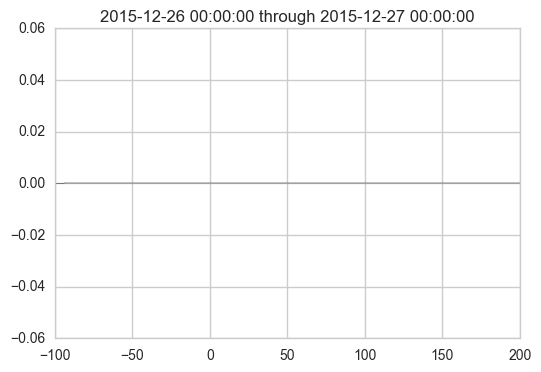

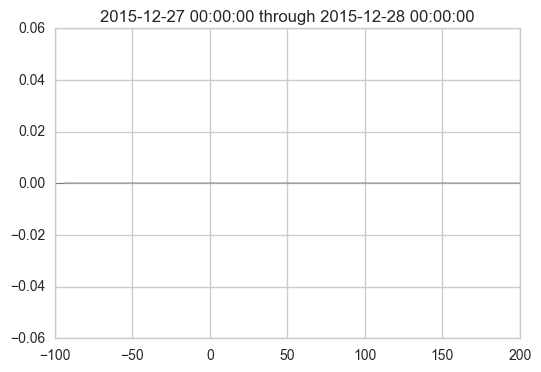

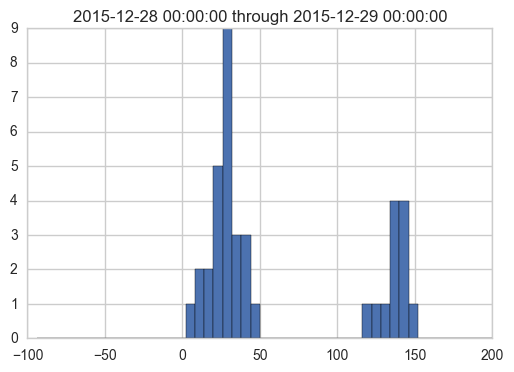

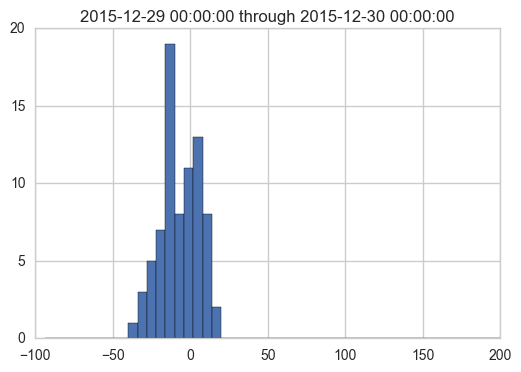

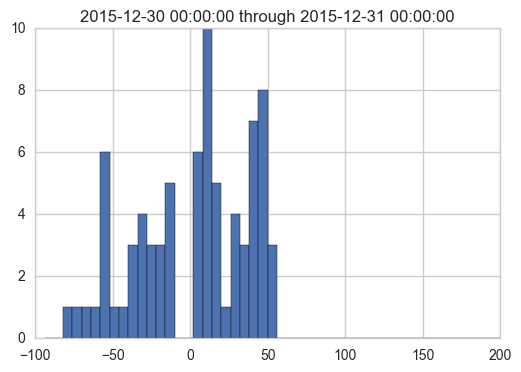

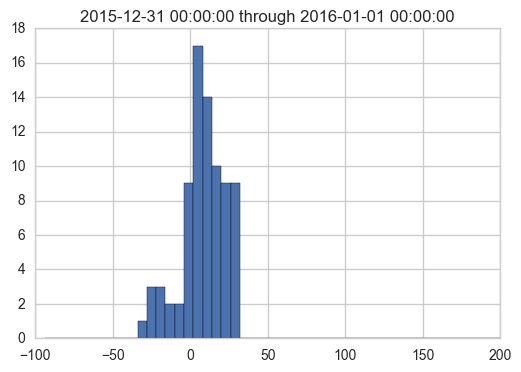

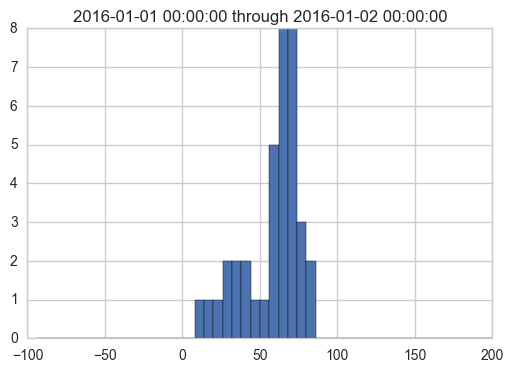

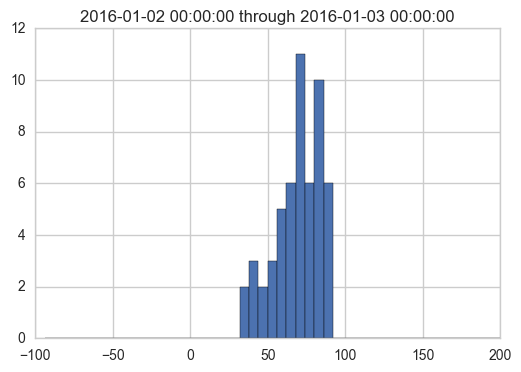

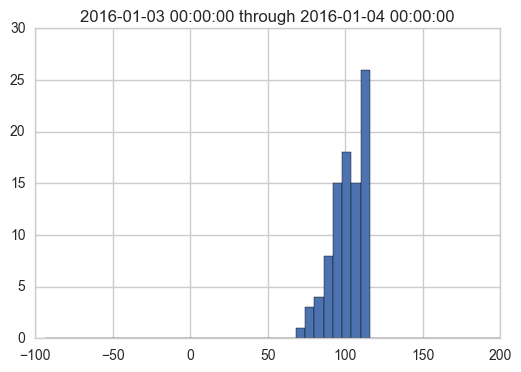

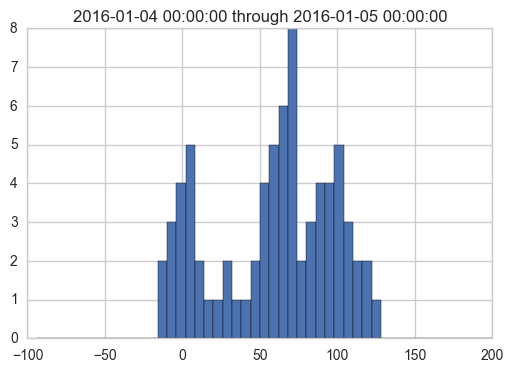

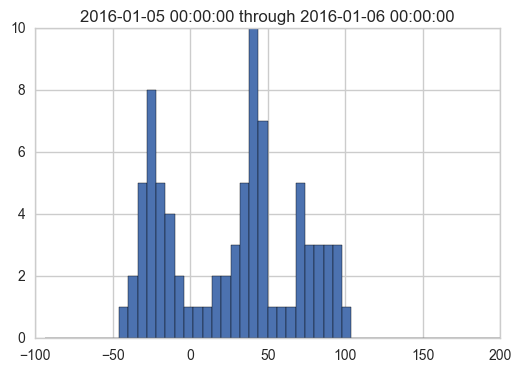

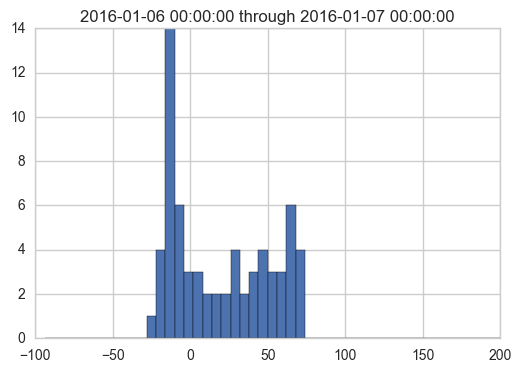

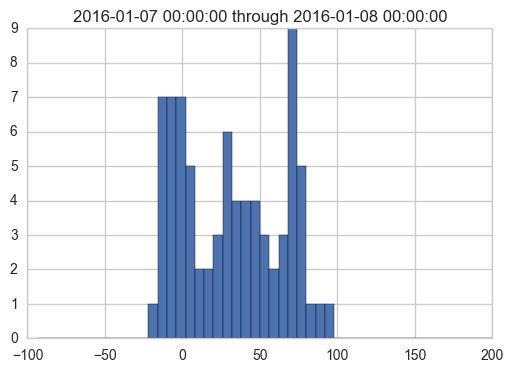

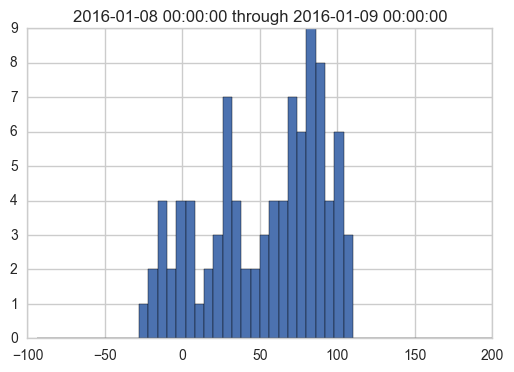

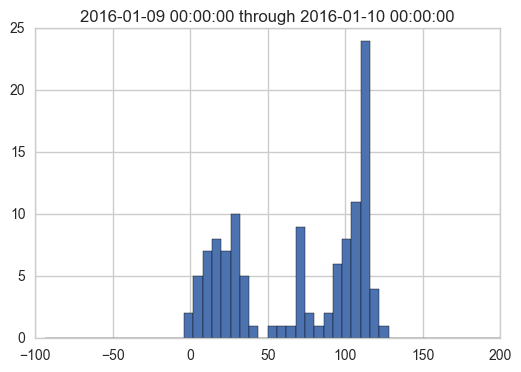

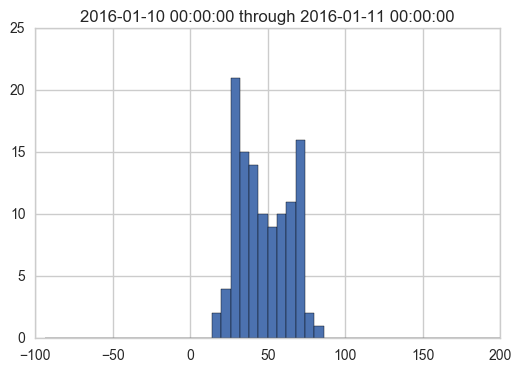

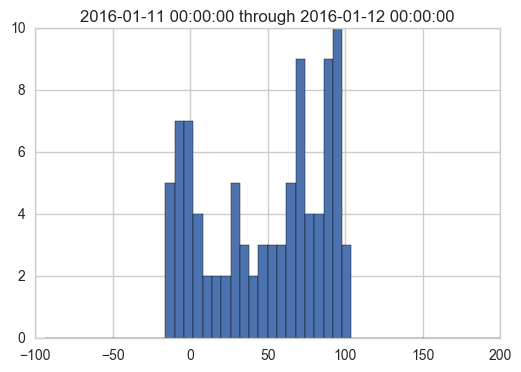

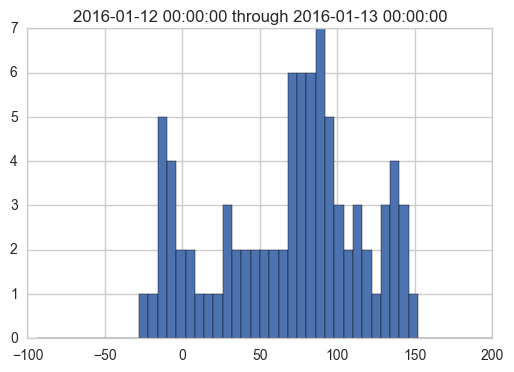

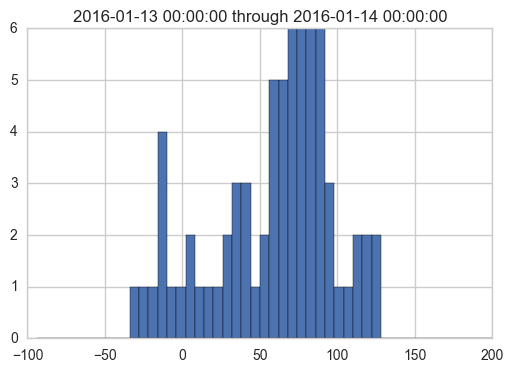

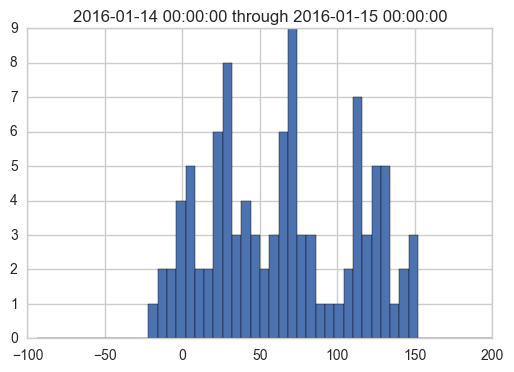

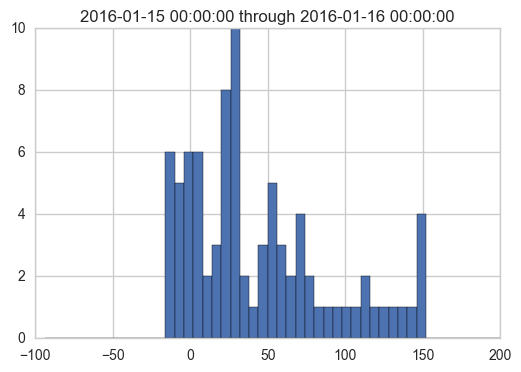

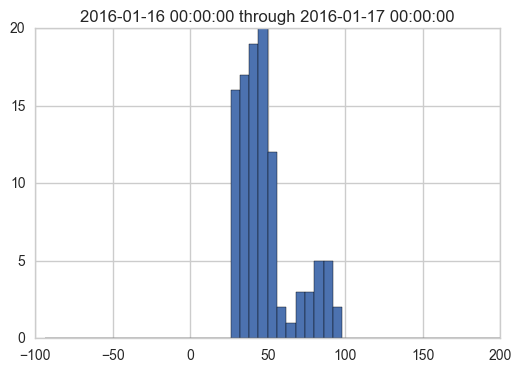

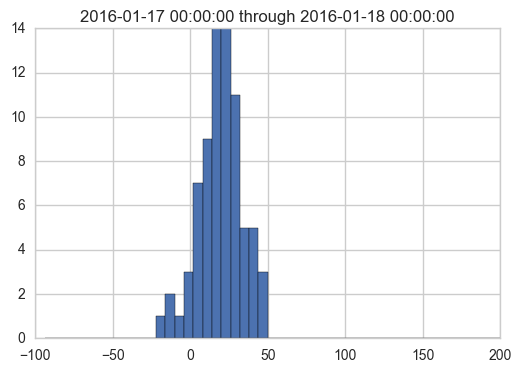

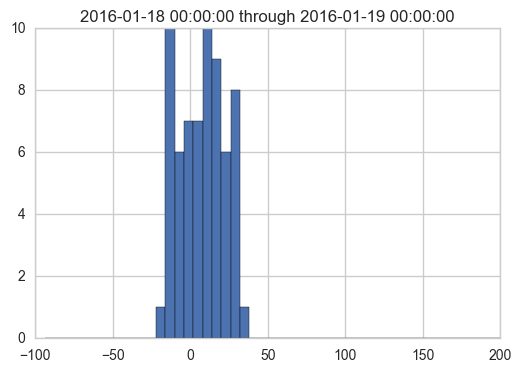

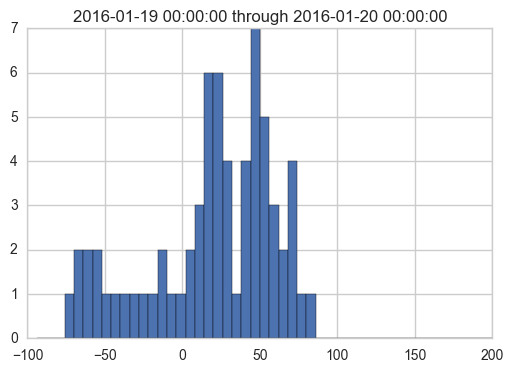

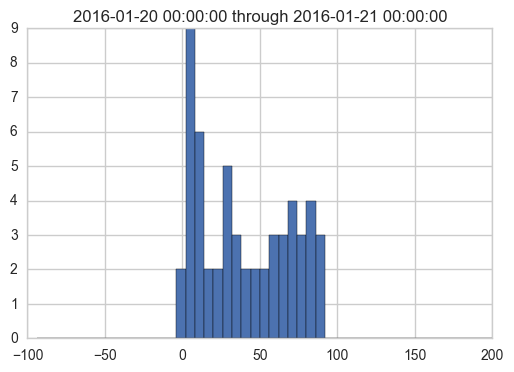

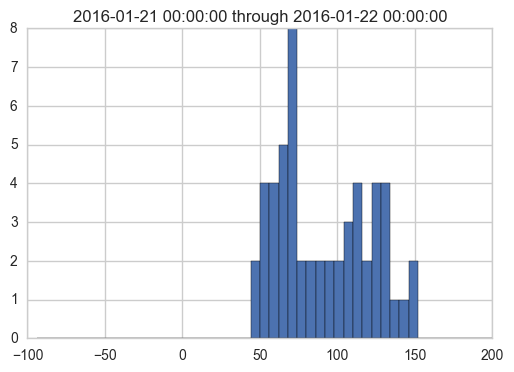

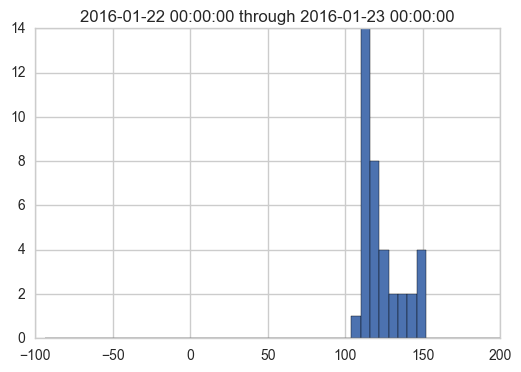

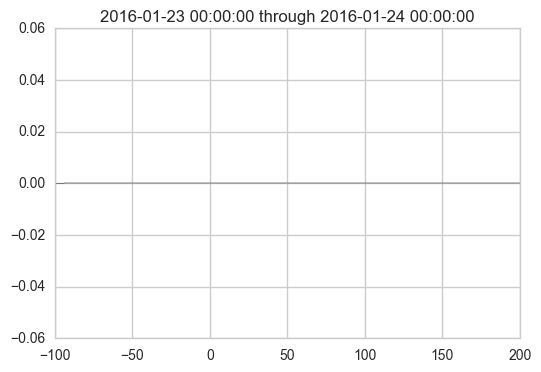

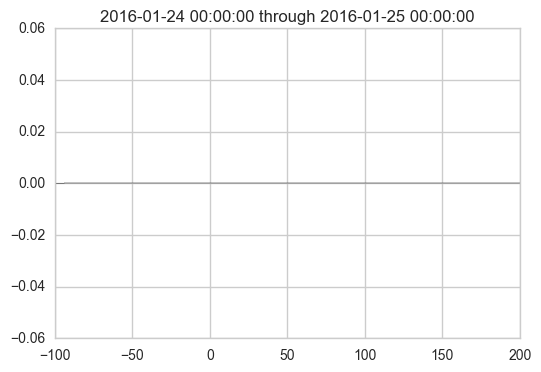

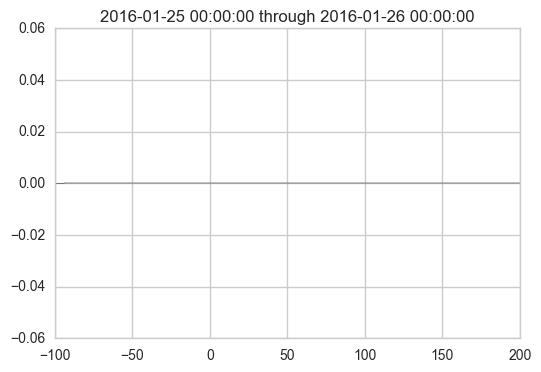

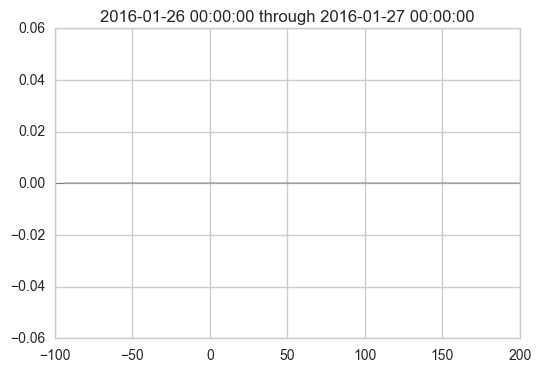

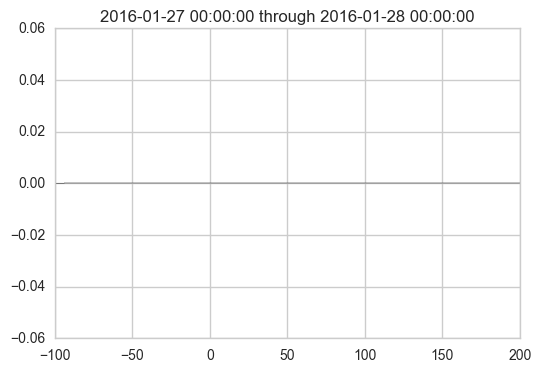

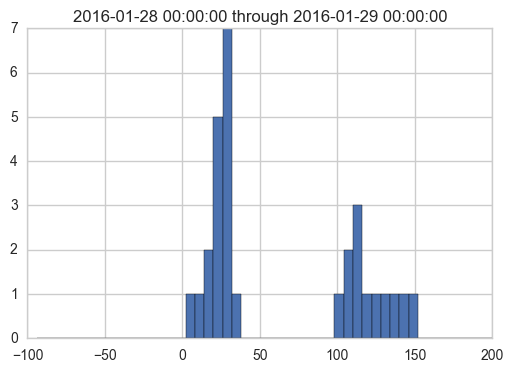

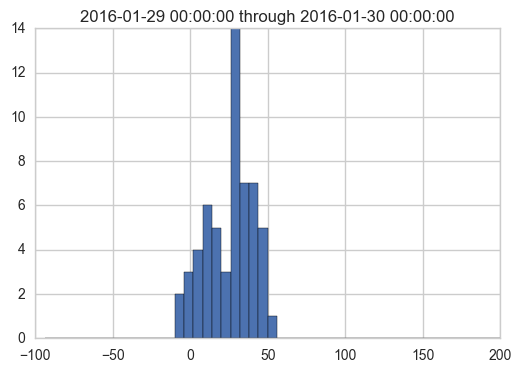

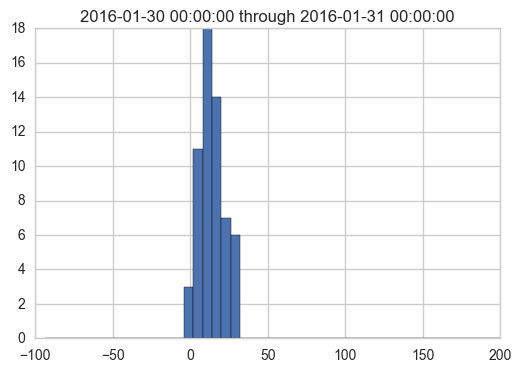

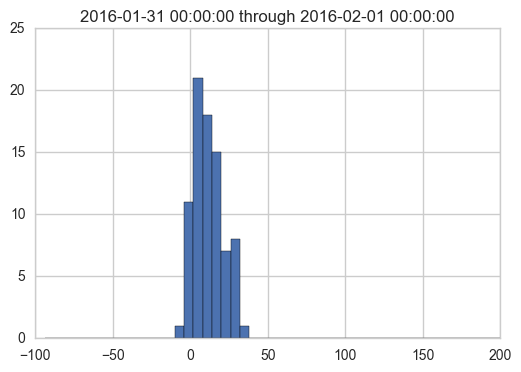

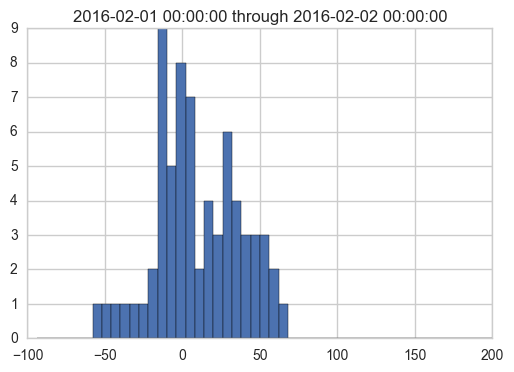

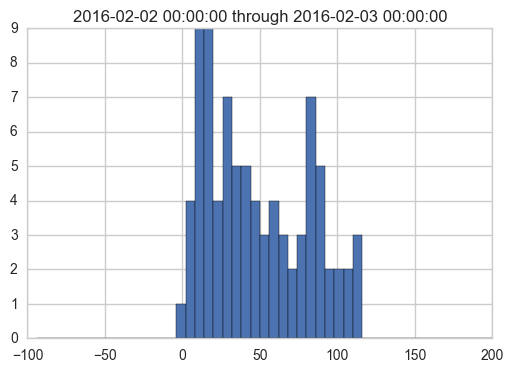

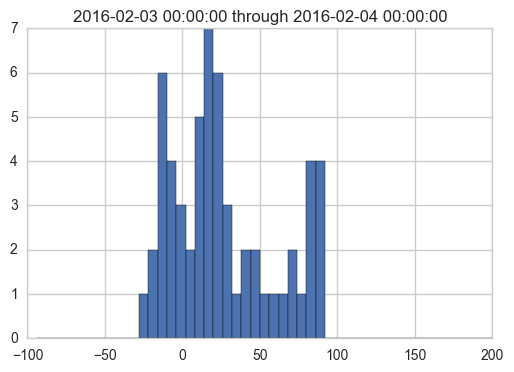

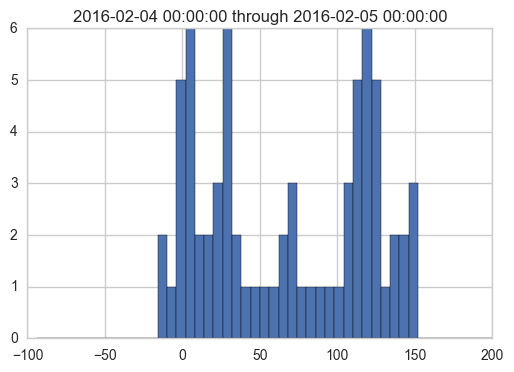

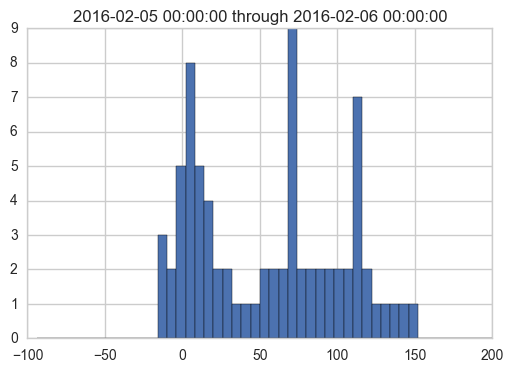

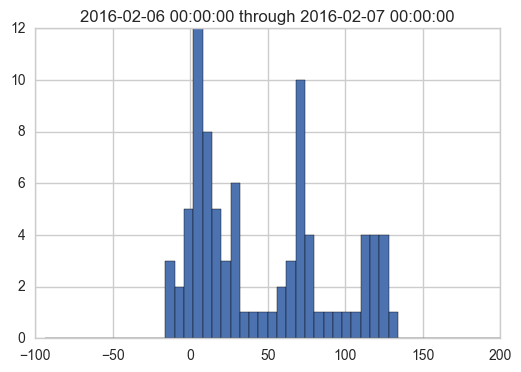

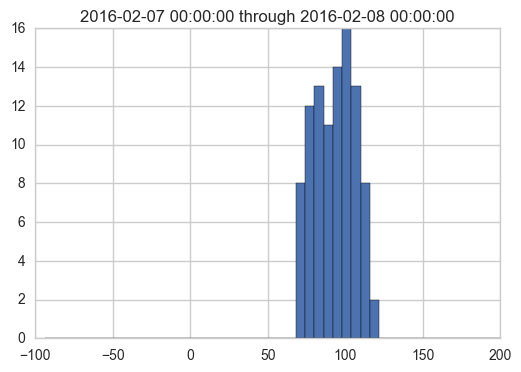

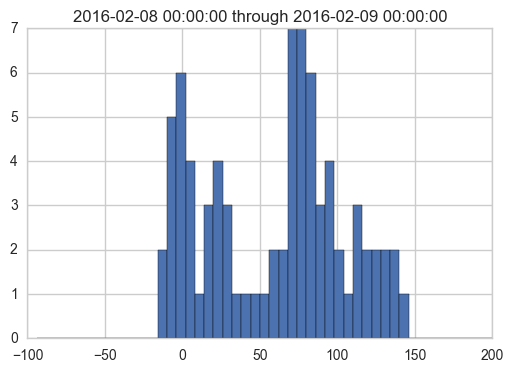

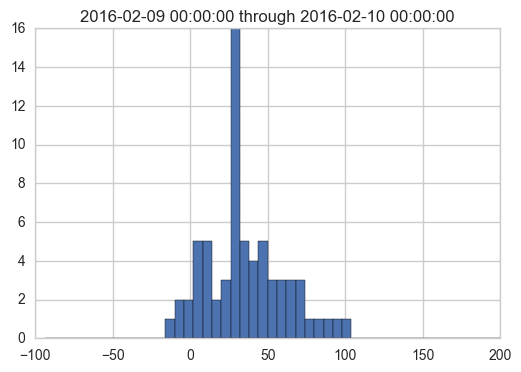

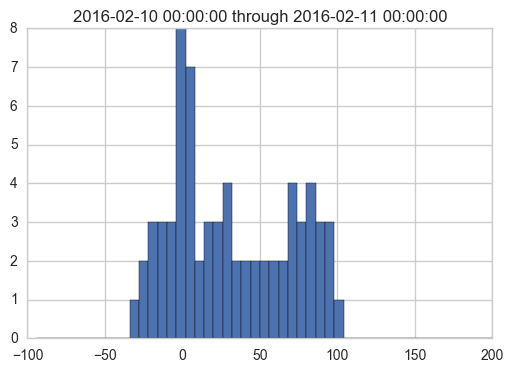

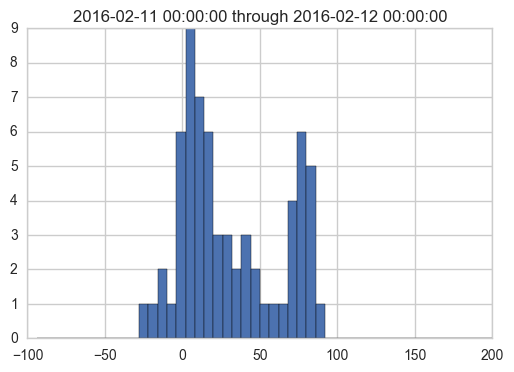

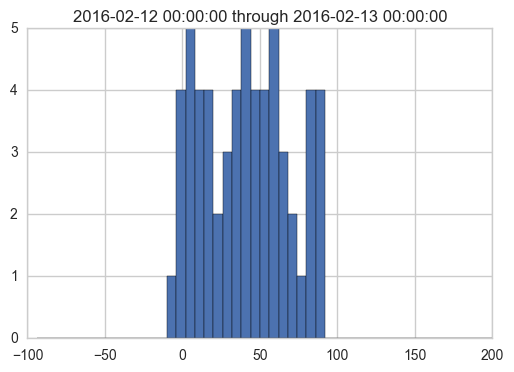

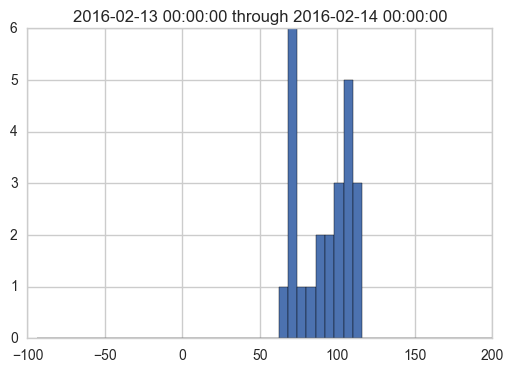

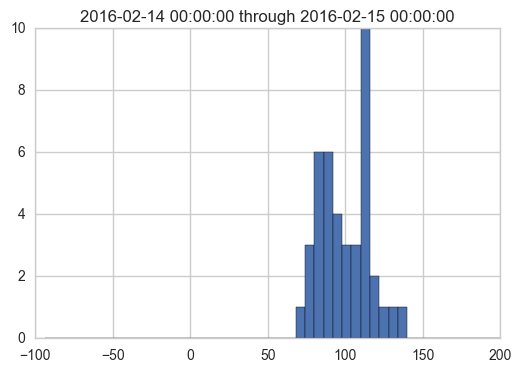

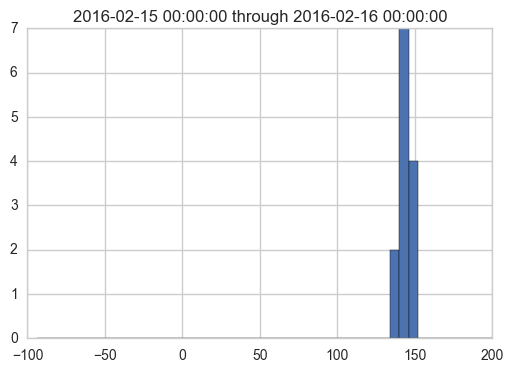

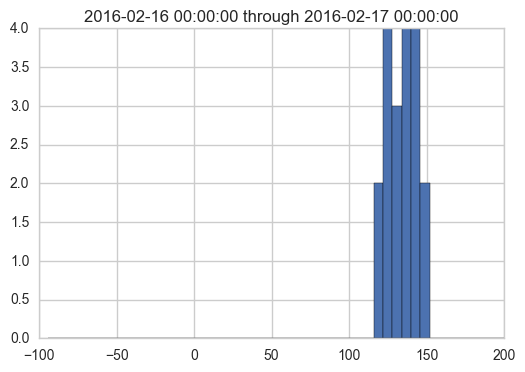

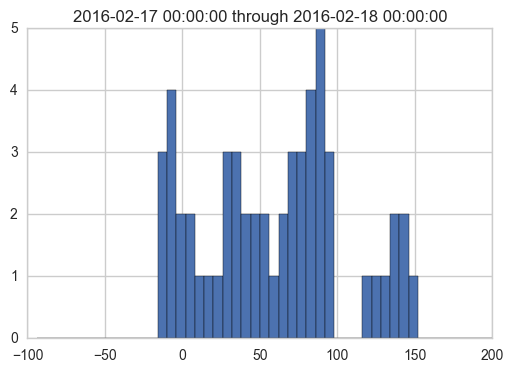

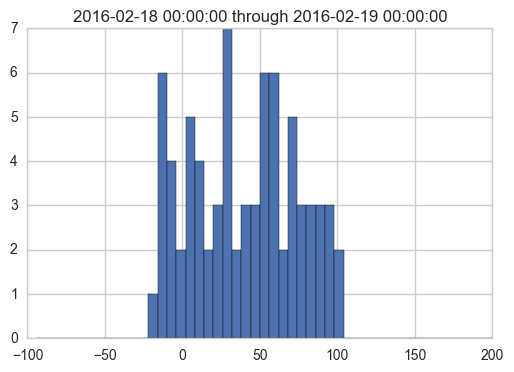

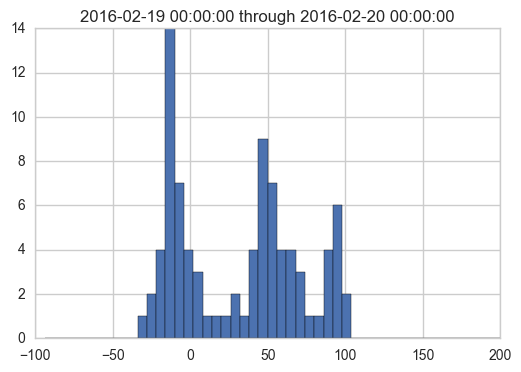

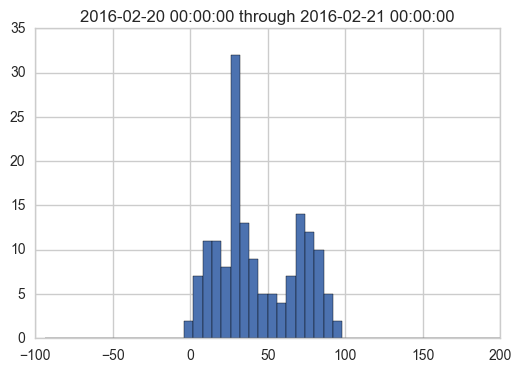

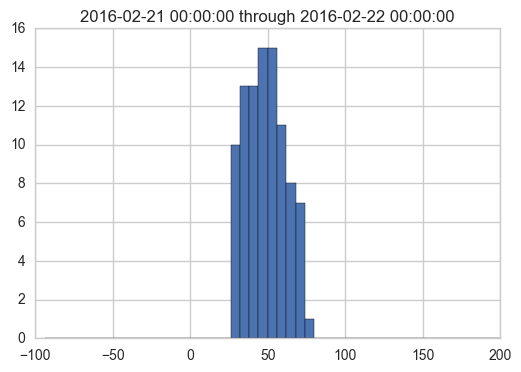

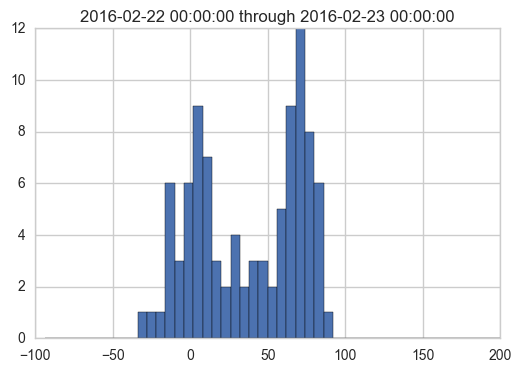

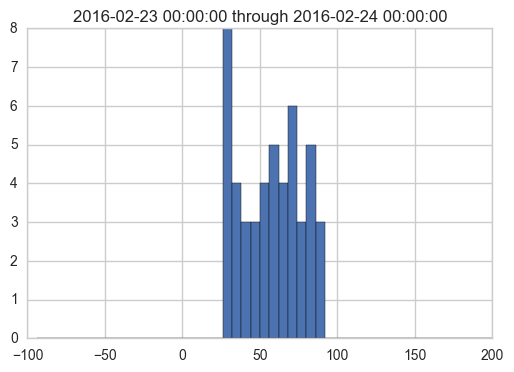

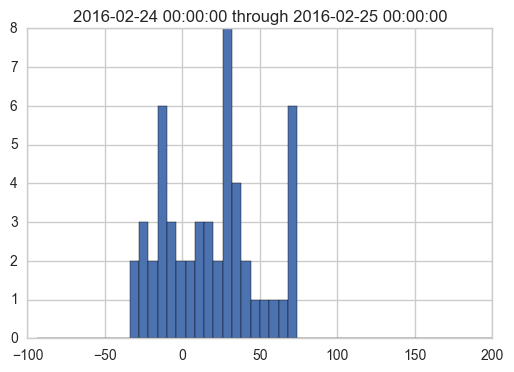

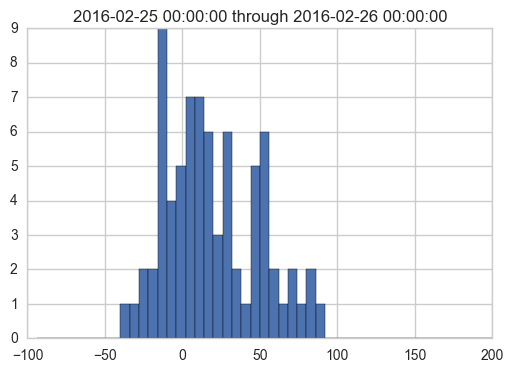

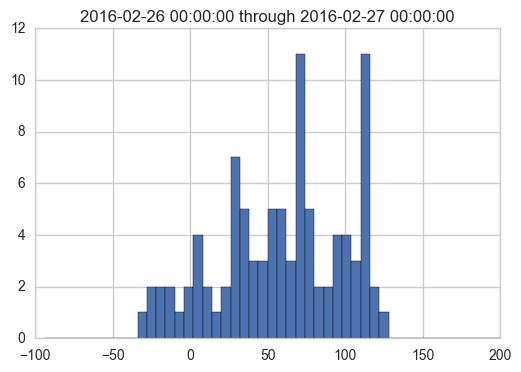

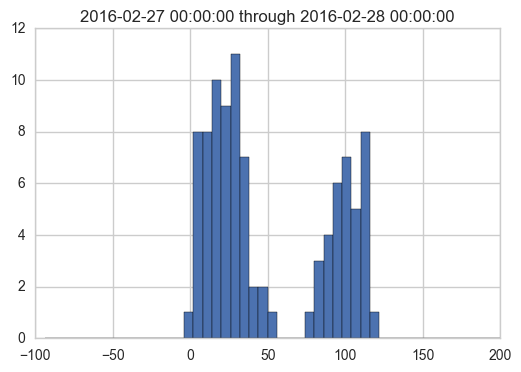

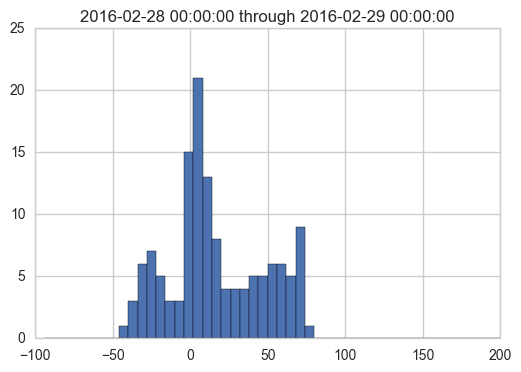

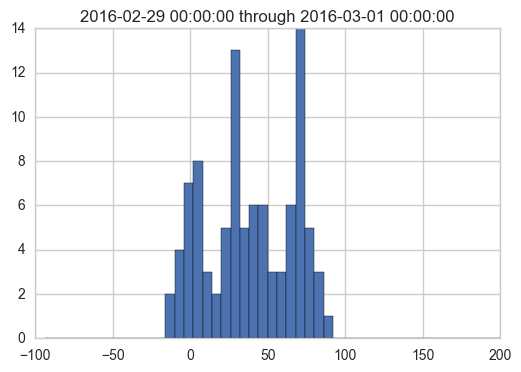

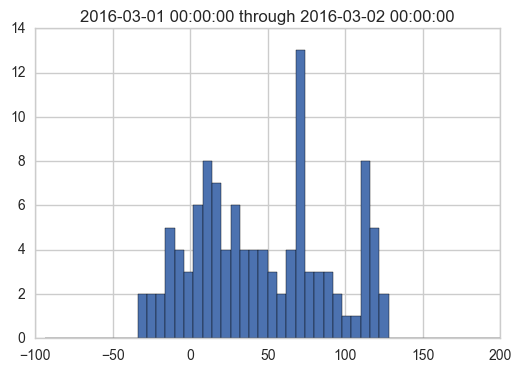

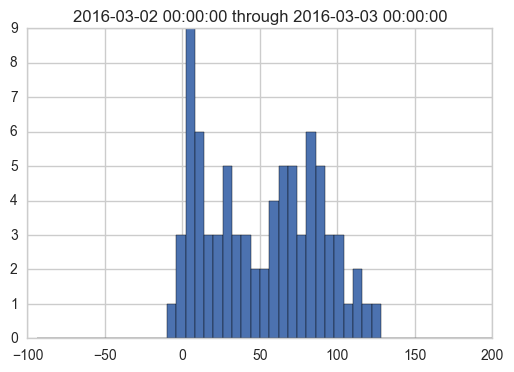

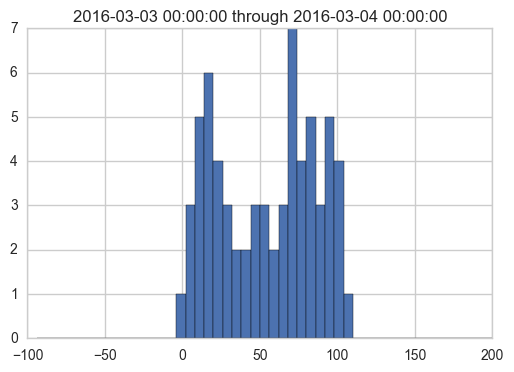

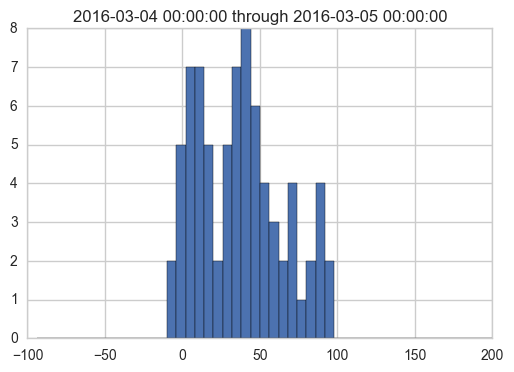

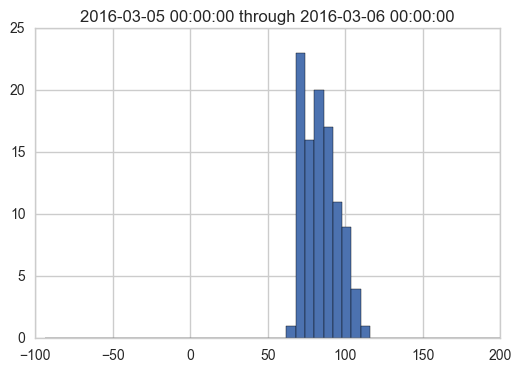

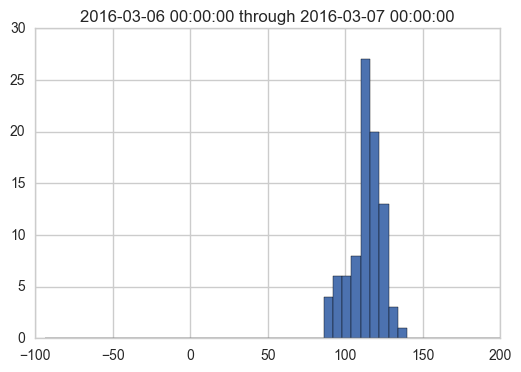

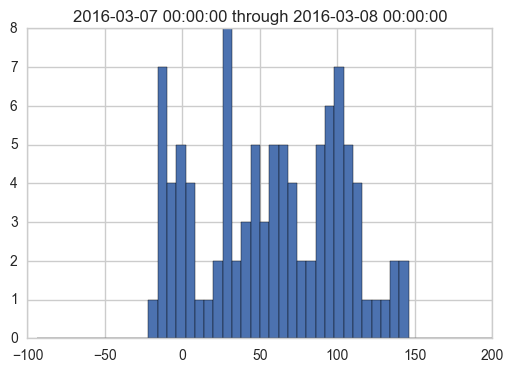

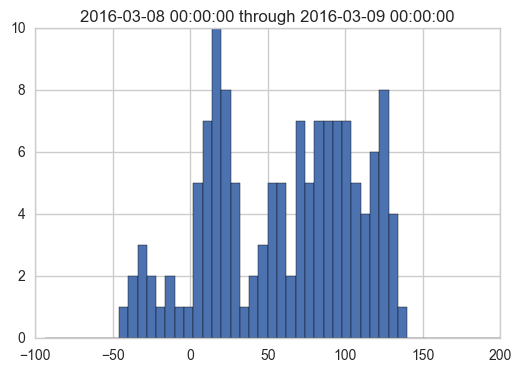

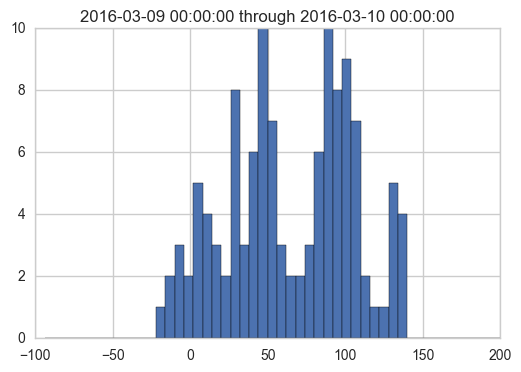

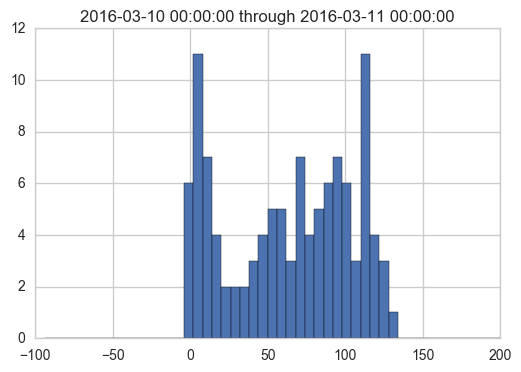

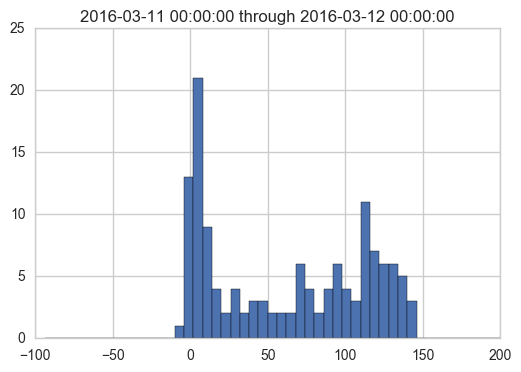

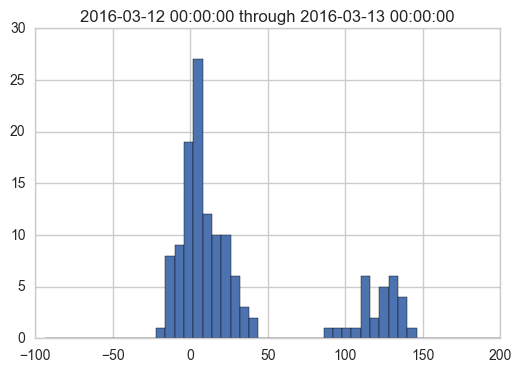

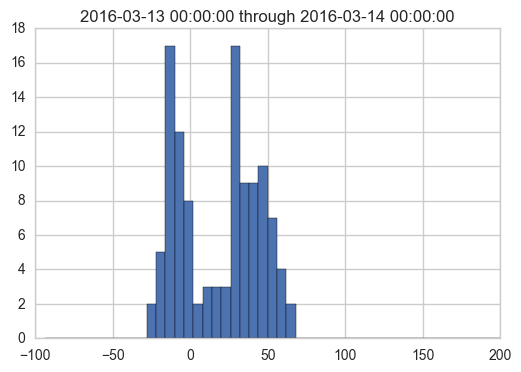

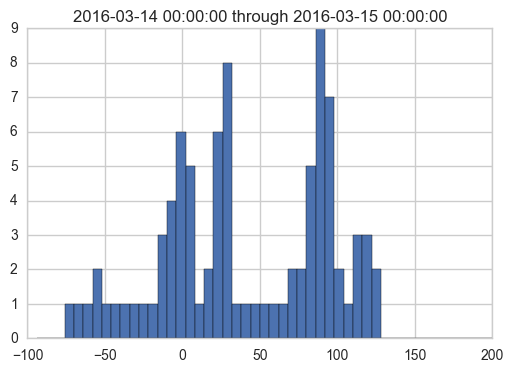

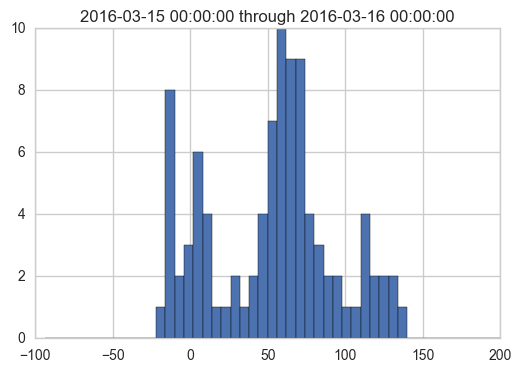

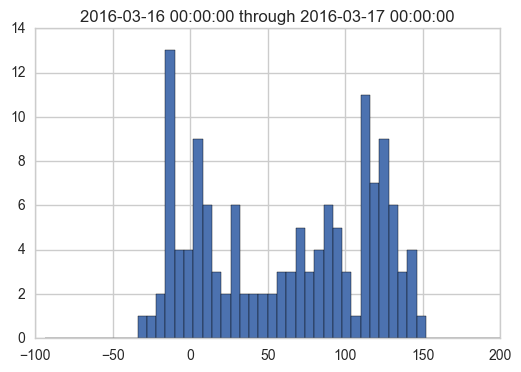

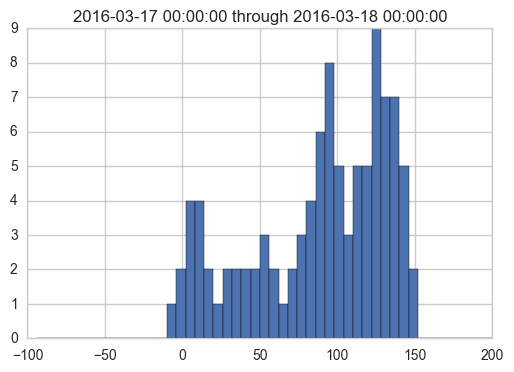

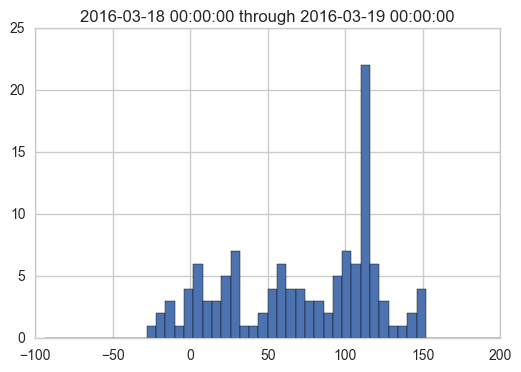

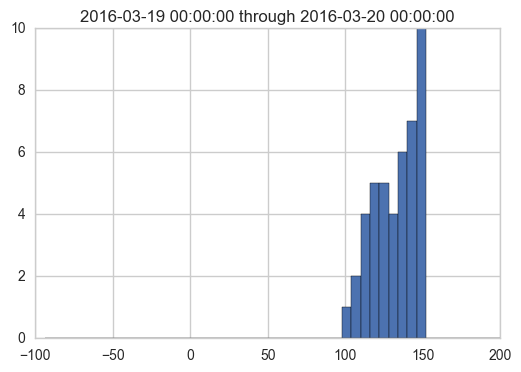

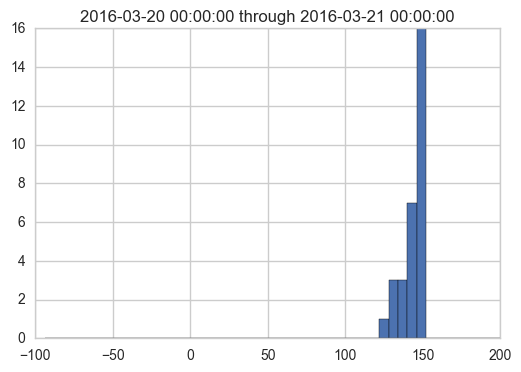

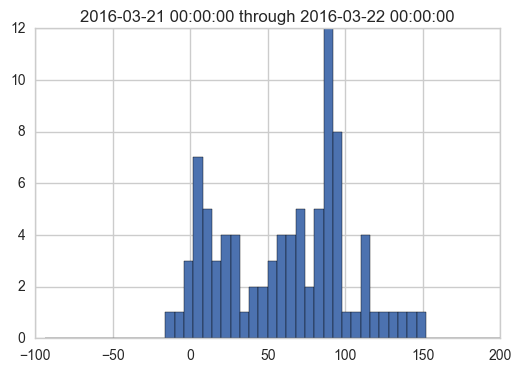

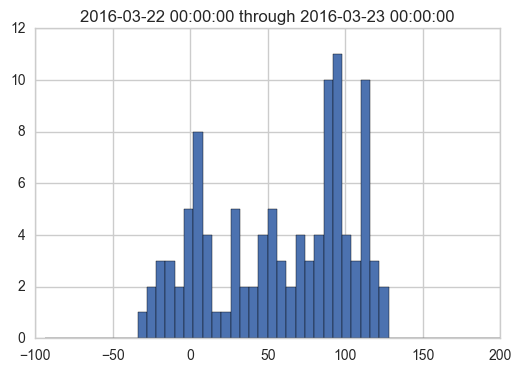

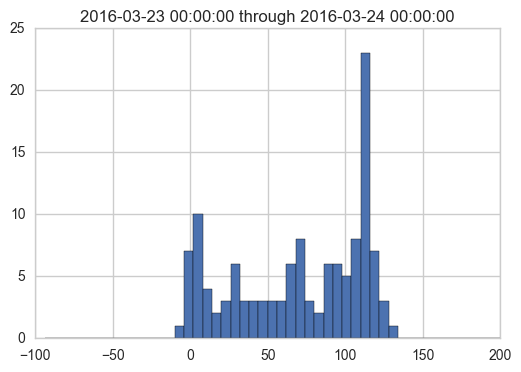

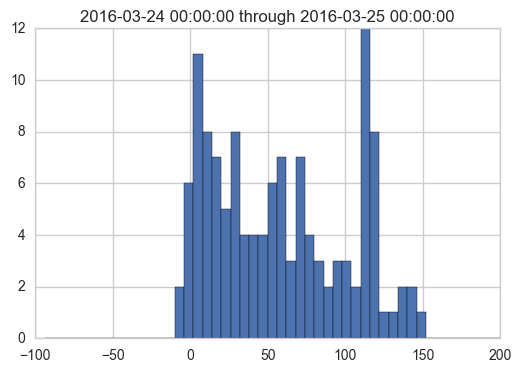

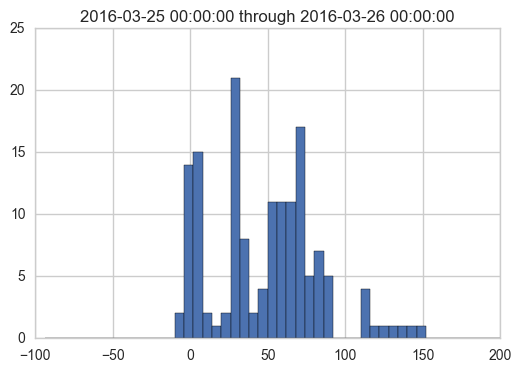

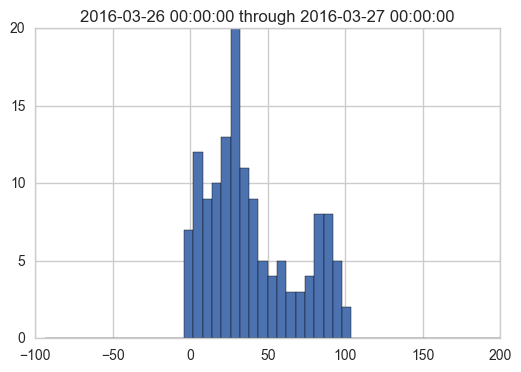

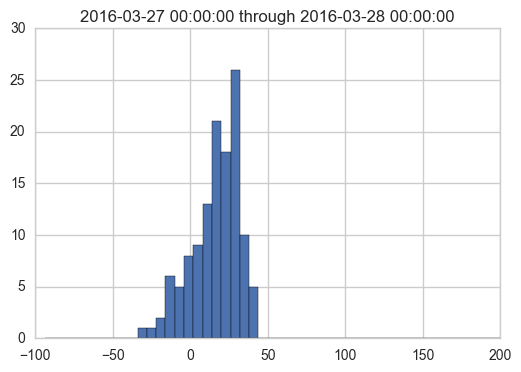

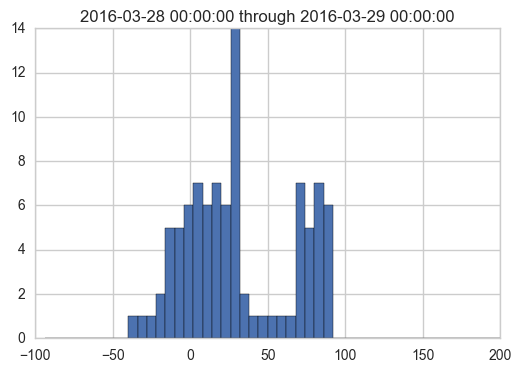

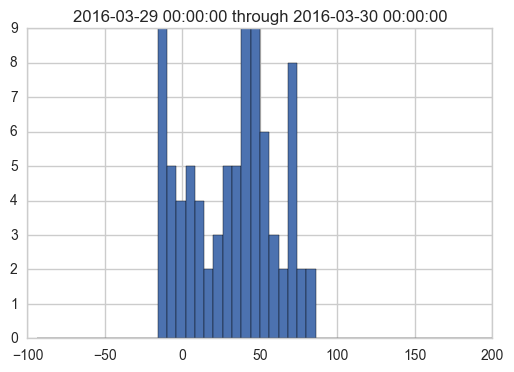

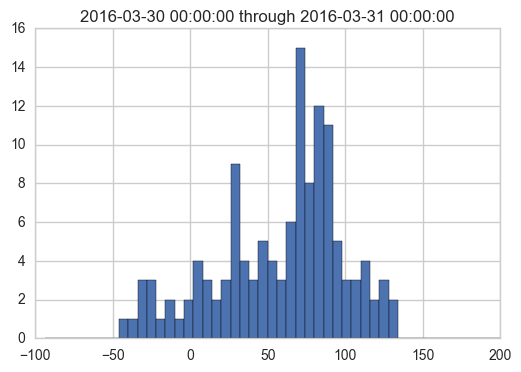

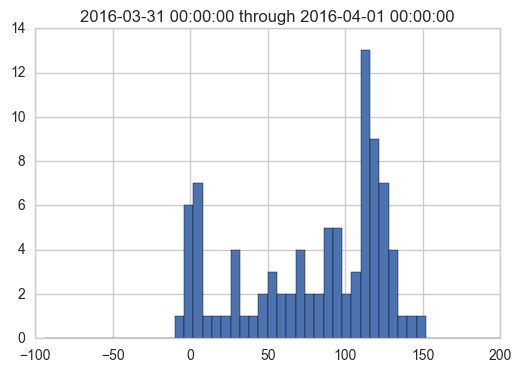

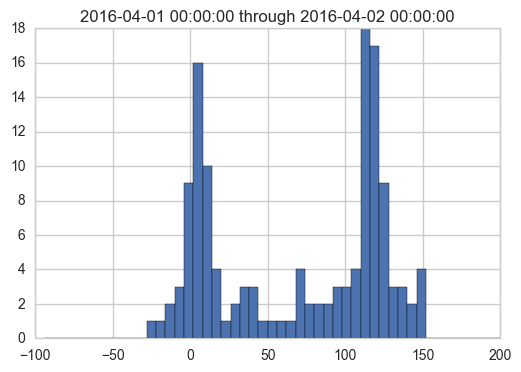

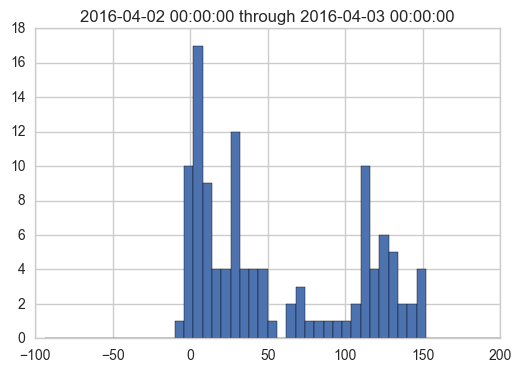

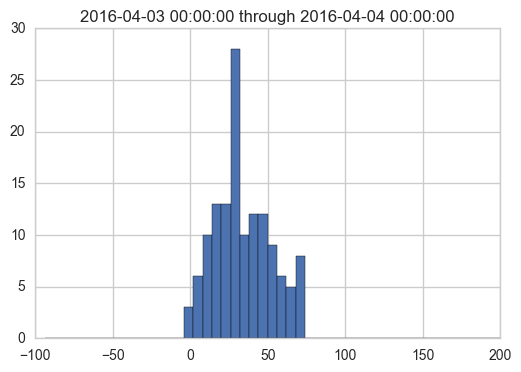

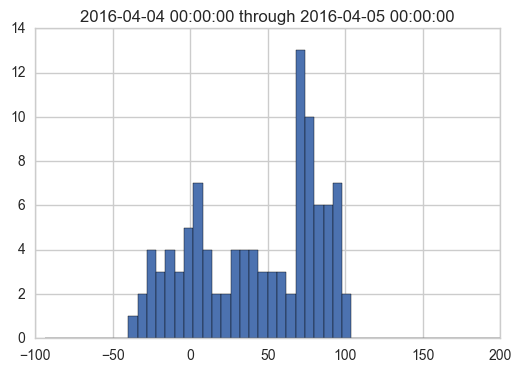

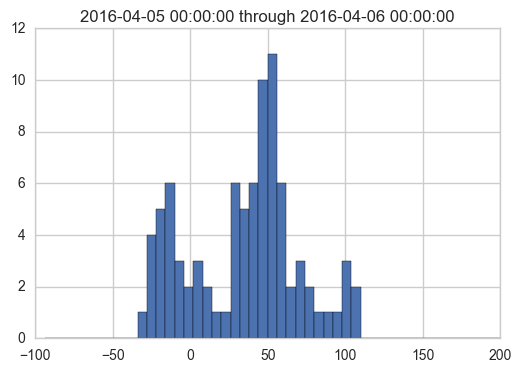

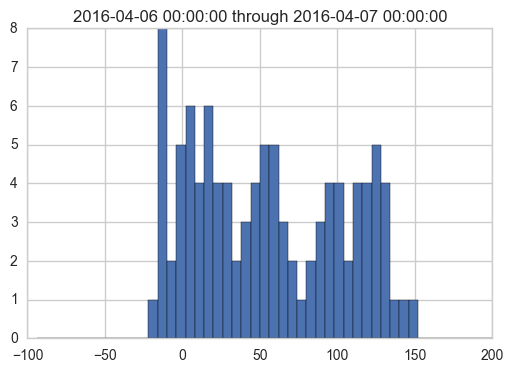

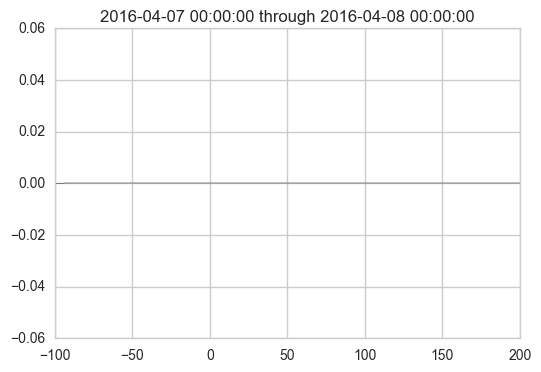

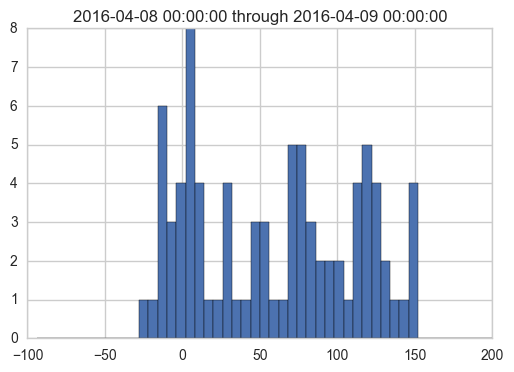

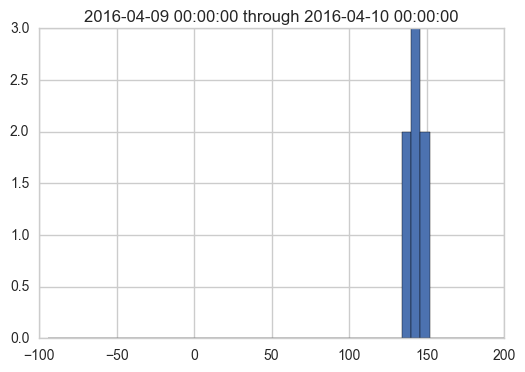

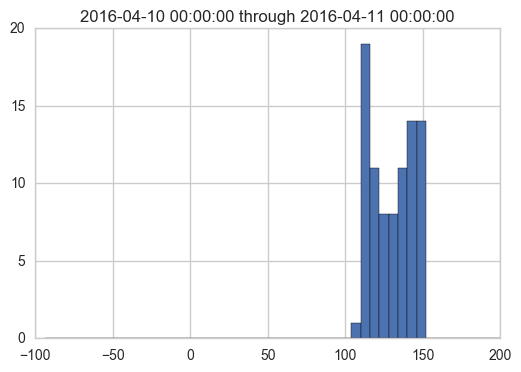

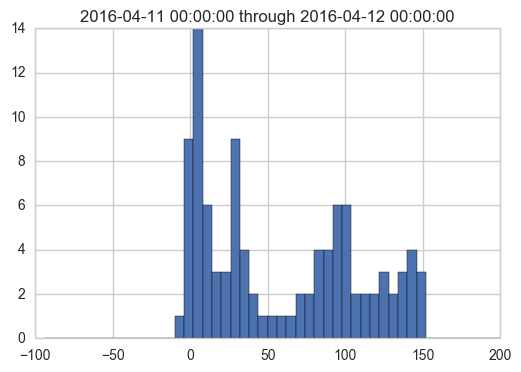

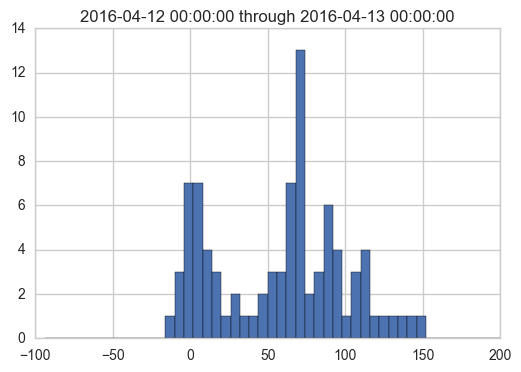

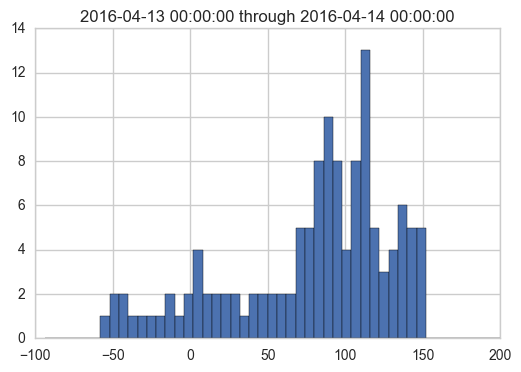

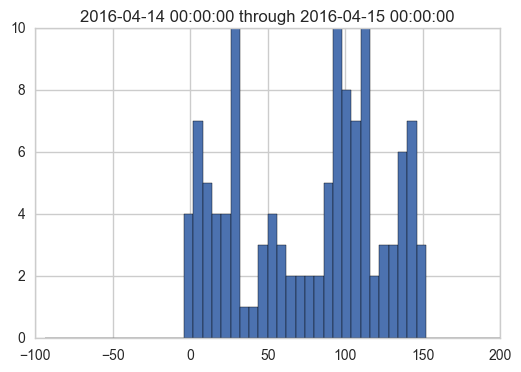

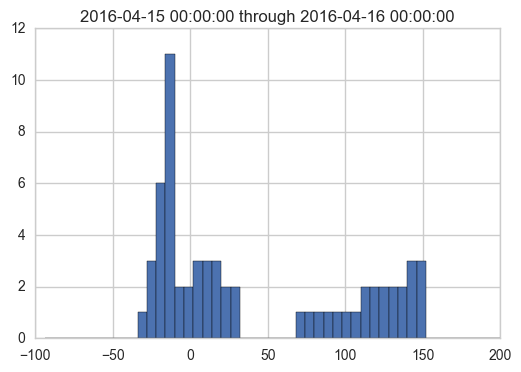

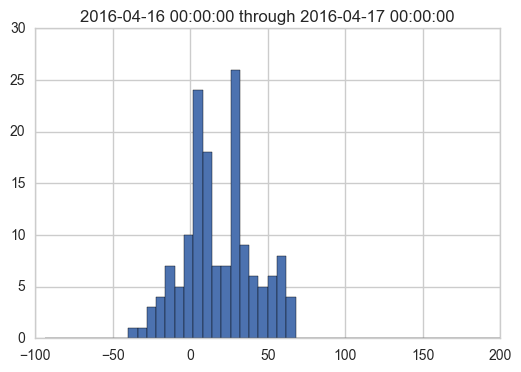

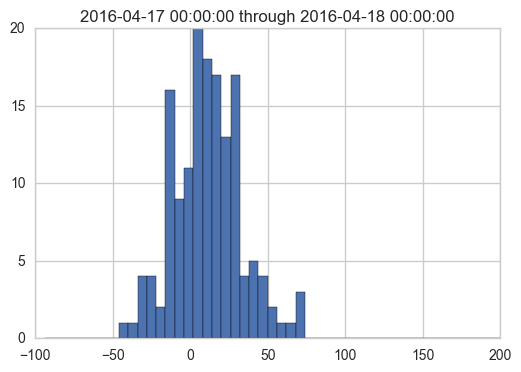

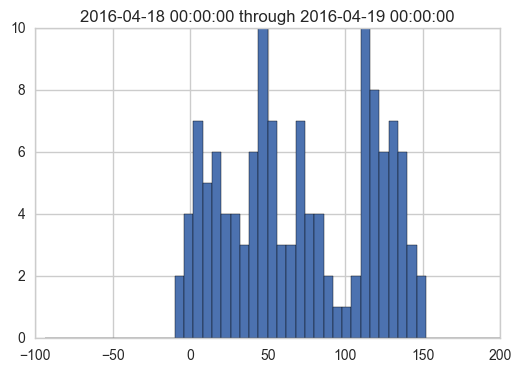

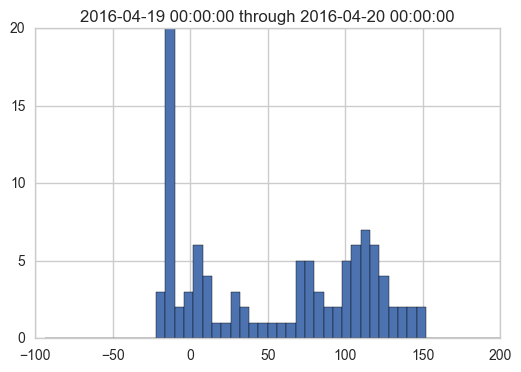

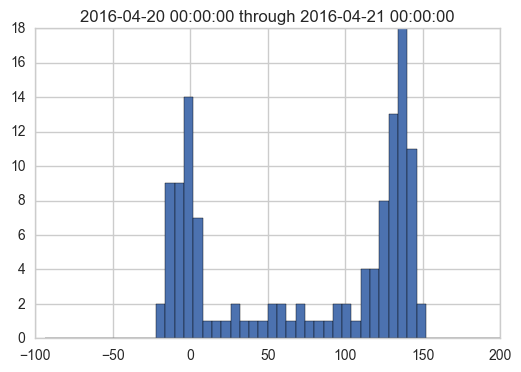

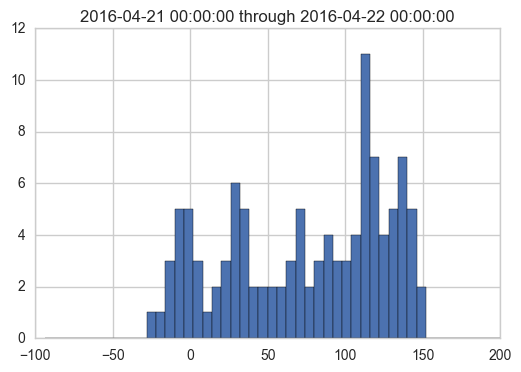

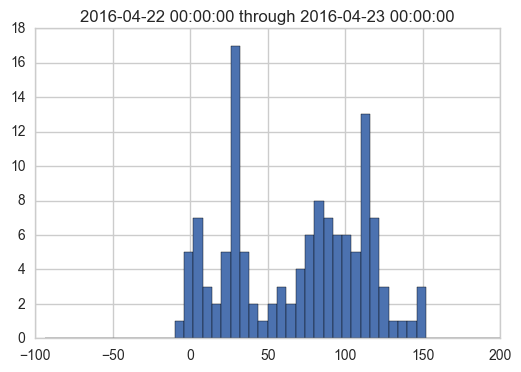

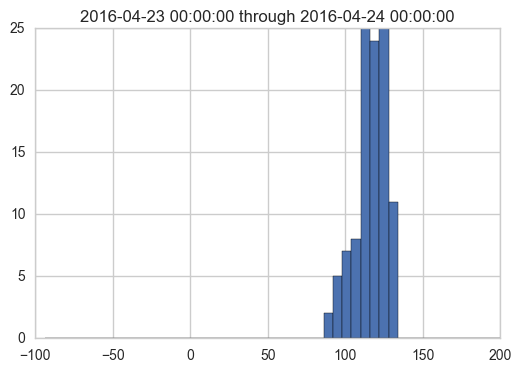

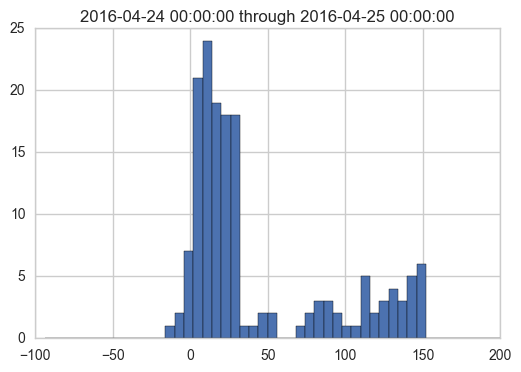

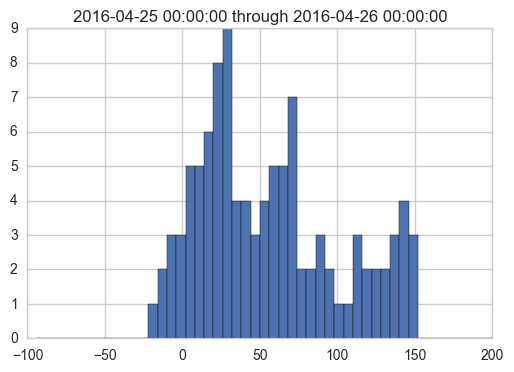

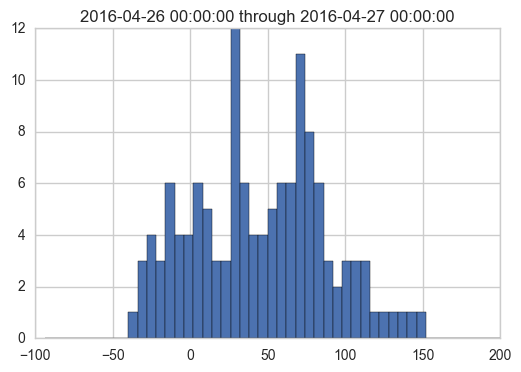

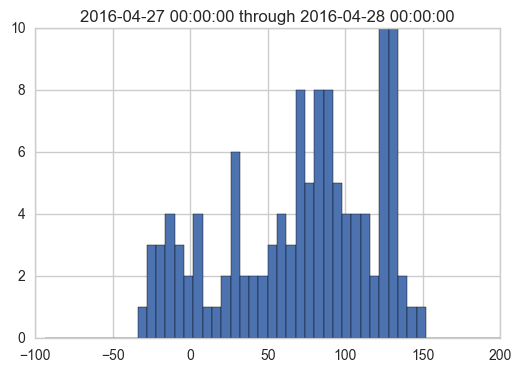

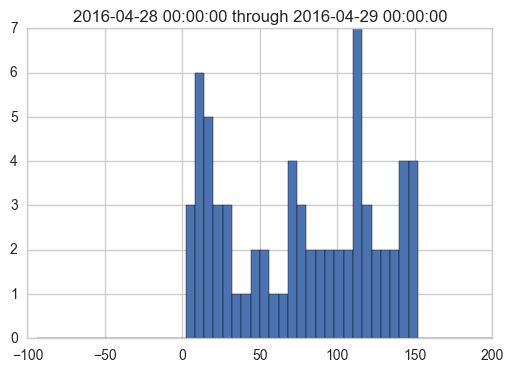

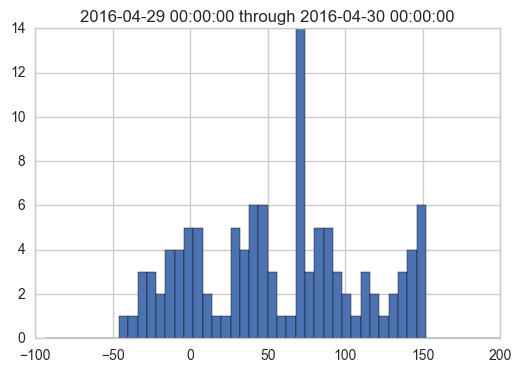

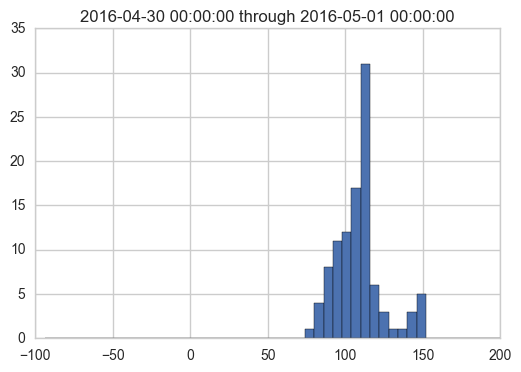

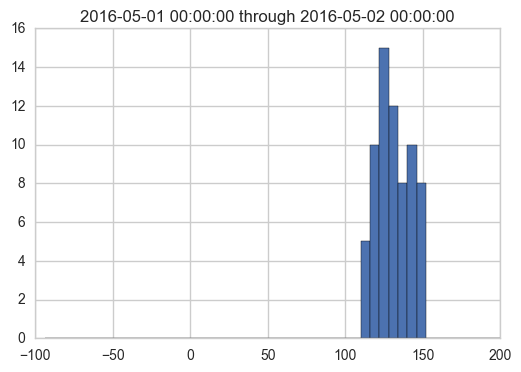

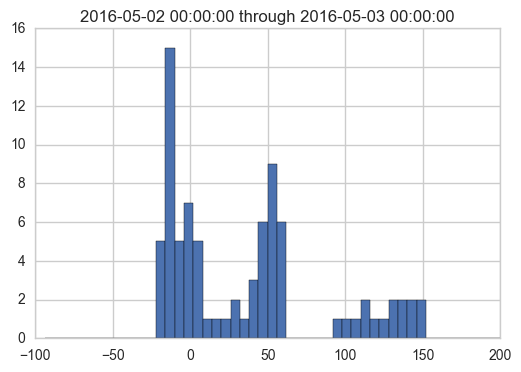

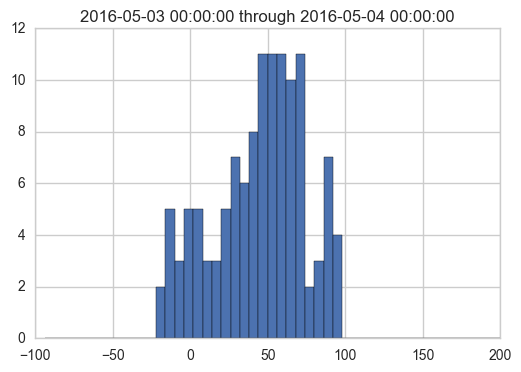

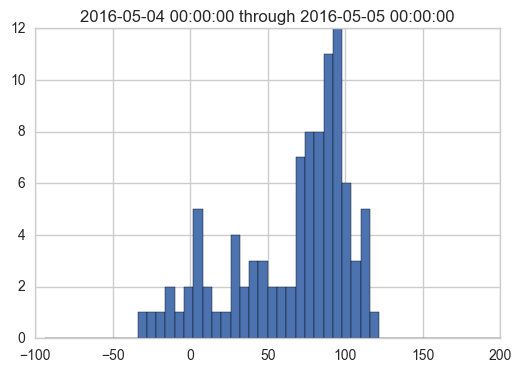

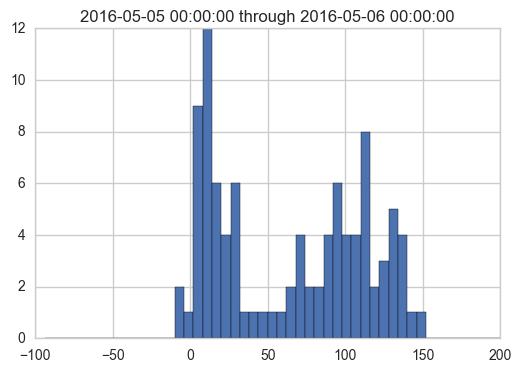

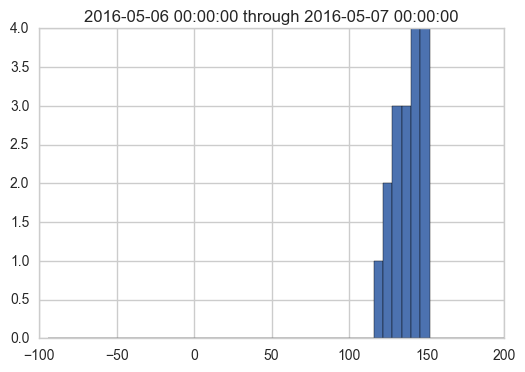

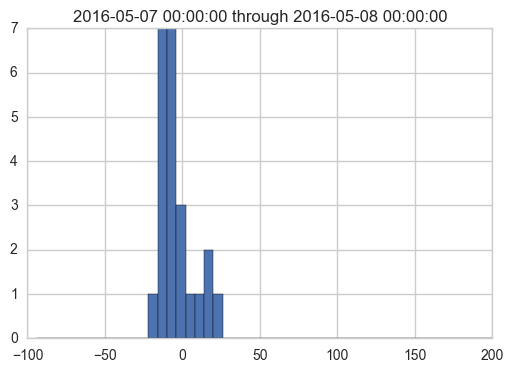

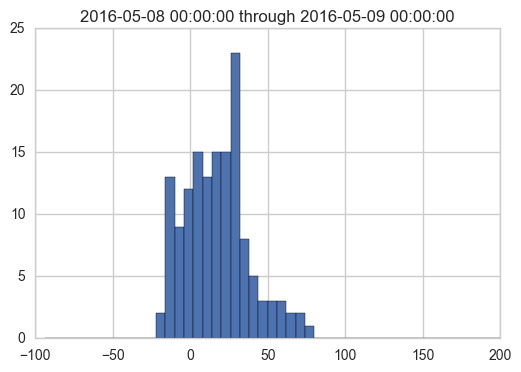

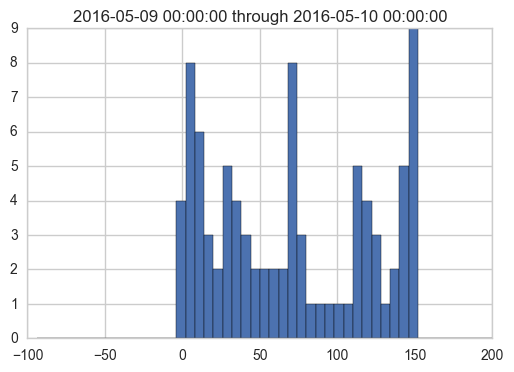

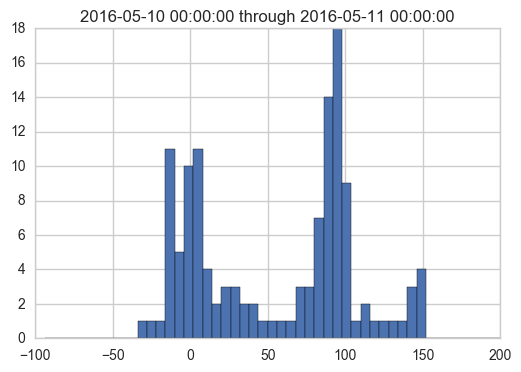

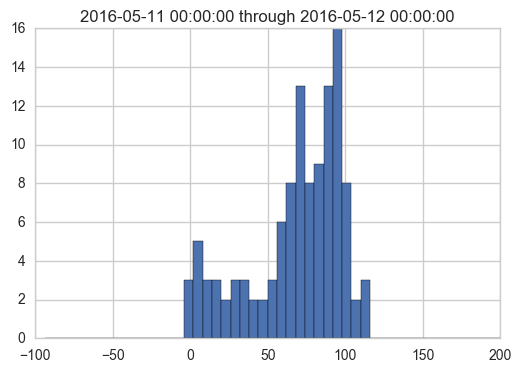

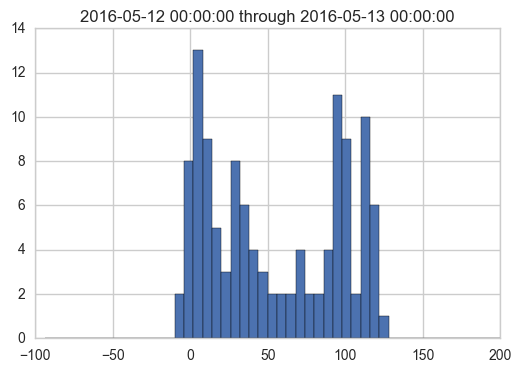

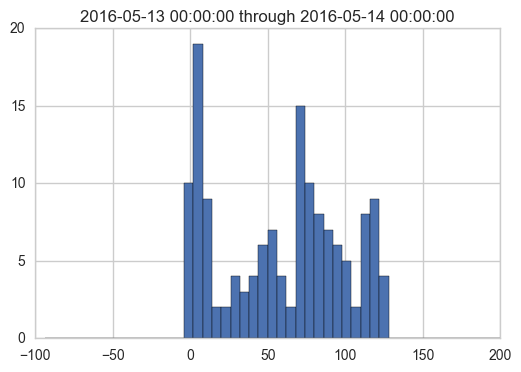

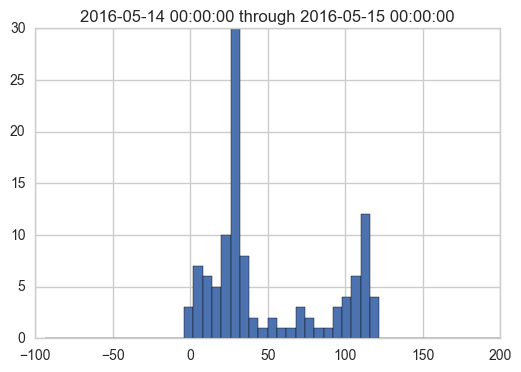

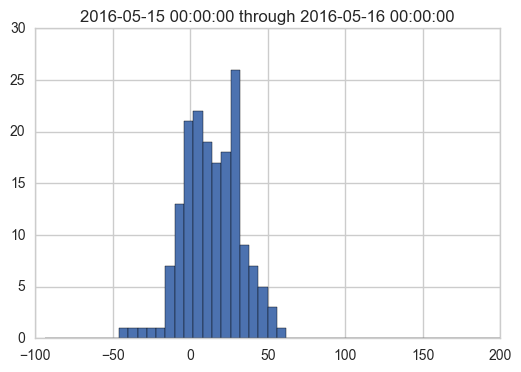

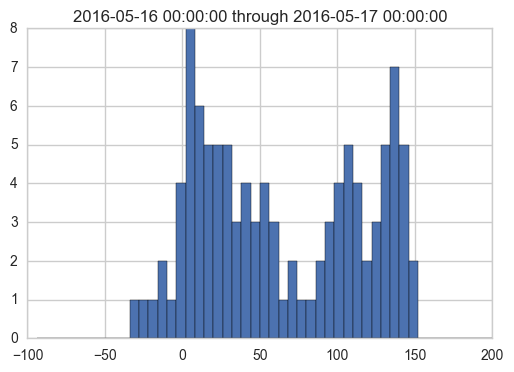

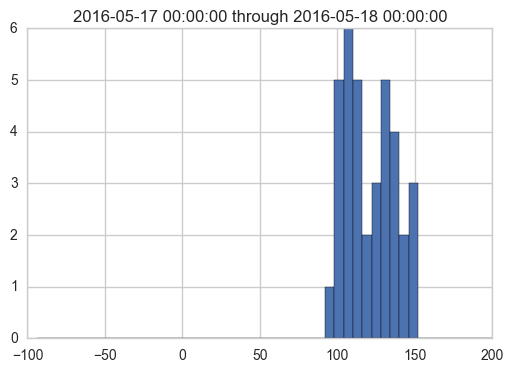

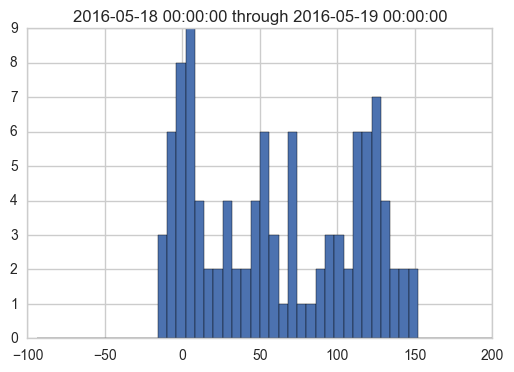

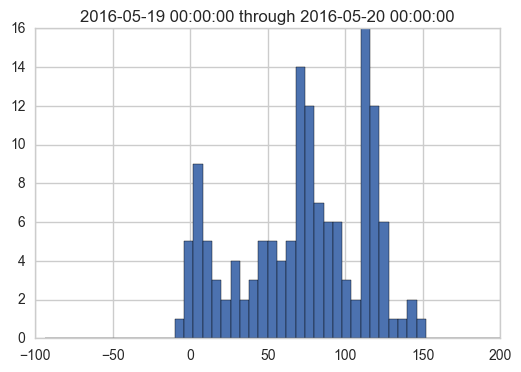

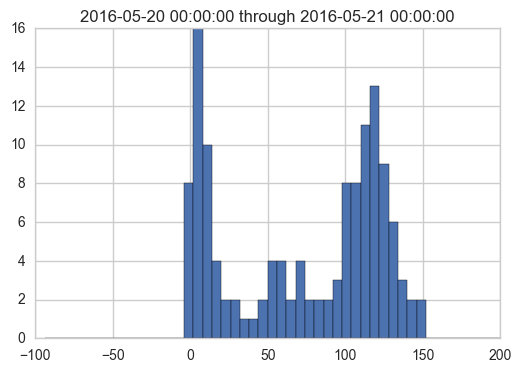

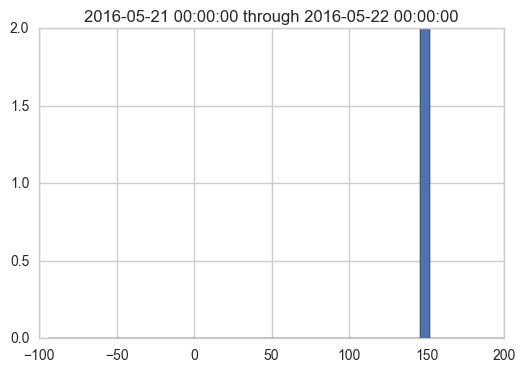

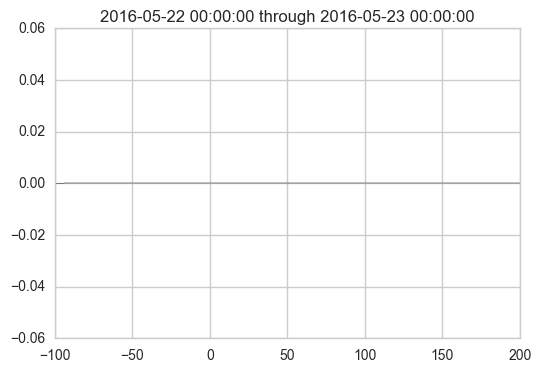

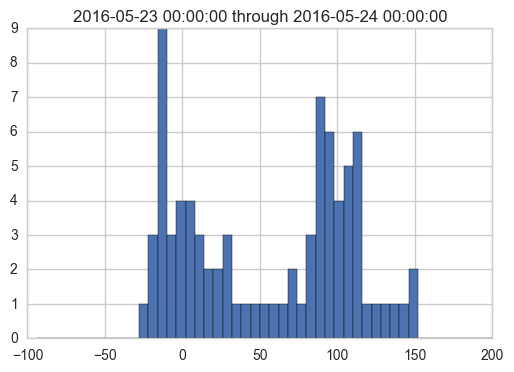

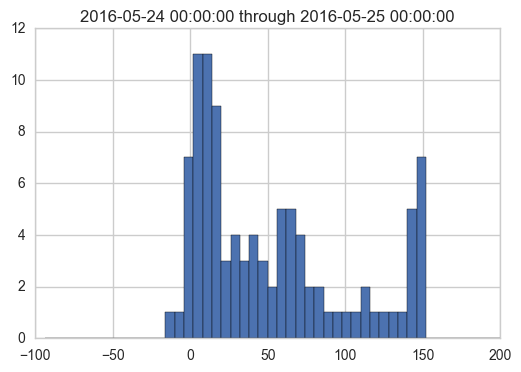

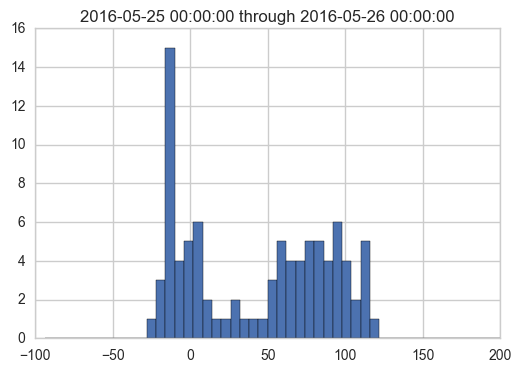

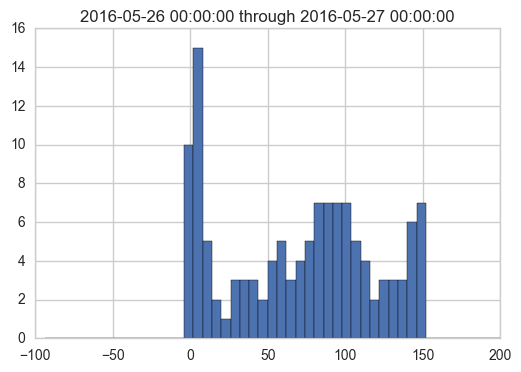

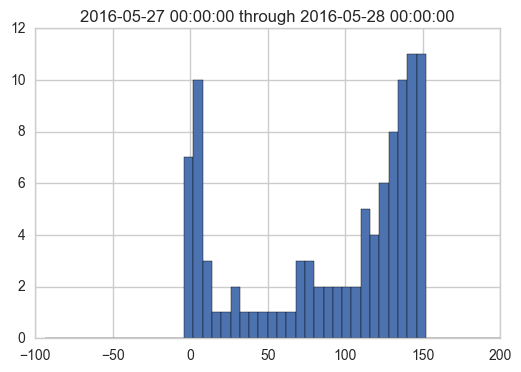

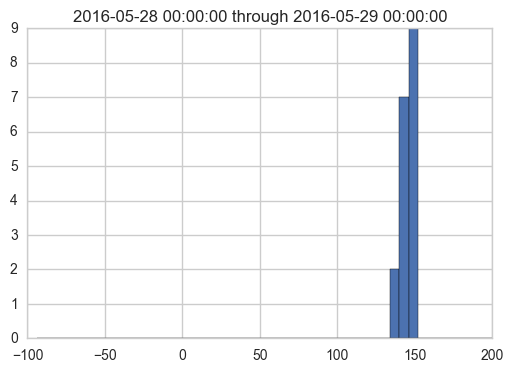

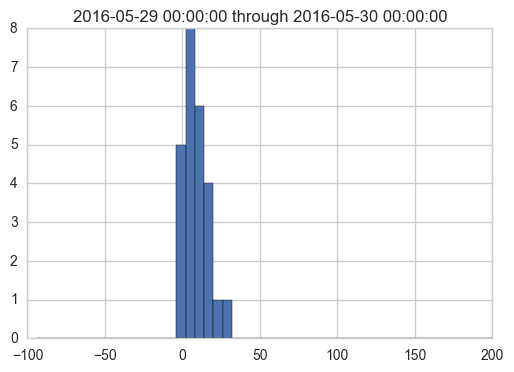

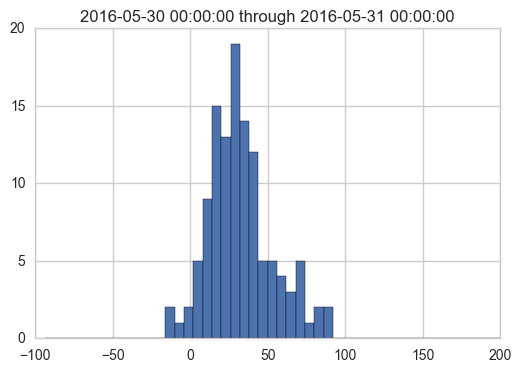

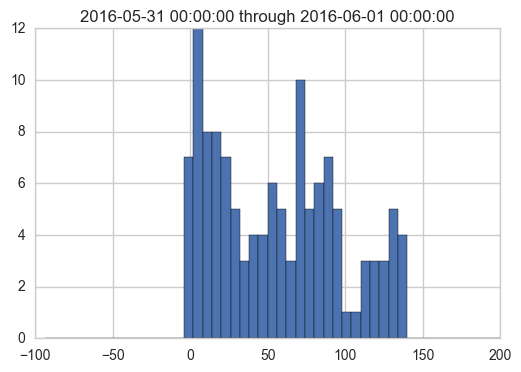

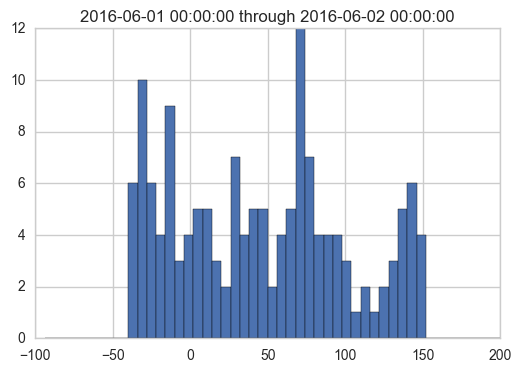

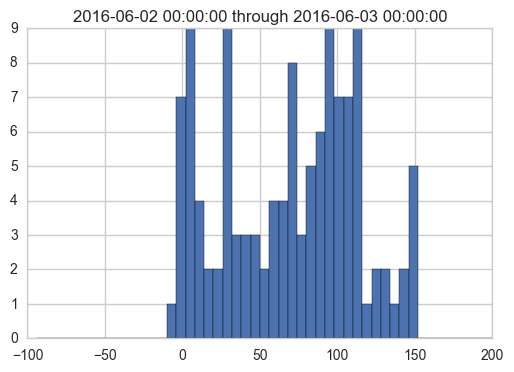

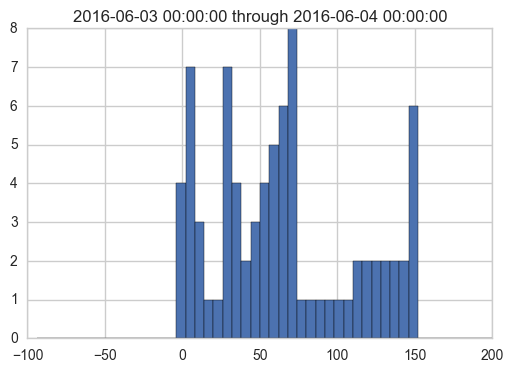

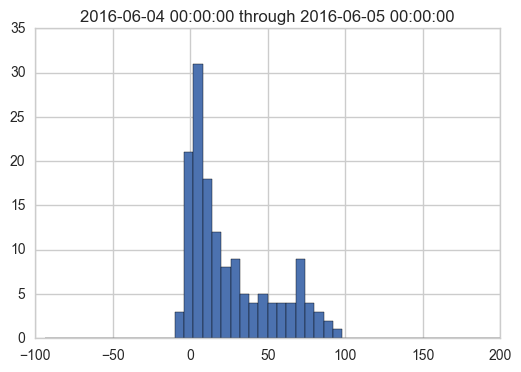

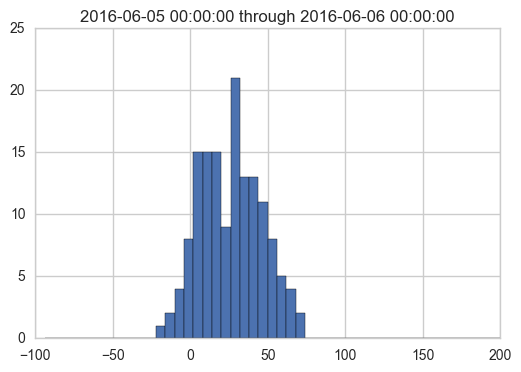

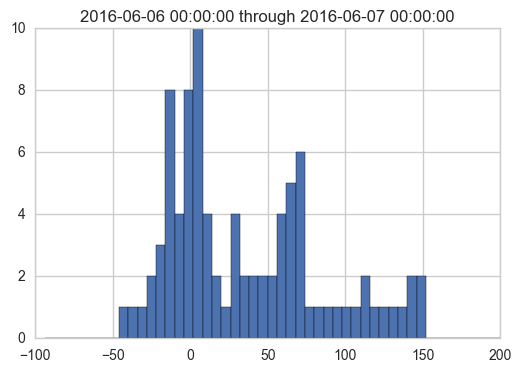

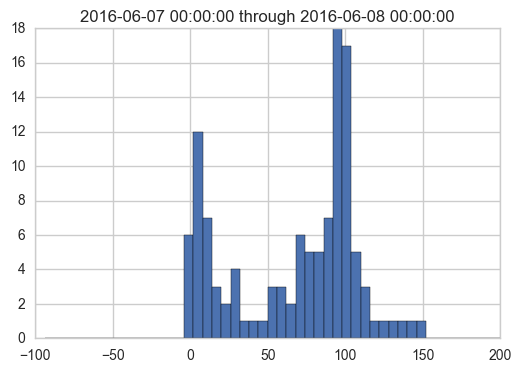

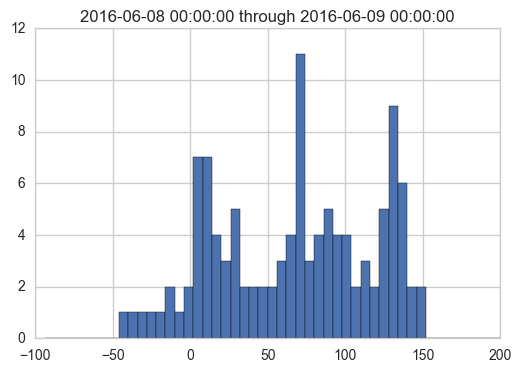

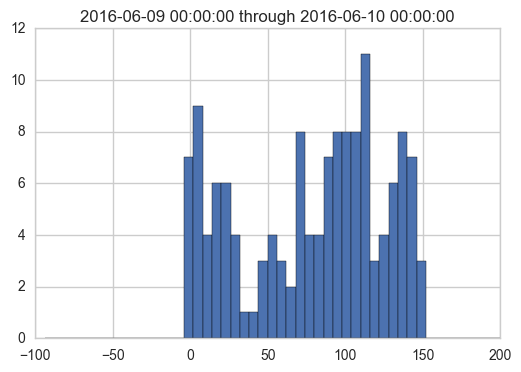

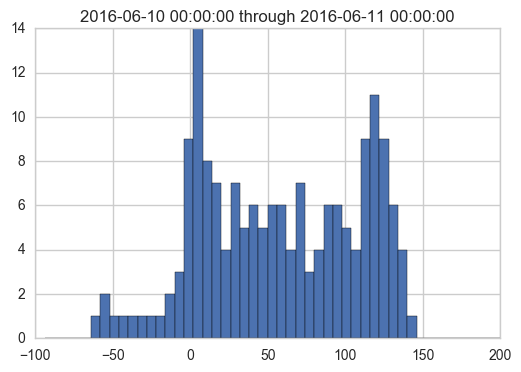

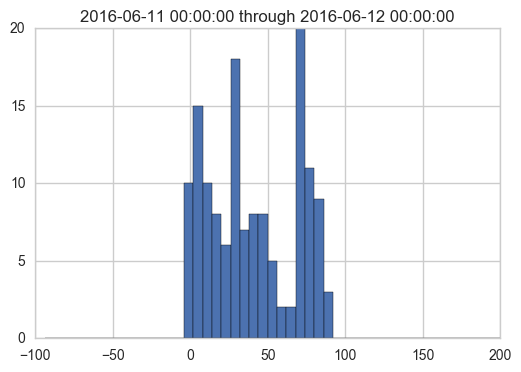

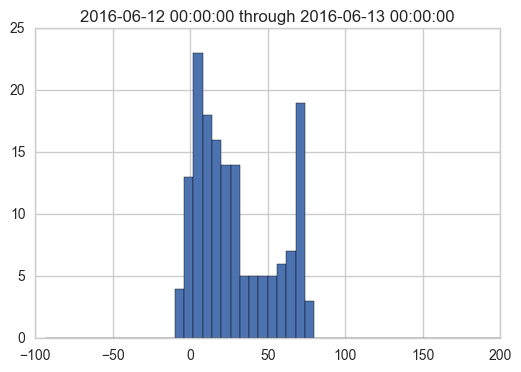

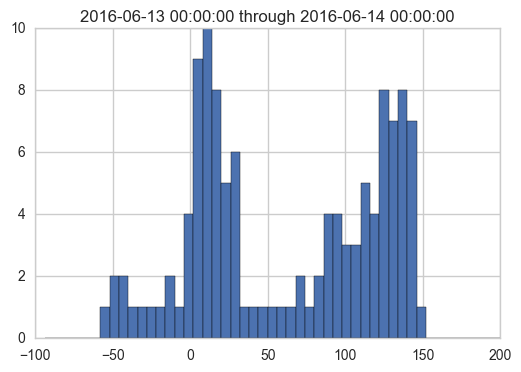

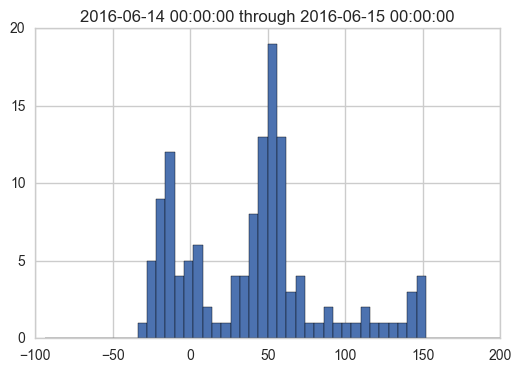

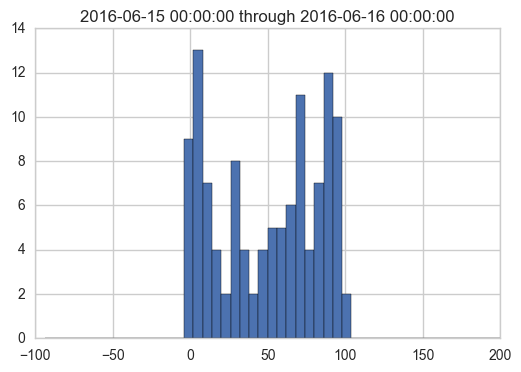

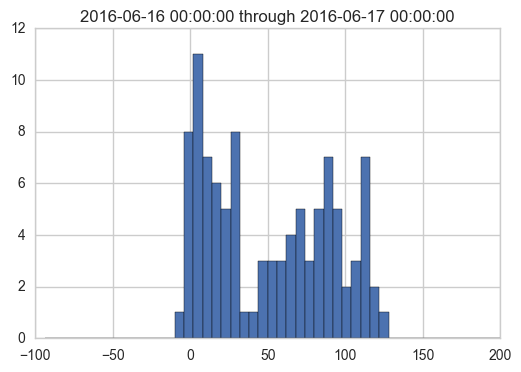

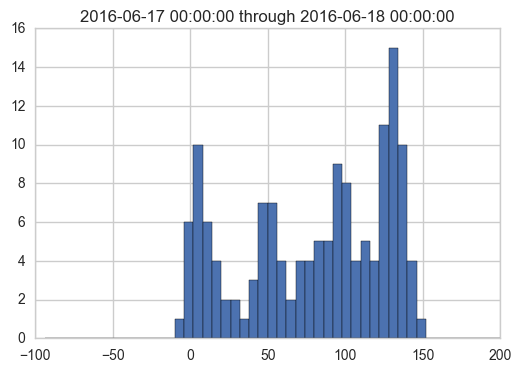

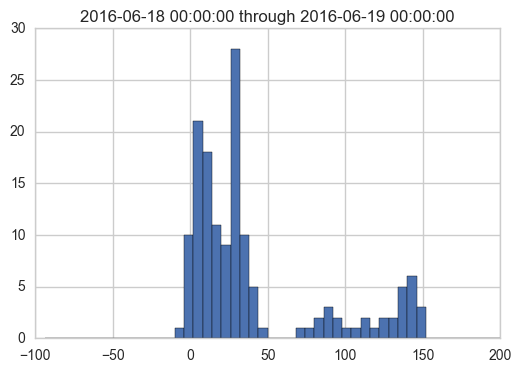

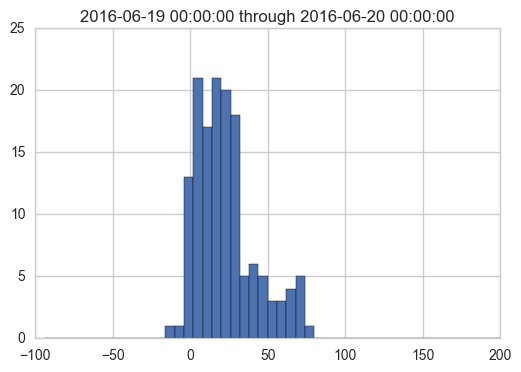

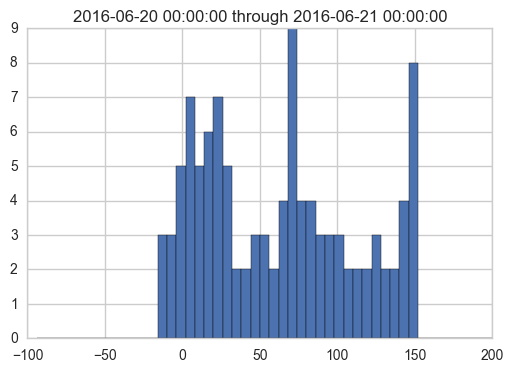

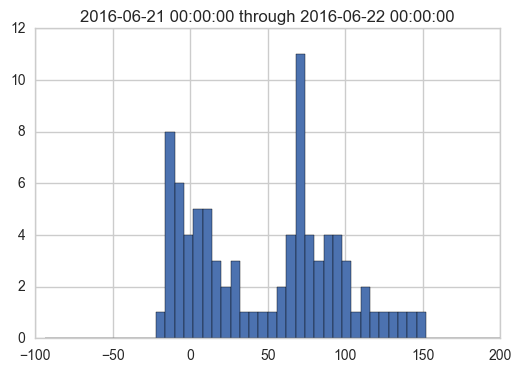

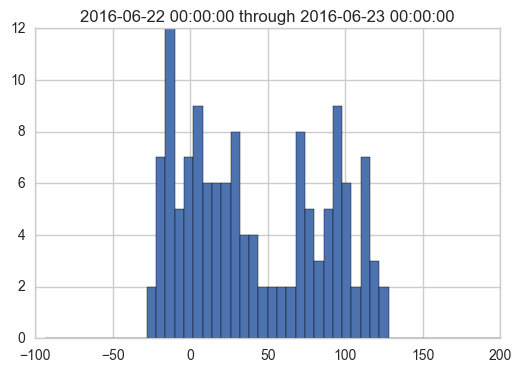

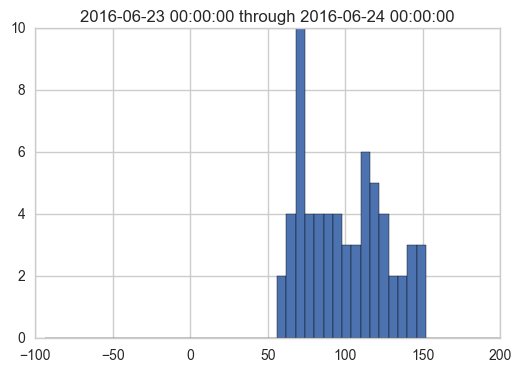

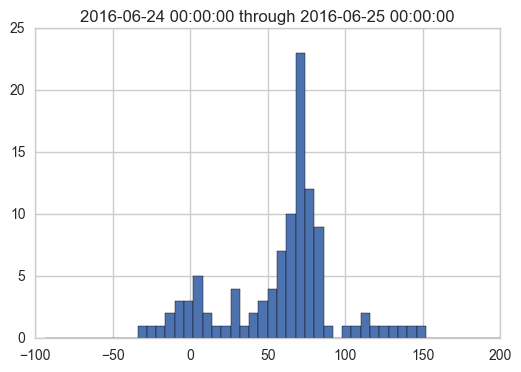

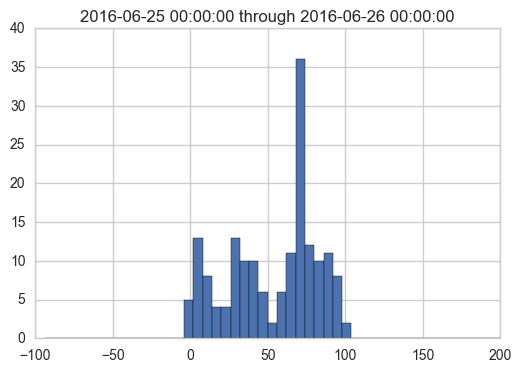

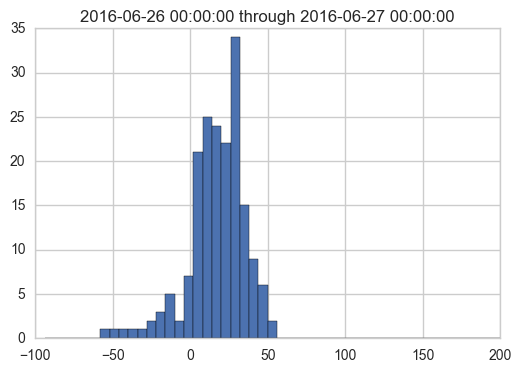

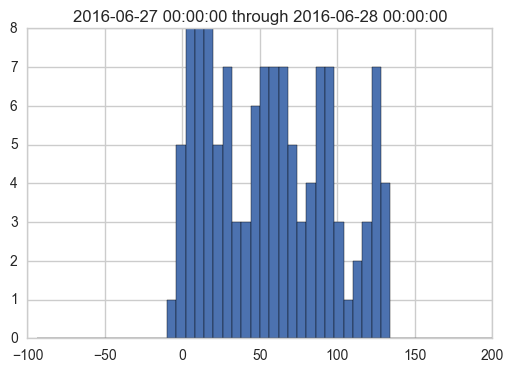

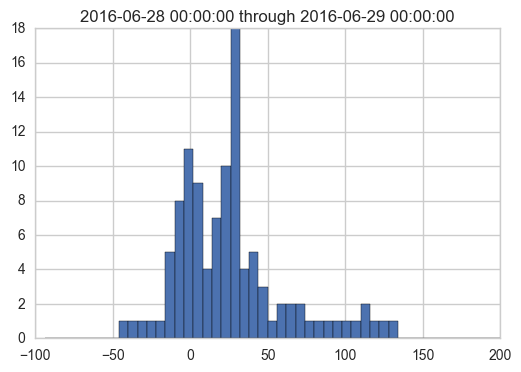

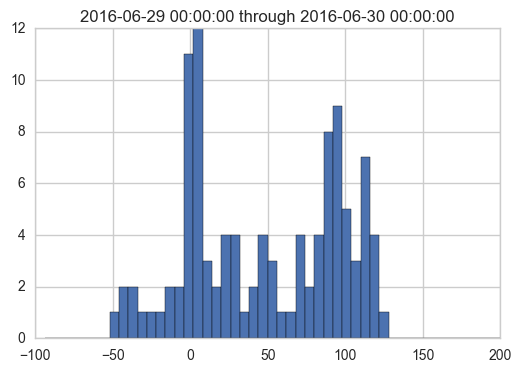

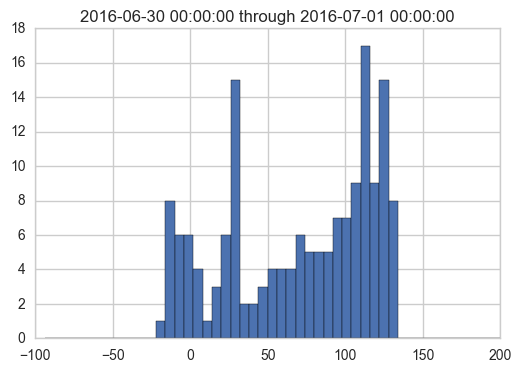

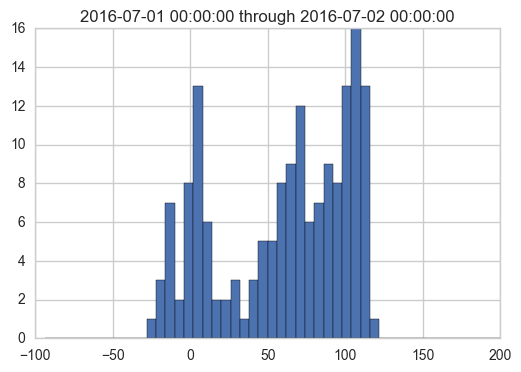

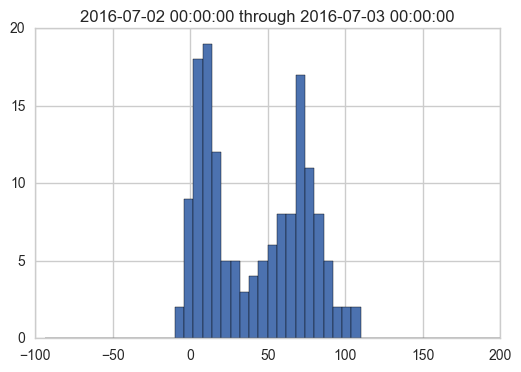

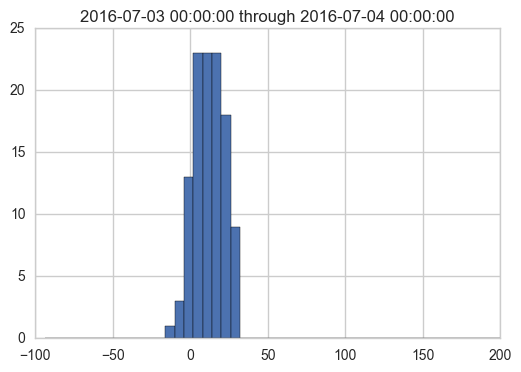

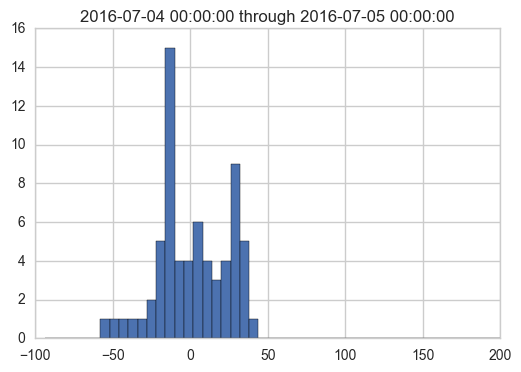

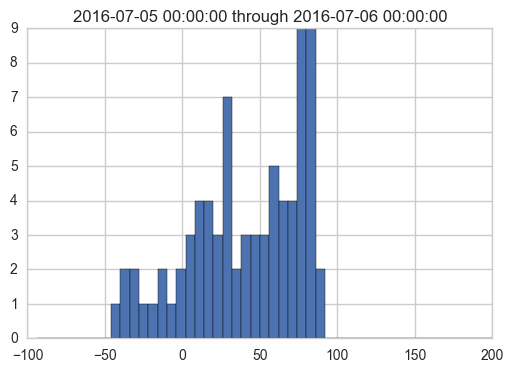

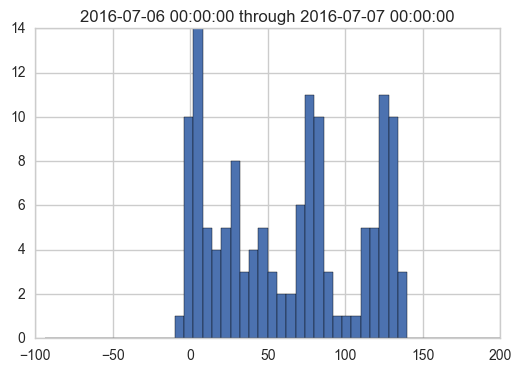

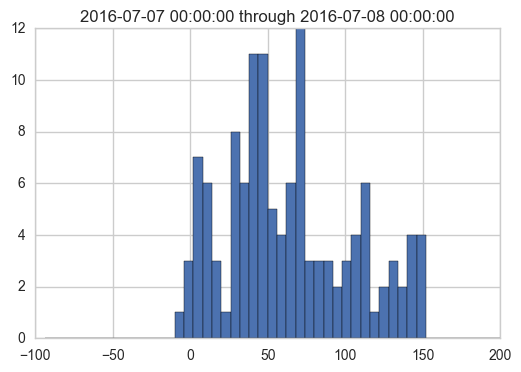

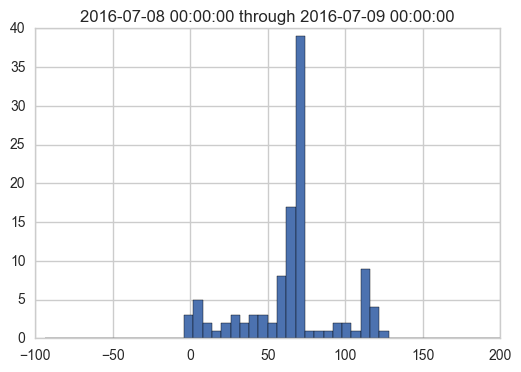

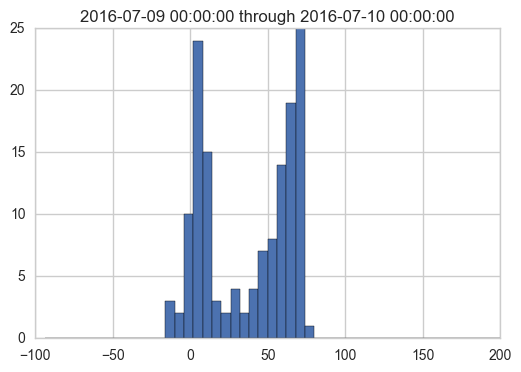

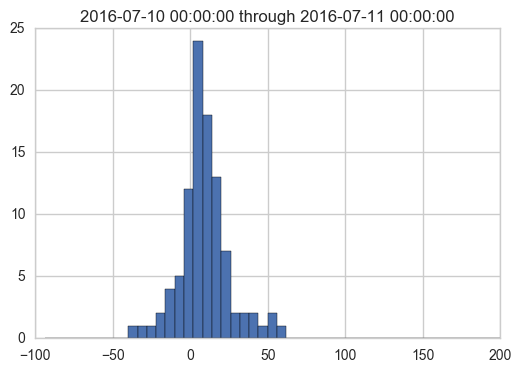

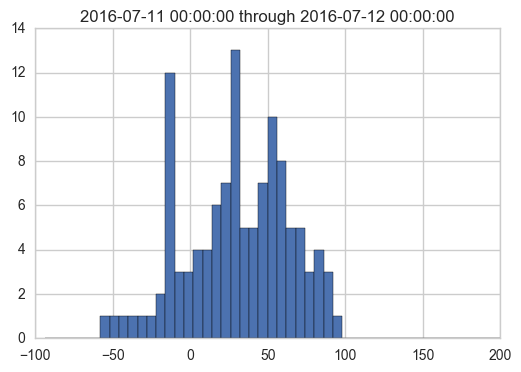

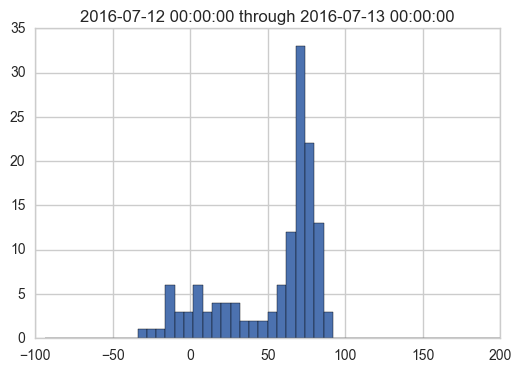

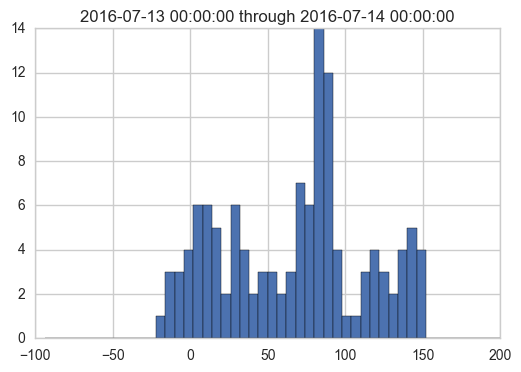

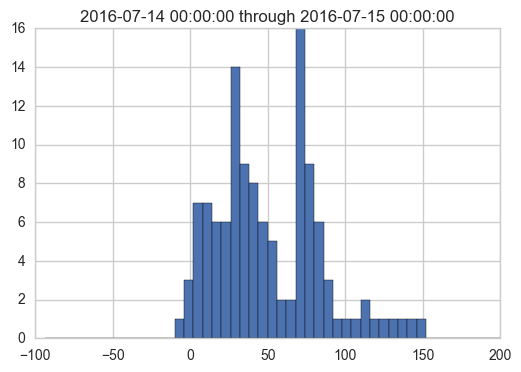

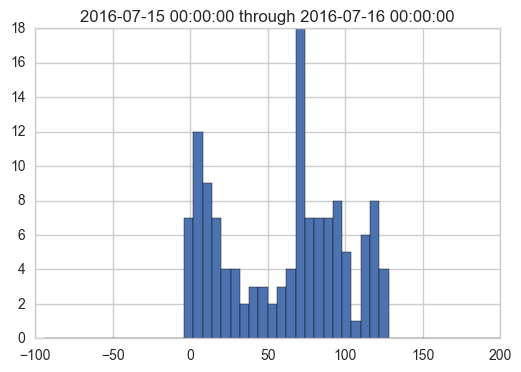

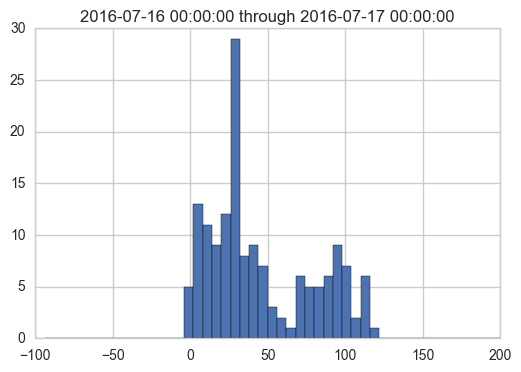

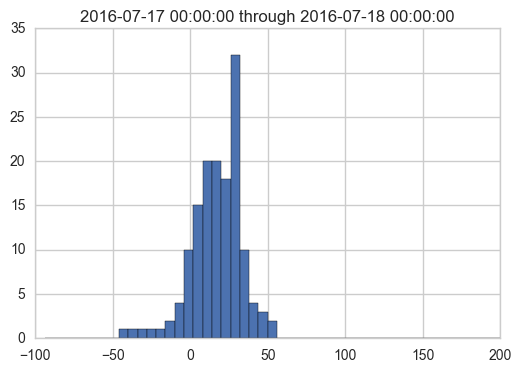

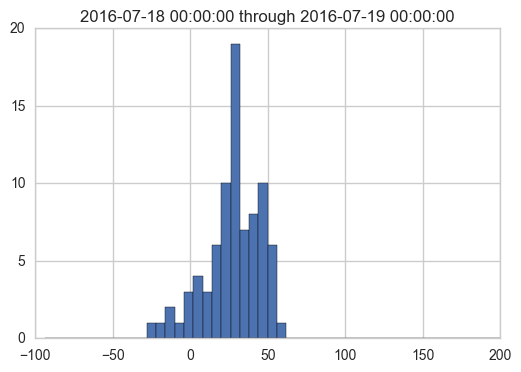

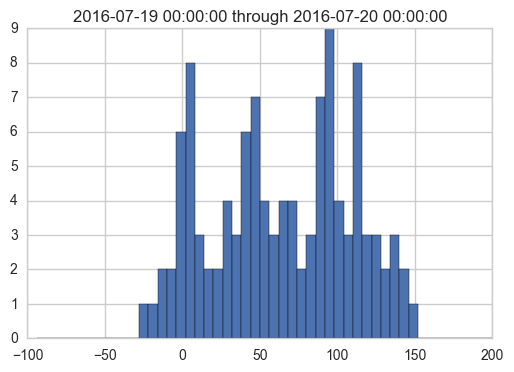

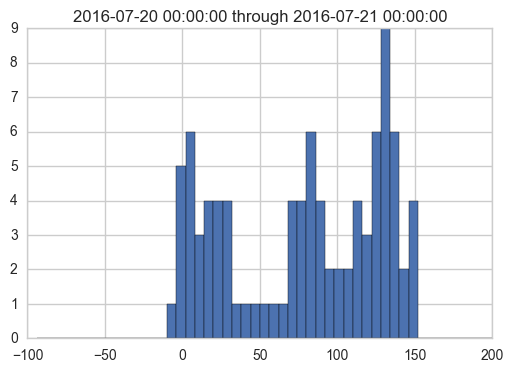

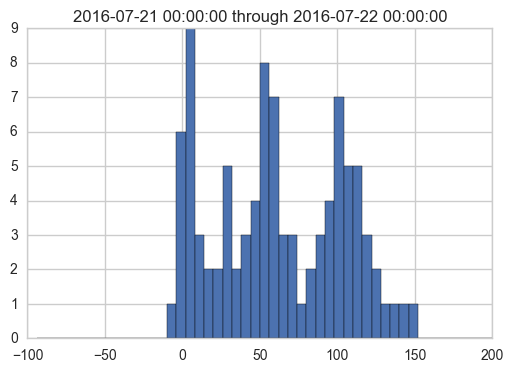

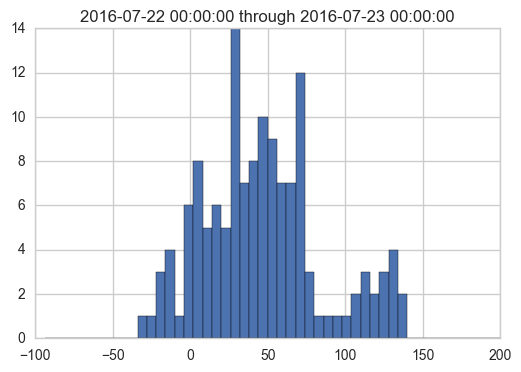

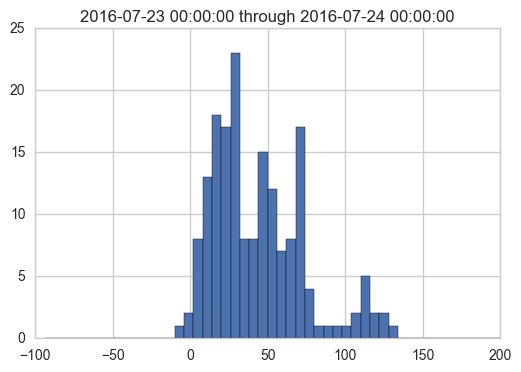

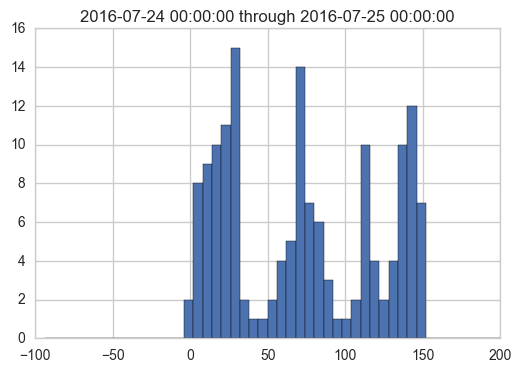

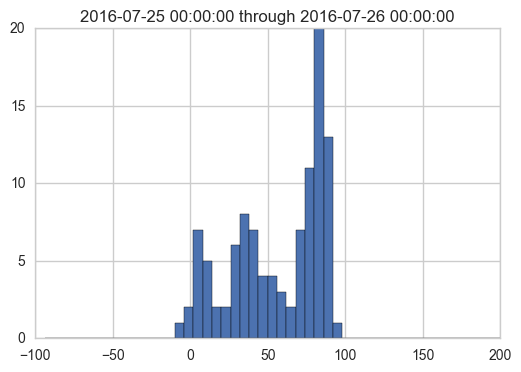

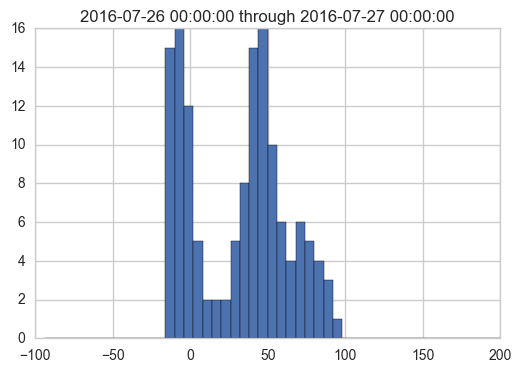

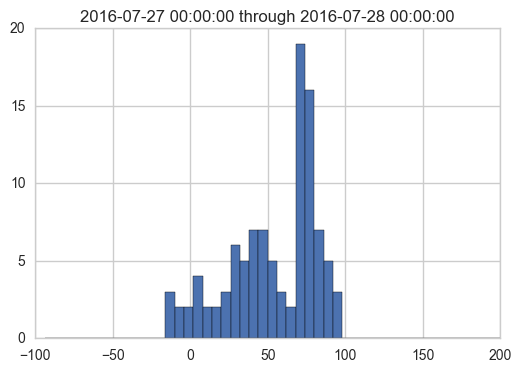

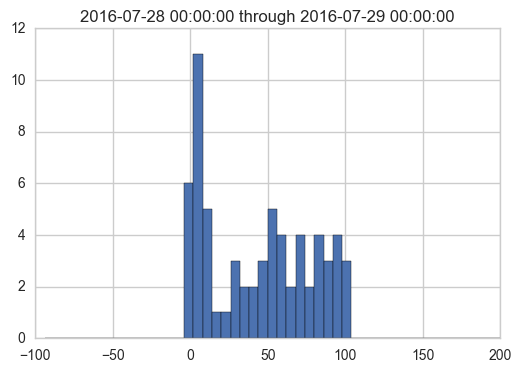

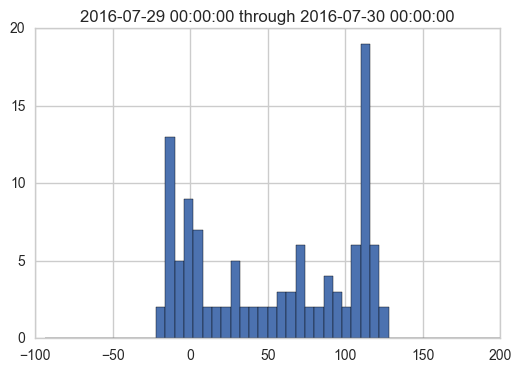

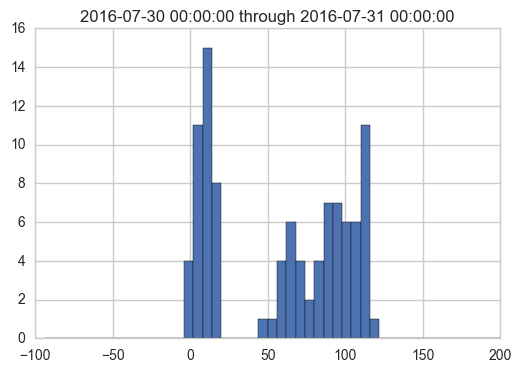

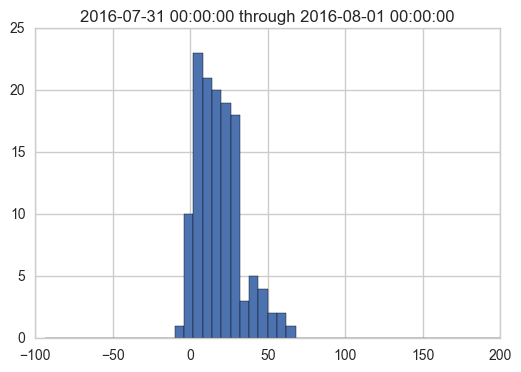

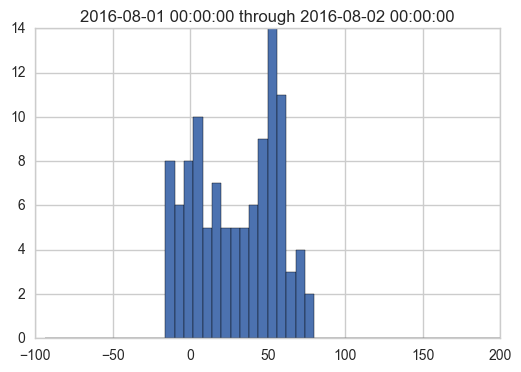

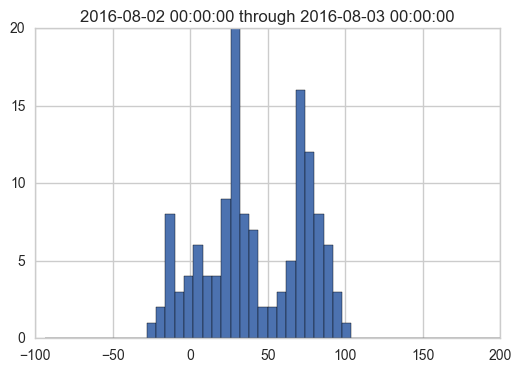

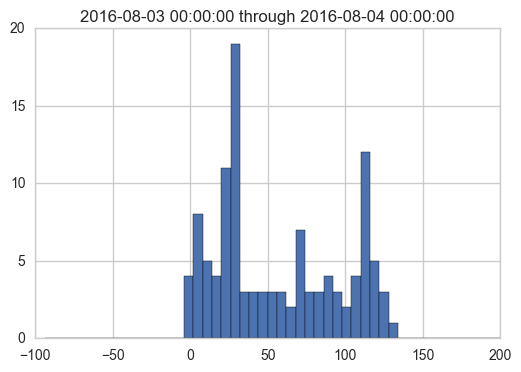

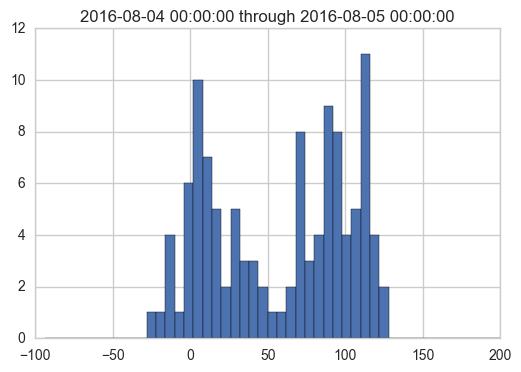

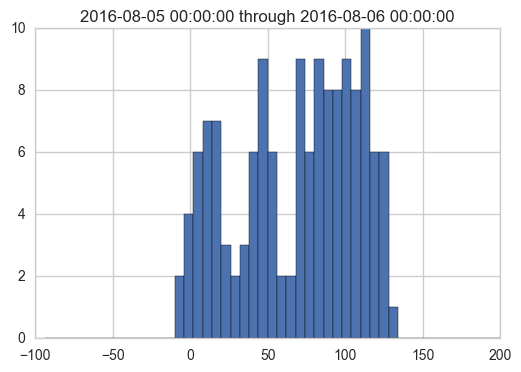

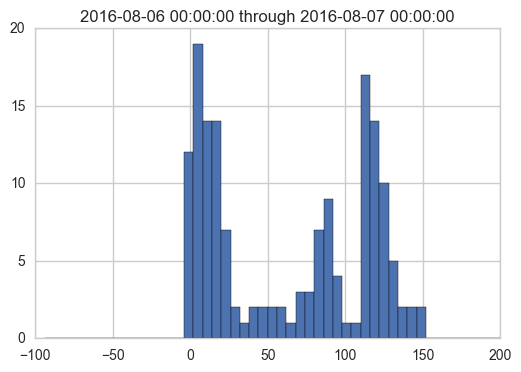

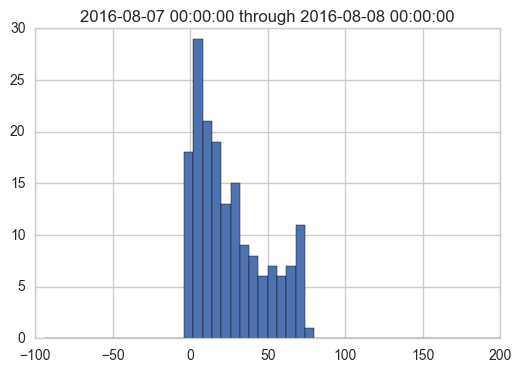

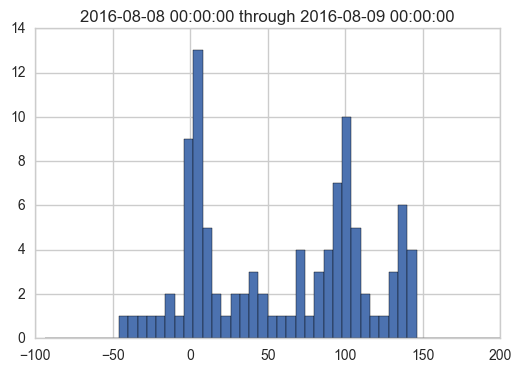

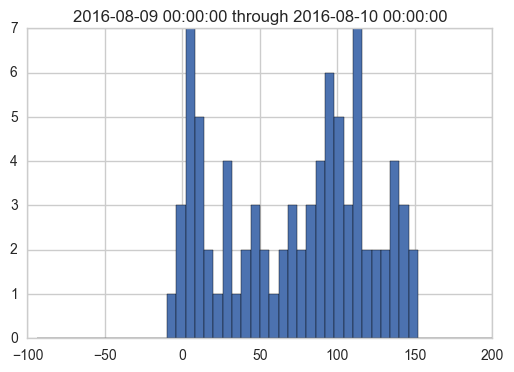

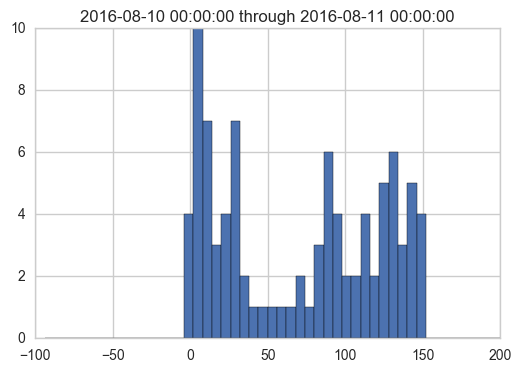

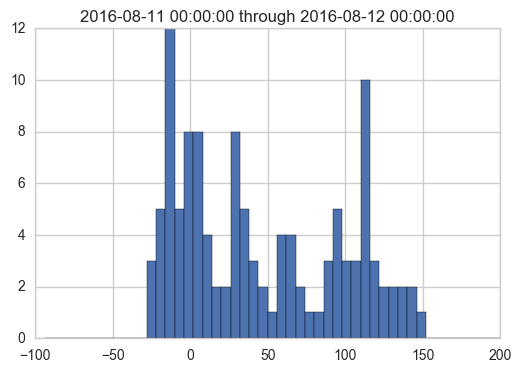

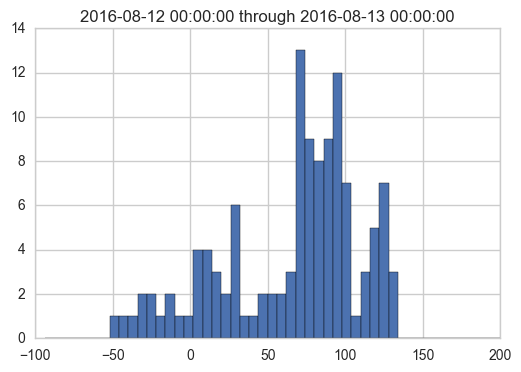

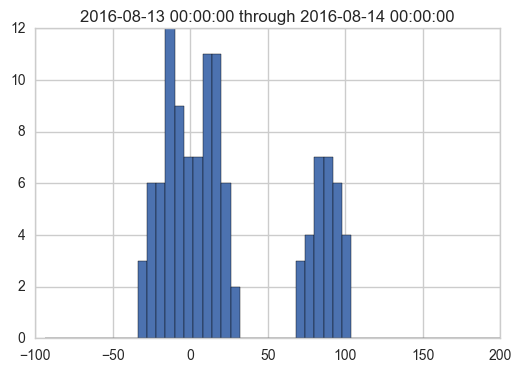

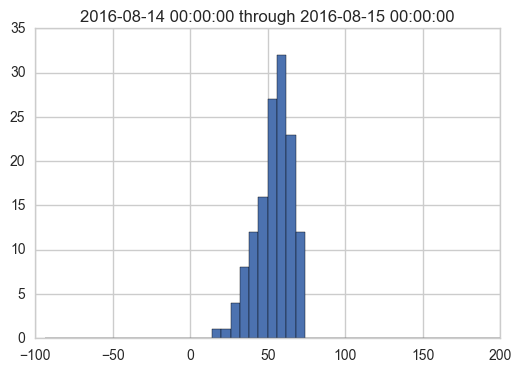

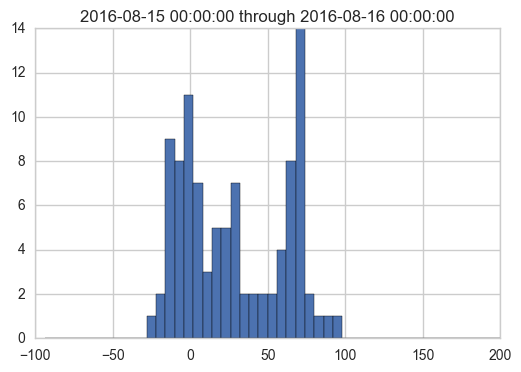

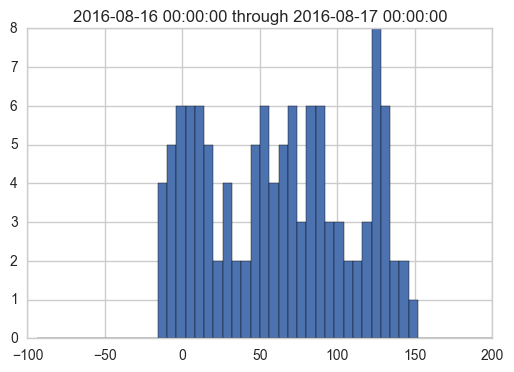

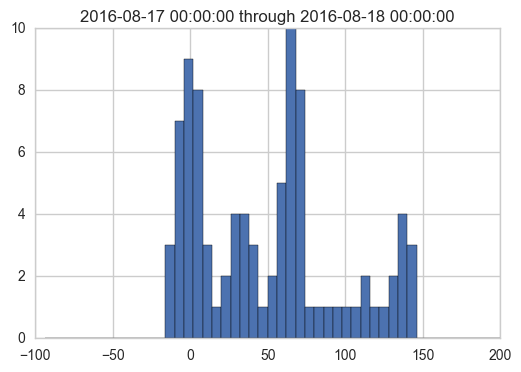

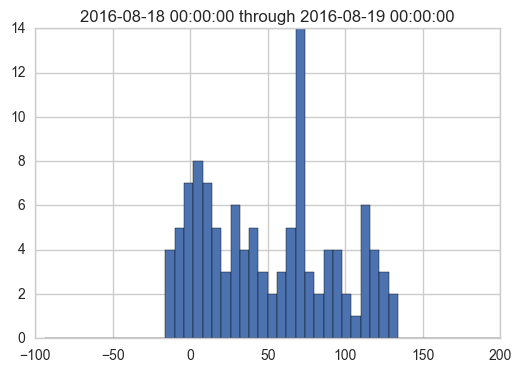

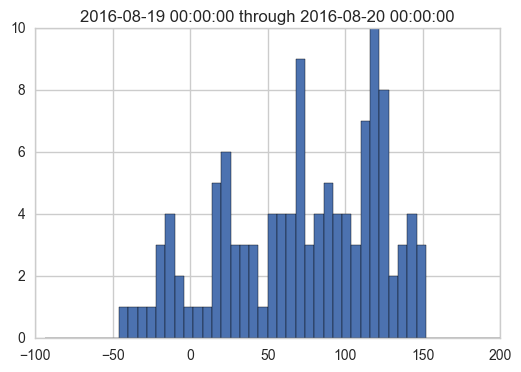

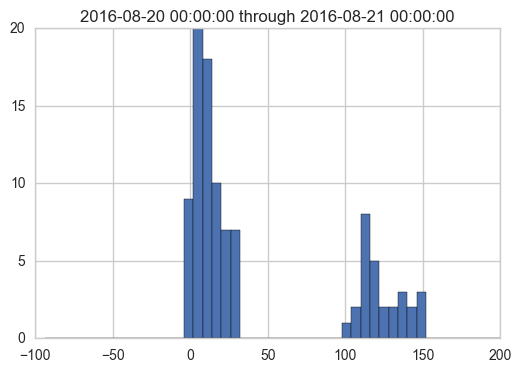

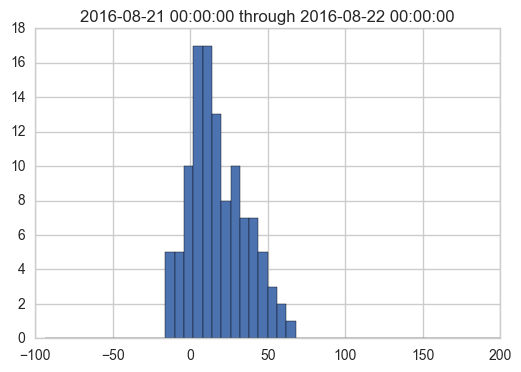

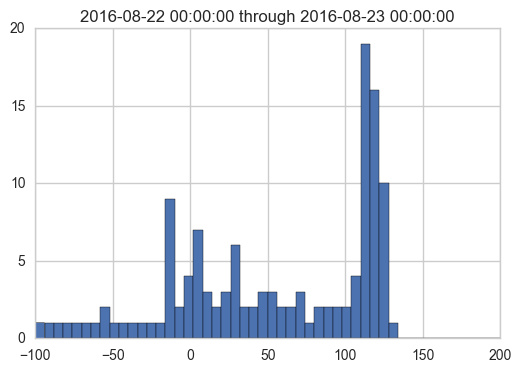

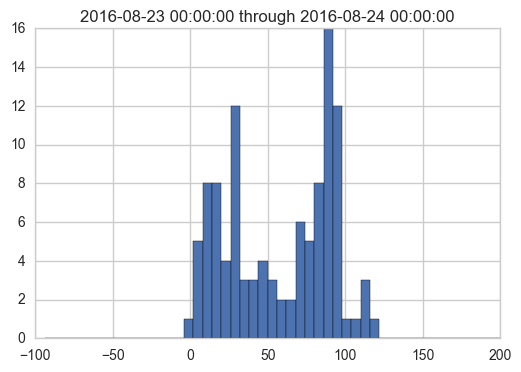

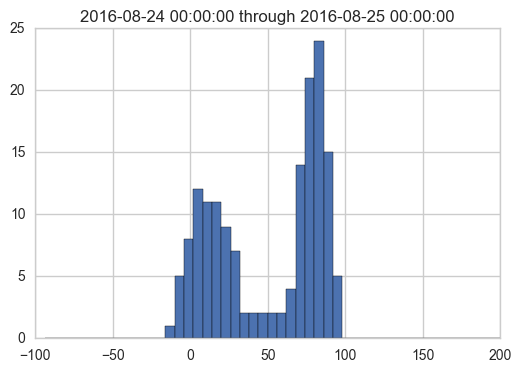

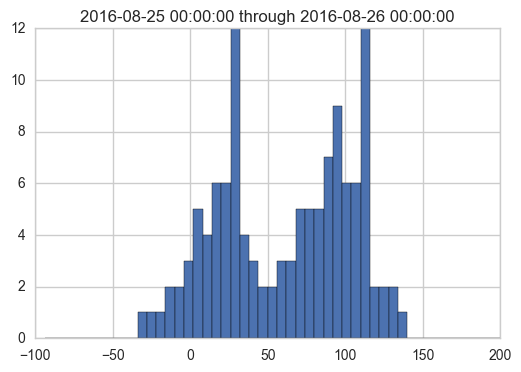

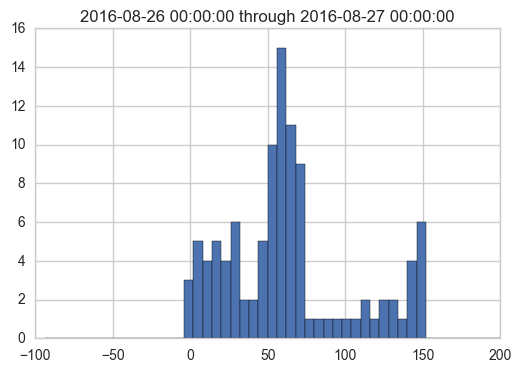

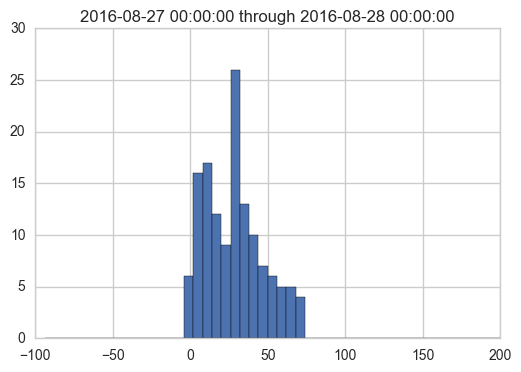

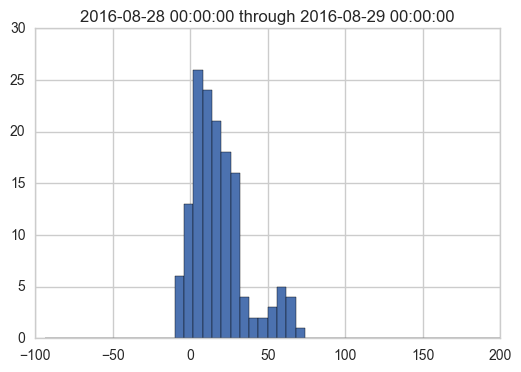

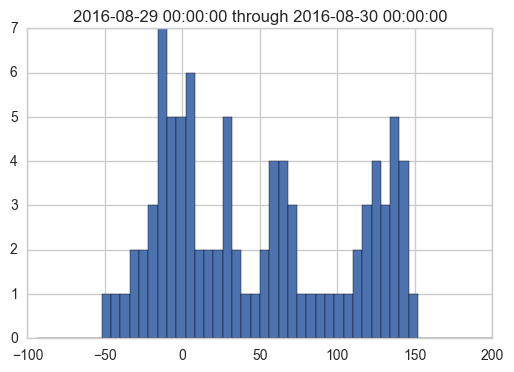

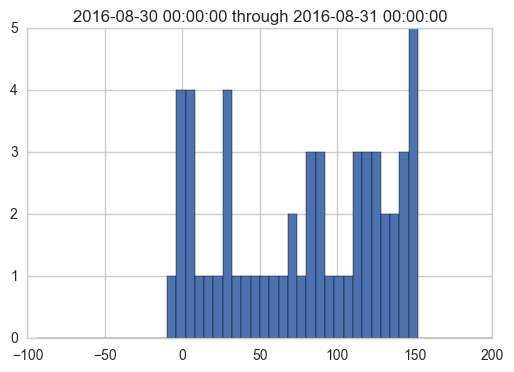

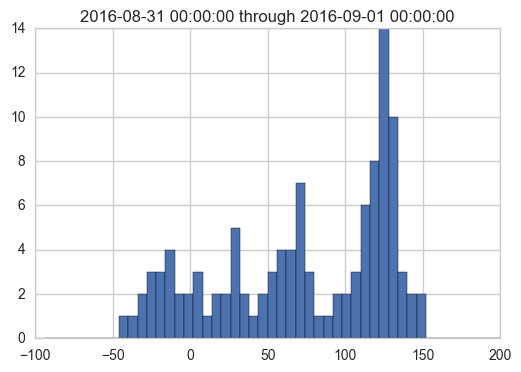

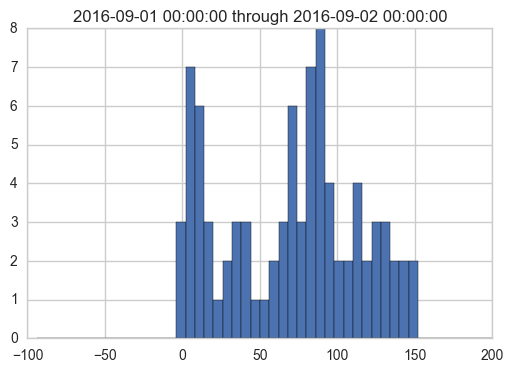

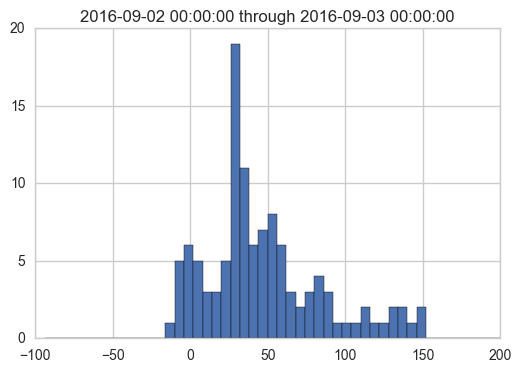

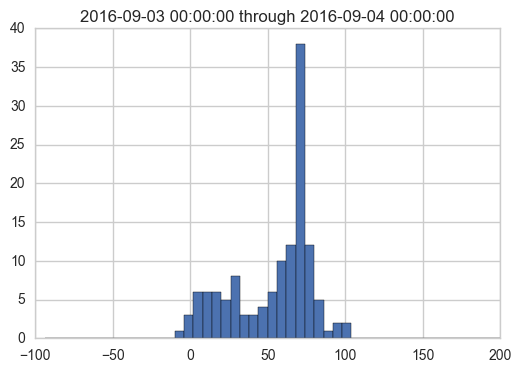

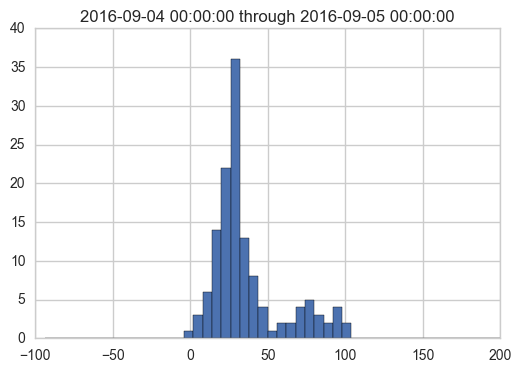

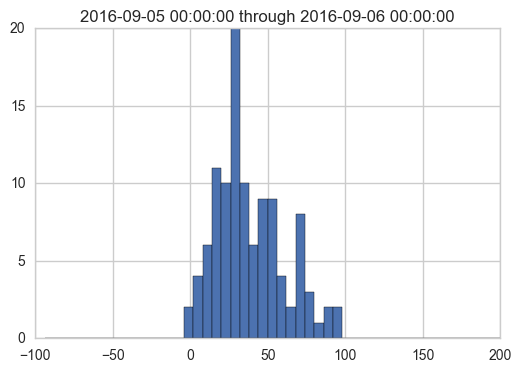

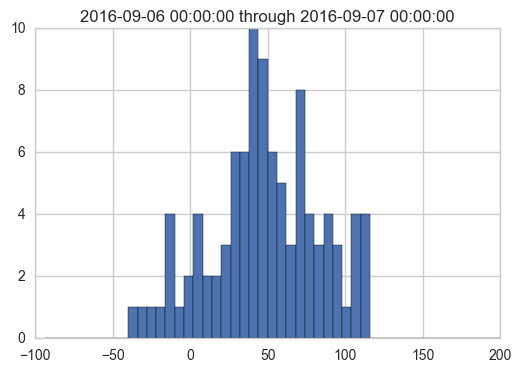

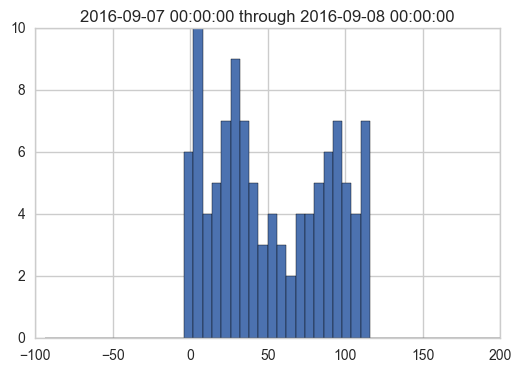

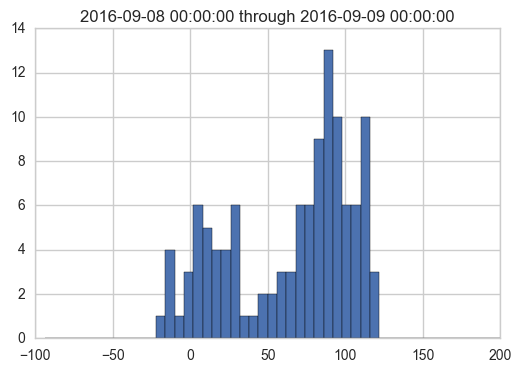

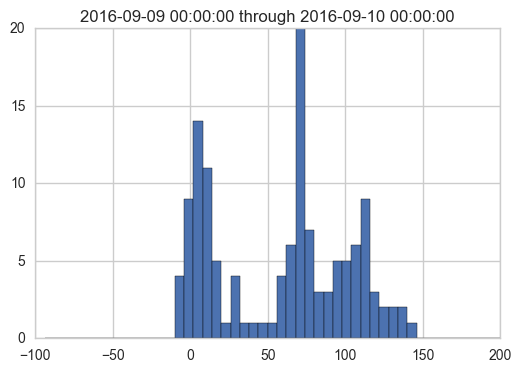

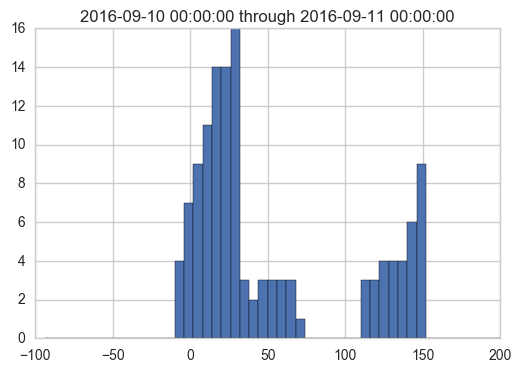

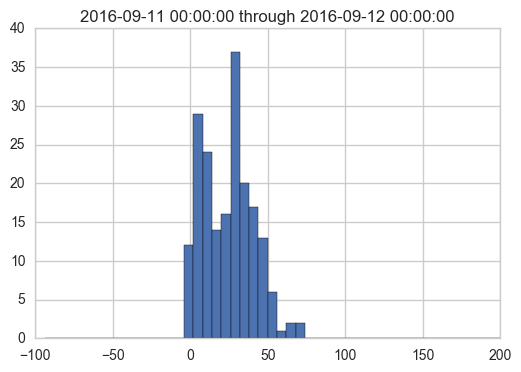

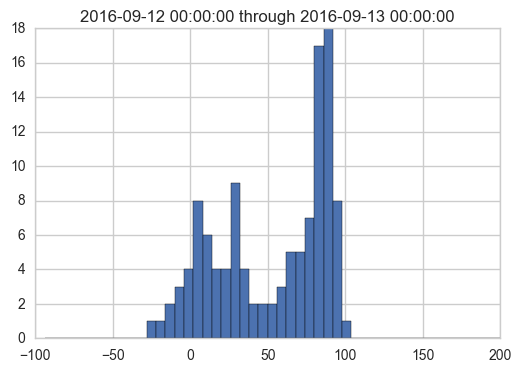

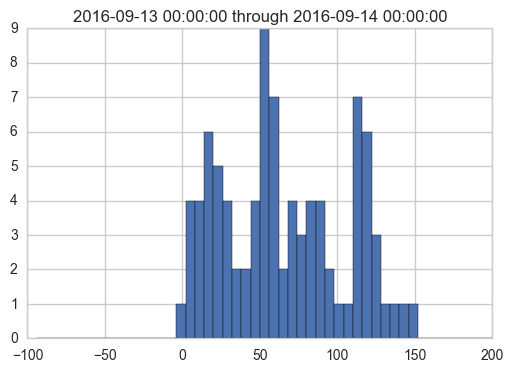

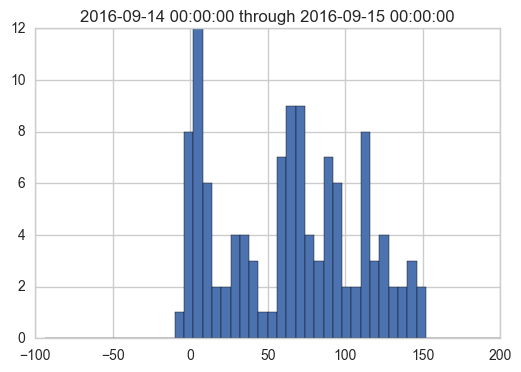

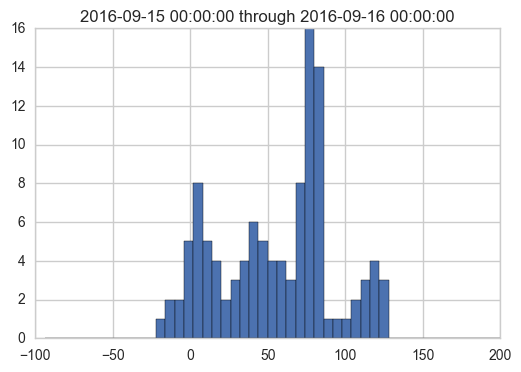

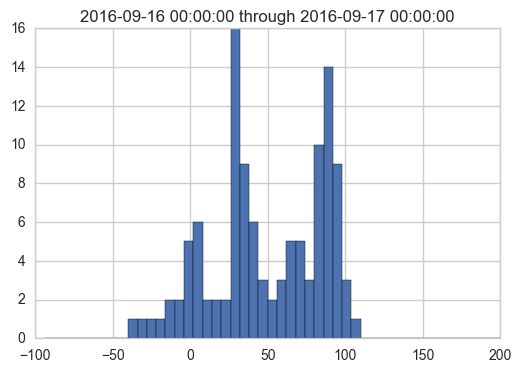

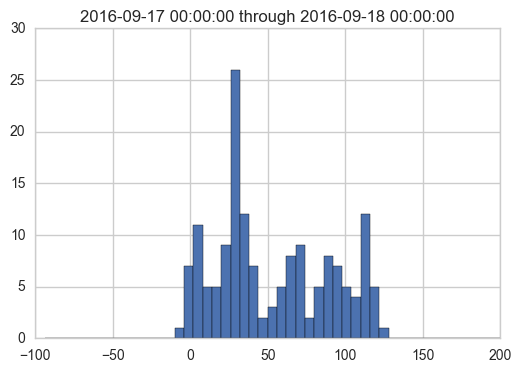

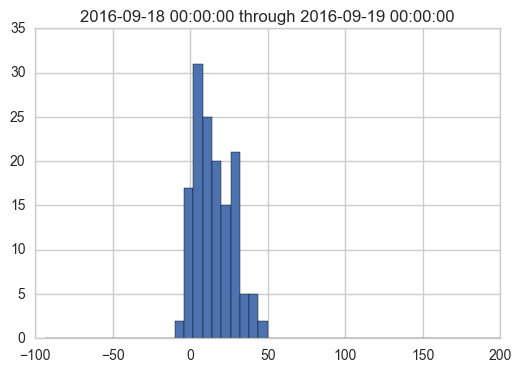

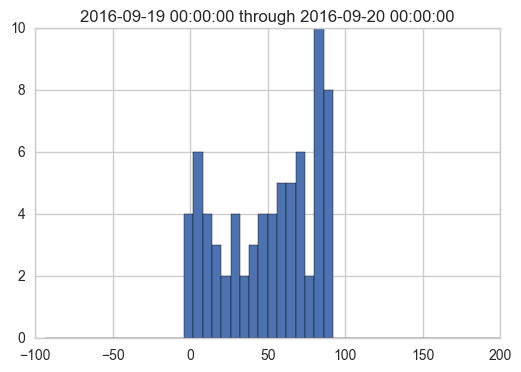

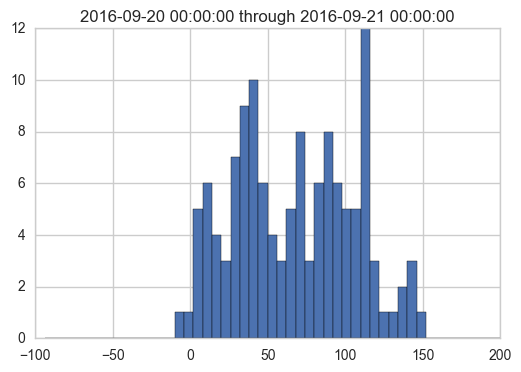

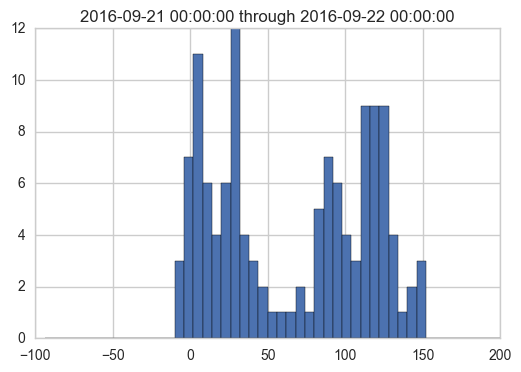

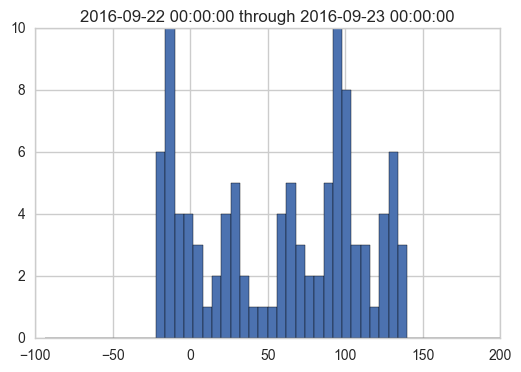

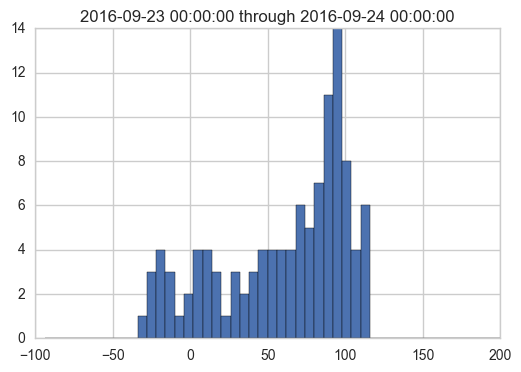

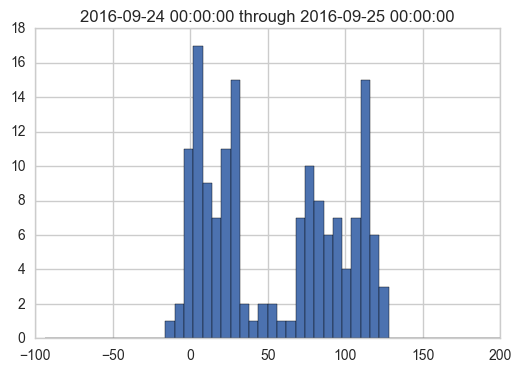

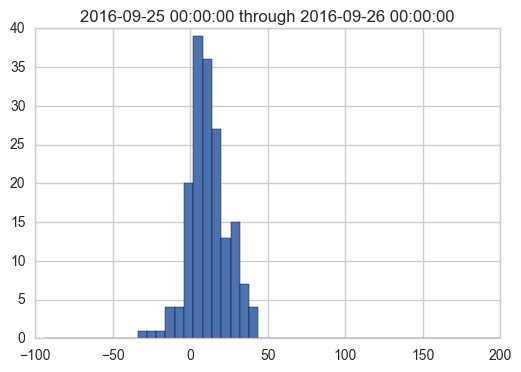

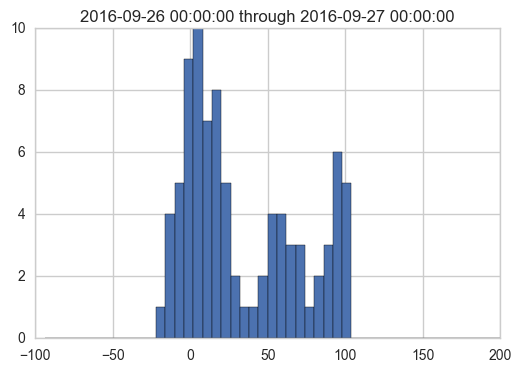

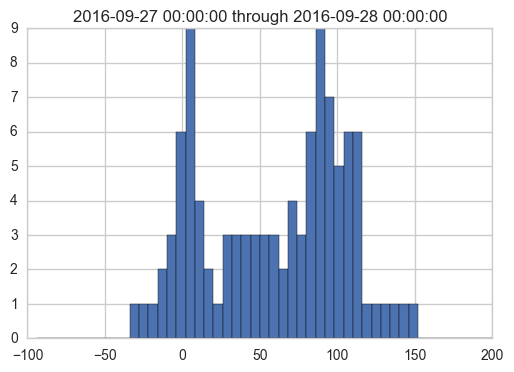

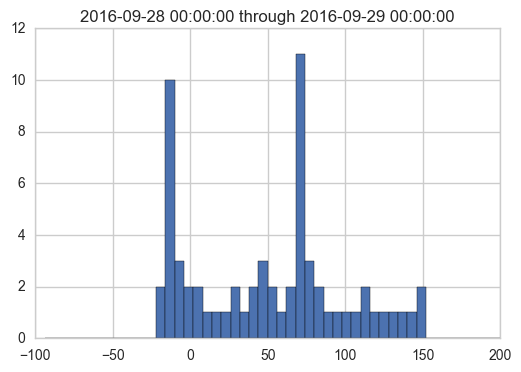

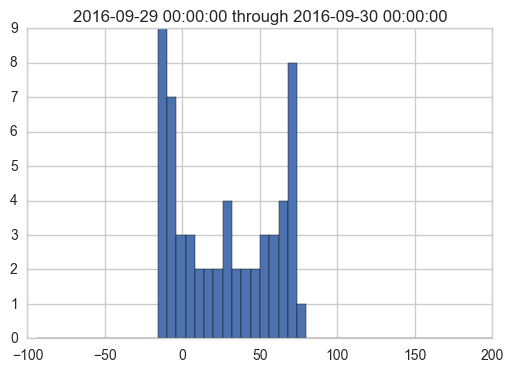

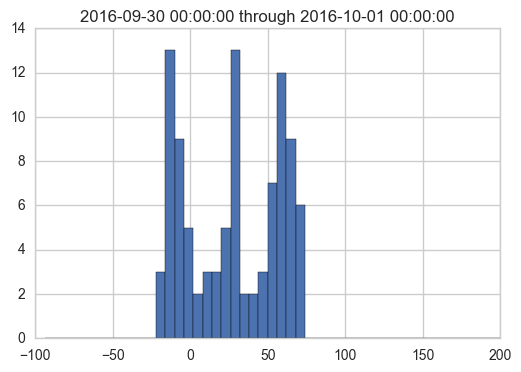

In [88]:
# Look at distributions each day
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-07-02 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_day = datetime.timedelta(days=1)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_day
    end += add_day